In [1]:
import os
os.chdir("..")

In [10]:
from tbparse import SummaryReader
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:

import pandas as pd
pd.set_option('display.max_columns', None)
# Path to your TensorBoard log files
log_path = 'from_server/runs/cde_conformal_pred_specialized_miscal'




In [8]:
import os
import pandas as pd

def extract_run_data(log_dir):
    # Store data for all runs
    all_runs_data = []
    all_runs_scals = []

    # Walk through the log directory to find all event files
    files = [f for f in os.walk(log_dir)]
    for root, _, files in tqdm(files):
        for file in files:
            if file.startswith("events.out.tfevents"):
                # Path to the event file
                event_file_path = os.path.join(root, file)

                # Load the log data
                reader = SummaryReader(event_file_path)
                if len(reader.hparams) > 0:
                    hparams = reader.hparams
                    scals = reader.scalars[reader.scalars["step"] == 0]
                    
                    all_runs_data.append(hparams)
                    all_runs_scals.append(scals)

    # Convert the collected data to a pandas DataFrame
    #runs_df = pd.DataFrame(all_runs_data)
    return all_runs_data, all_runs_scals



In [5]:
runs_hparam, runs_scals = extract_run_data(log_path)

2024-03-26 08:04:26.426016: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-26 08:04:26.426513: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Plot loss against the size of the CP region size

In [10]:
runs_hparam[0]

tag  \
0                                           config_id   
1                      data_hyperparameters/data_type   
2                   data_hyperparameters/dataset_name   
3                   data_hyperparameters/random_state   
4                     data_hyperparameters/test_split   
5                      data_hyperparameters/val_split   
6                                           data_seed   
7           model_hyperparameters/activation_function   
8       model_hyperparameters/center_selection_method   
9                  model_hyperparameters/dropout_rate   
10        model_hyperparameters/initial_kernel_scales   
11                   model_hyperparameters/keep_edges   
12                  model_hyperparameters/model_class   
13                    model_hyperparameters/n_centers   
14                     model_hyperparameters/n_hidden   
15             model_hyperparameters/trainable_scales   
16                                              seeds   
17                training_hyperparameters/batch_size   
18        training_hyperparameters/clip_gradient_norm   
19   training_hyperparameters/early_stopping_patience   
20                    training_hyperparameters/epochs   
21  training_hyperparameters/eval_metric_for_best_...   
22  training_hyperparameters/evaluation_function_n...   
23             training_hyperparameters/input_noise_x   
24             training_hyperparameters/input_noise_y   
25         training_hyperparameters/log_train_every_n   
26  training_hyperparameters/loss_hyperparameters/...   
27  training_hyperparameters/loss_hyperparameters/...   
28  training_hyperparameters/loss_hyperparameters/...   
29  training_hyperparameters/loss_hyperparameters/...   
30  training_hyperparameters/loss_hyperparameters/...   
31               training_hyperparameters/noisy_start   
32                 training_hyperparameters/optimizer   
33  training_hyperparameters/optimizer_hyperparame...   
34  training_hyperparameters/optimizer_hyperparame...   
35  training_hyperparameters/optimizer_hyperparame...   
36  training_hyperparameters/optimizer_hyperparame...   
37      training_hyperparameters/slow_first_n_batches   

                                         value  
0                                      kmn_bio  
1                                    conformal  
2                                          bio  
3                                       1337.0  
4                                          0.2  
5                                          0.1  
6                                          0.0  
7                                         relu  
8                                      k_means  
9                                         0.04  
10                                  [0.7, 0.3]  
11                                         1.0  
12                                         kmn  
13                                        90.0  
14                          [64, 128, 128, 64]  
15                                         1.0  
16                        [42, 43, 44, 45, 46]  
17                                        32.0  
18                                         4.0  
19                                         4.0  
20                                       500.0  
21                                val_nll_loss  
22  ['miscalibration', 'conformal_prediction']  
23                                        0.03  
24                                        0.03  
25                                        10.0  
26                                        0.05  
27                                         1.0  
28                                         0.0  
29                                        20.0  
30                                         0.0  
31                                         0.0  
32                                        adam  
33                                [0.9, 0.999]  
34                                         0.0  
35                                      0.0002  
36           

In [8]:
runs_scals[0]

step                                 tag       value
0      0  best_val_conformal_prediction0part    8.826182
1      0  best_val_conformal_prediction1part    0.898438
2      0  best_val_conformal_prediction2part   12.012935
3      0  best_val_conformal_prediction3part    0.968750
4      0                      best_val_epoch  128.000000
5      0               best_val_mean_weights    0.005556
6      0        best_val_miscalibration0part    0.047969
7      0        best_val_miscalibration1part    0.059917
8      0        best_val_miscalibration2part    0.044380
9      0         best_val_misclibration_area    0.099571
10     0                   best_val_nll_loss    1.952054
11     0        best_val_nll_loss_normalized    0.141391
12     0       best_val_required_conformal_p    0.881669
13     0                best_val_std_weights    0.030085
14     0            best_val_weights_entropy    2.905381

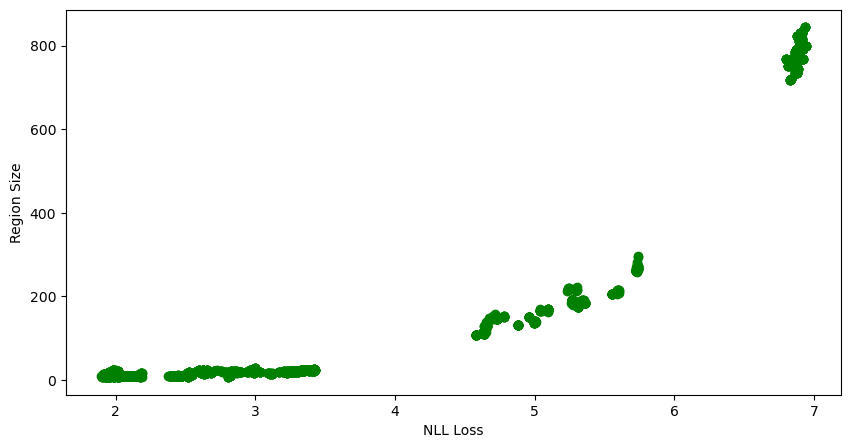

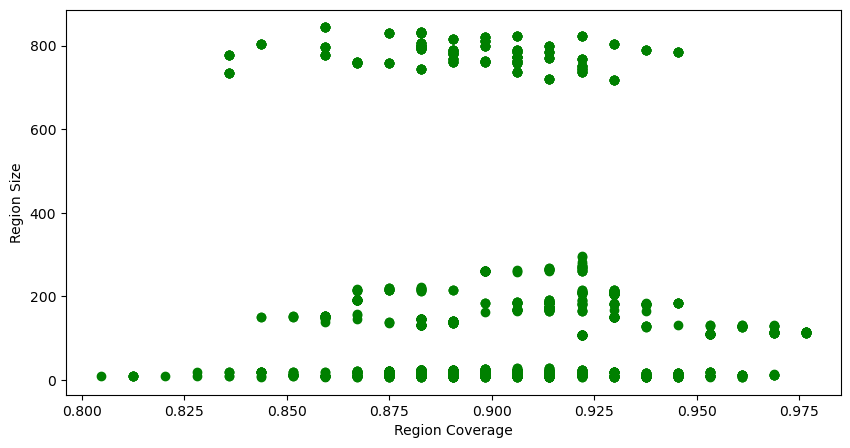

In [9]:
from matplotlib import pyplot as plt
import numpy as np


cp_region_size = [run.loc[run['tag'] == 'best_val_conformal_prediction0part', 'value'].values for run in runs_scals]
cp_nll = [run.loc[run['tag'] == 'best_val_nll_loss', 'value'].values for run in runs_scals]
cp_region_coverage = [run.loc[run['tag'] == 'best_val_conformal_prediction1part', 'value'].values for run in runs_scals]

remove_idxs = []
for i in range(len(cp_region_size)):
    if len(cp_region_size[i]) == 0 or len(cp_nll[i]) == 0:
        remove_idxs.append(i)

cp_region_size = np.array([cp_region_size[i] for i in range(len(cp_region_size)) if i not in remove_idxs])
cp_nll = np.array([cp_nll[i] for i in range(len(cp_nll)) if i not in remove_idxs])
cp_region_coverage = np.array([cp_region_coverage[i] for i in range(len(cp_region_coverage)) if i not in remove_idxs])
cp_region_coverage_valid = np.abs(cp_region_coverage - 0.9) <11#< 0.04# 2% tolerance, but we cut off all values below 0.88
plt.figure(figsize=(10, 5))


cp_region_size_valid = cp_region_size[cp_region_coverage_valid]
cp_nll_valid = cp_nll[cp_region_coverage_valid]
plt.scatter(cp_nll_valid, cp_region_size_valid, c='g')


#if np.sum(~cp_region_coverage_valid) > 0:
cp_region_size_invalid = cp_region_size[~cp_region_coverage_valid]
cp_nll_invalid = cp_nll[~cp_region_coverage_valid]

#plt.scatter(cp_nll_invalid, cp_region_size_invalid, c='r')

plt.xlabel('NLL Loss')
plt.ylabel('Region Size')

plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(cp_region_coverage, cp_region_size, c='g')
plt.ylabel('Region Size')
plt.xlabel('Region Coverage')
plt.show()

## Other stuff

In [5]:
def concat(hparam, scal):
    return pd.concat([pd.concat([hparam[i], scal[i].drop(columns=["step"])]).set_index("tag").T for i in range(len(hparam))])

In [14]:
def show_focus_plots(concat_runs, focus_tag):

    grouped = concat_runs.groupby("config_id")
    for name, group in grouped:
        
        plt.figure(figsize=(20, 10))

        plt.subplot(2, 2, 1)
        plt.scatter(group["best_val_nll_loss"], group[focus_tag])
        plt.xlabel('NLL Loss')
        plt.ylabel(focus_tag)
        plt.title(name)

        plt.subplot(2, 2, 2)
        plt.scatter(group["best_val_miscalibration0part"], group[focus_tag])
        plt.xlabel('Miscalibration')
        plt.ylabel(focus_tag)
        plt.title(name)

        plt.subplot(2,2,3)
        plt.scatter(group["best_val_nll_loss"], group["best_val_conformal_prediction0part"])
        plt.xlabel('NLL Loss')
        plt.ylabel('Region Size')
        plt.title(name)

        plt.subplot(2,2,4)
        plt.scatter(group["best_val_conformal_prediction1part"], group["best_val_conformal_prediction0part"])
        plt.xlabel('Region Coverage')
        plt.ylabel('Region Size')
        plt.title(name)

        plt.show()

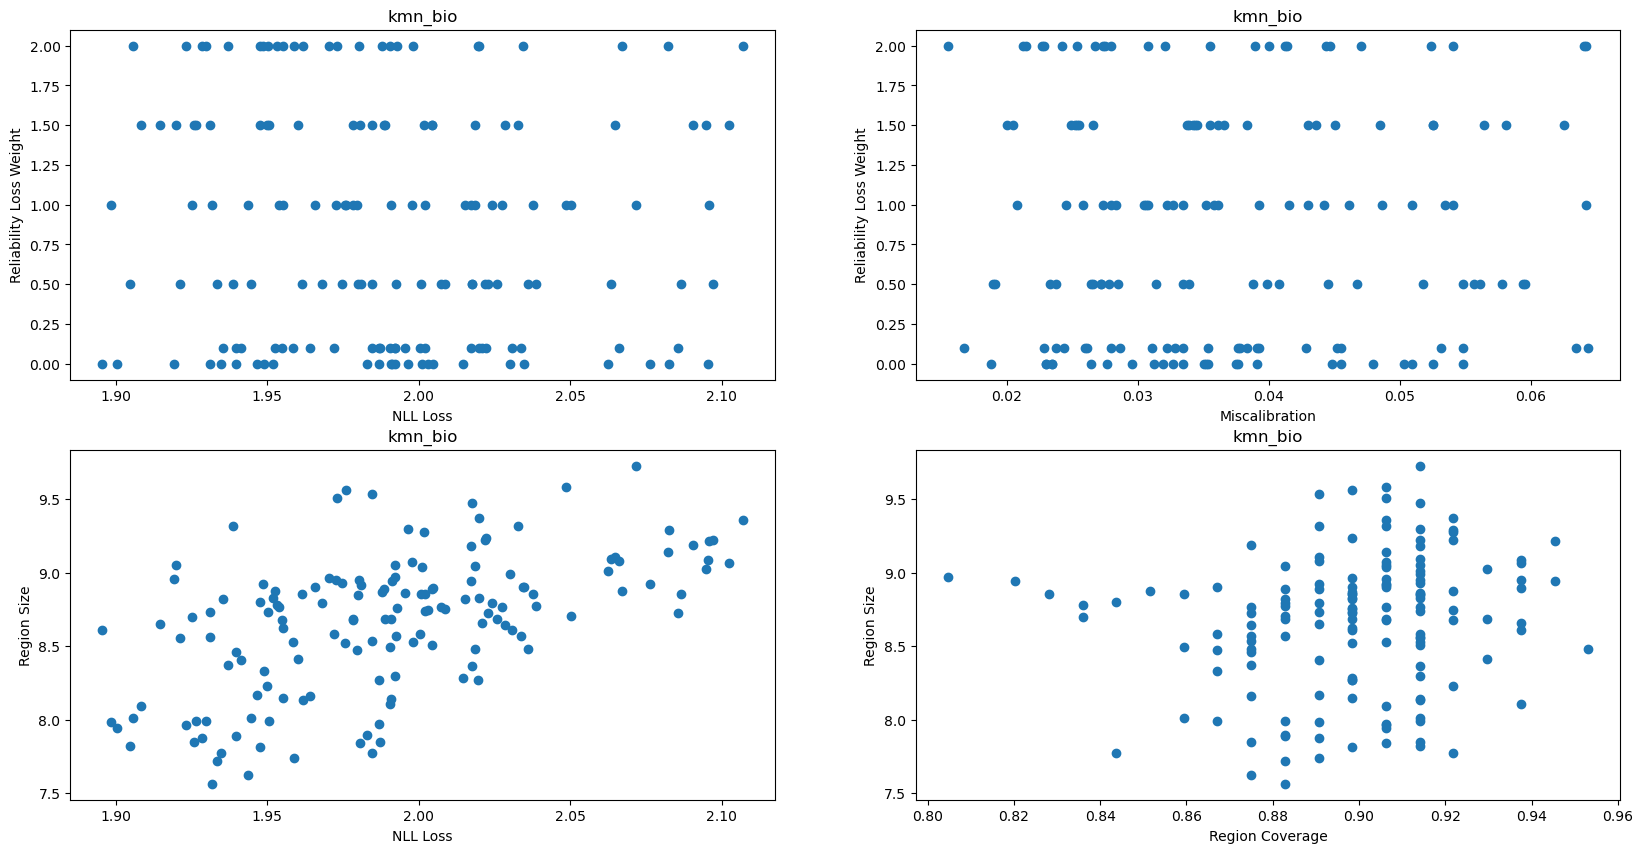

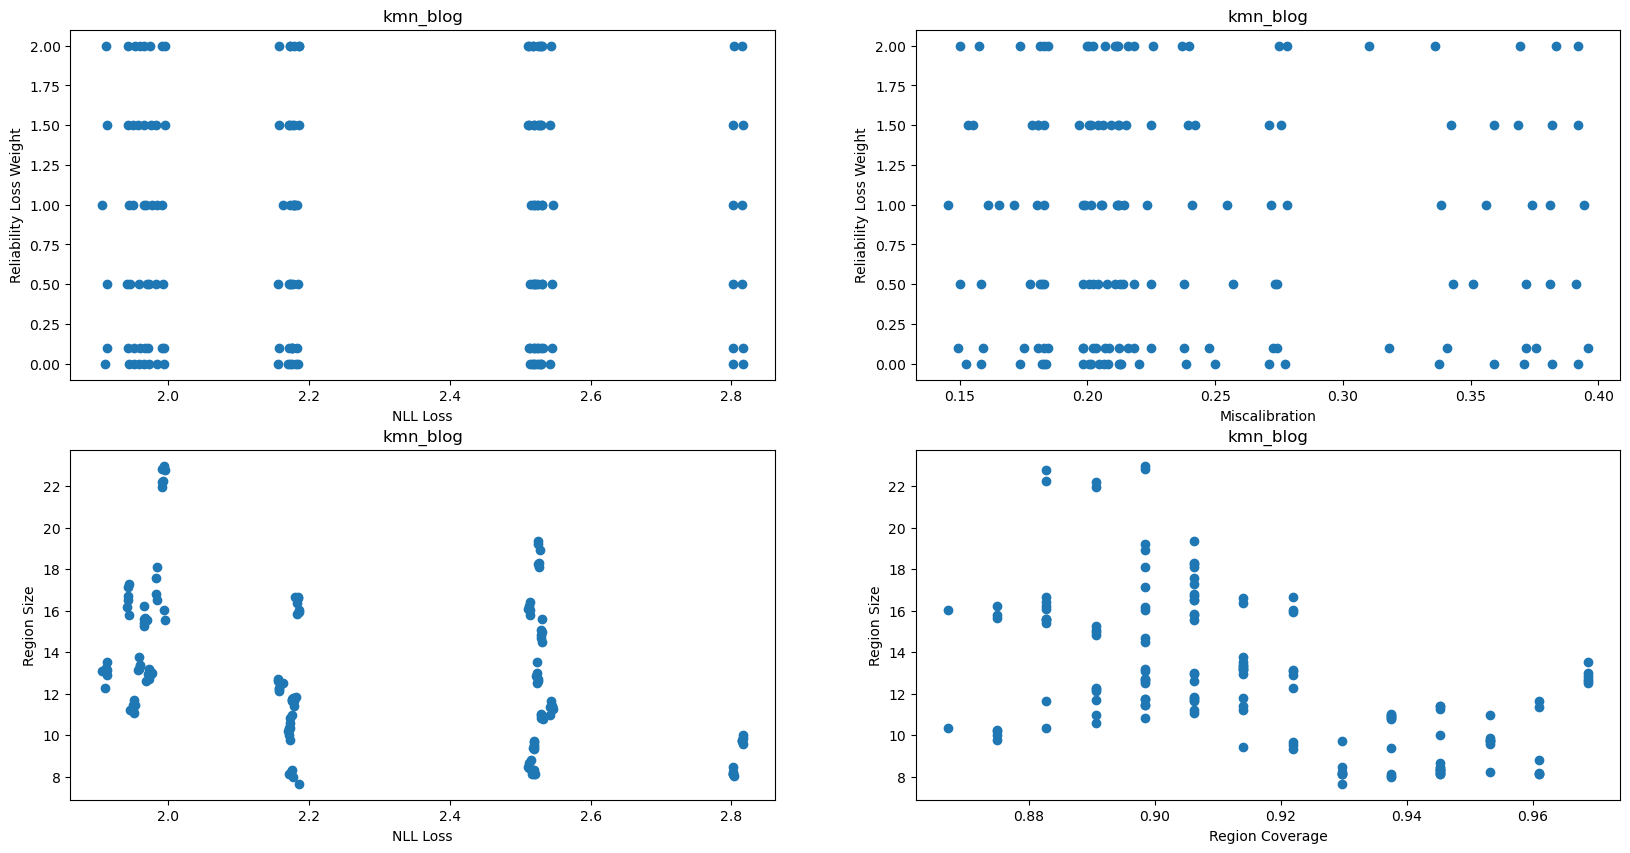

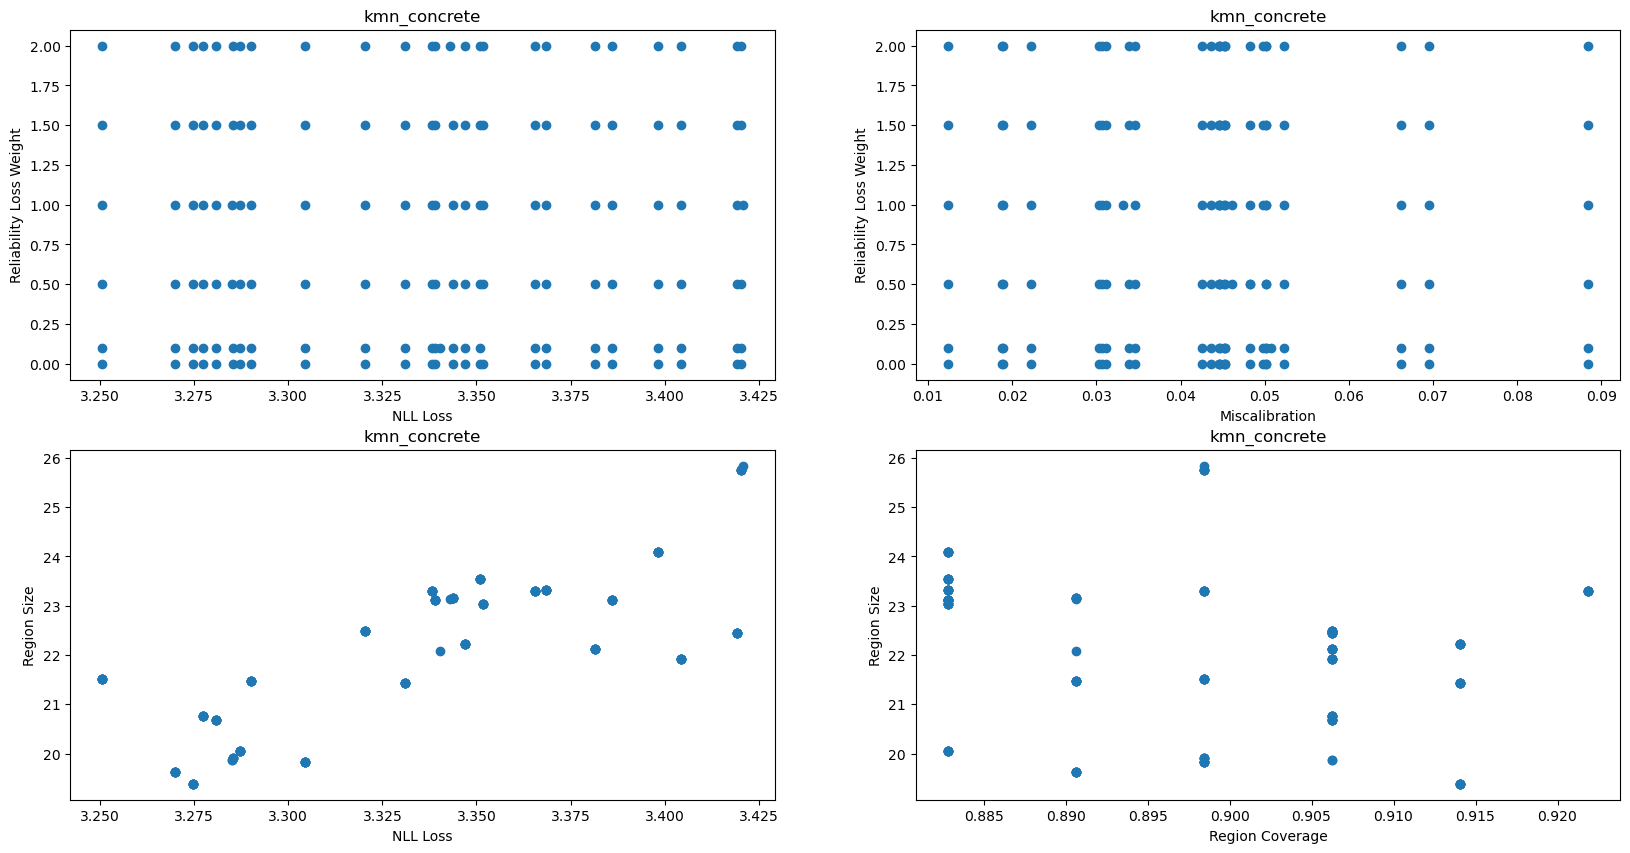

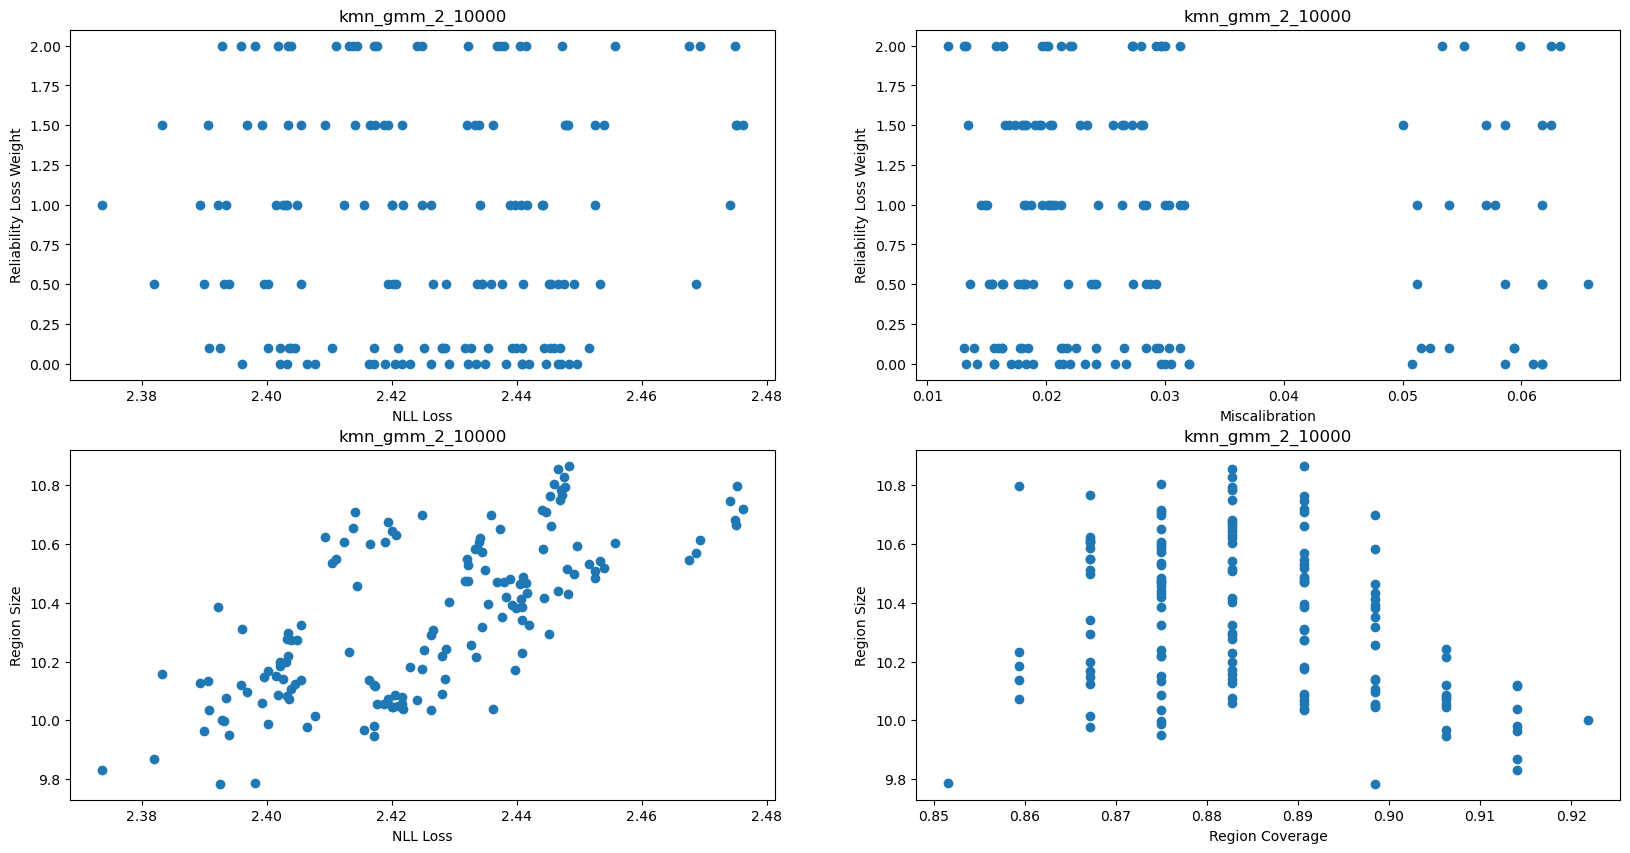

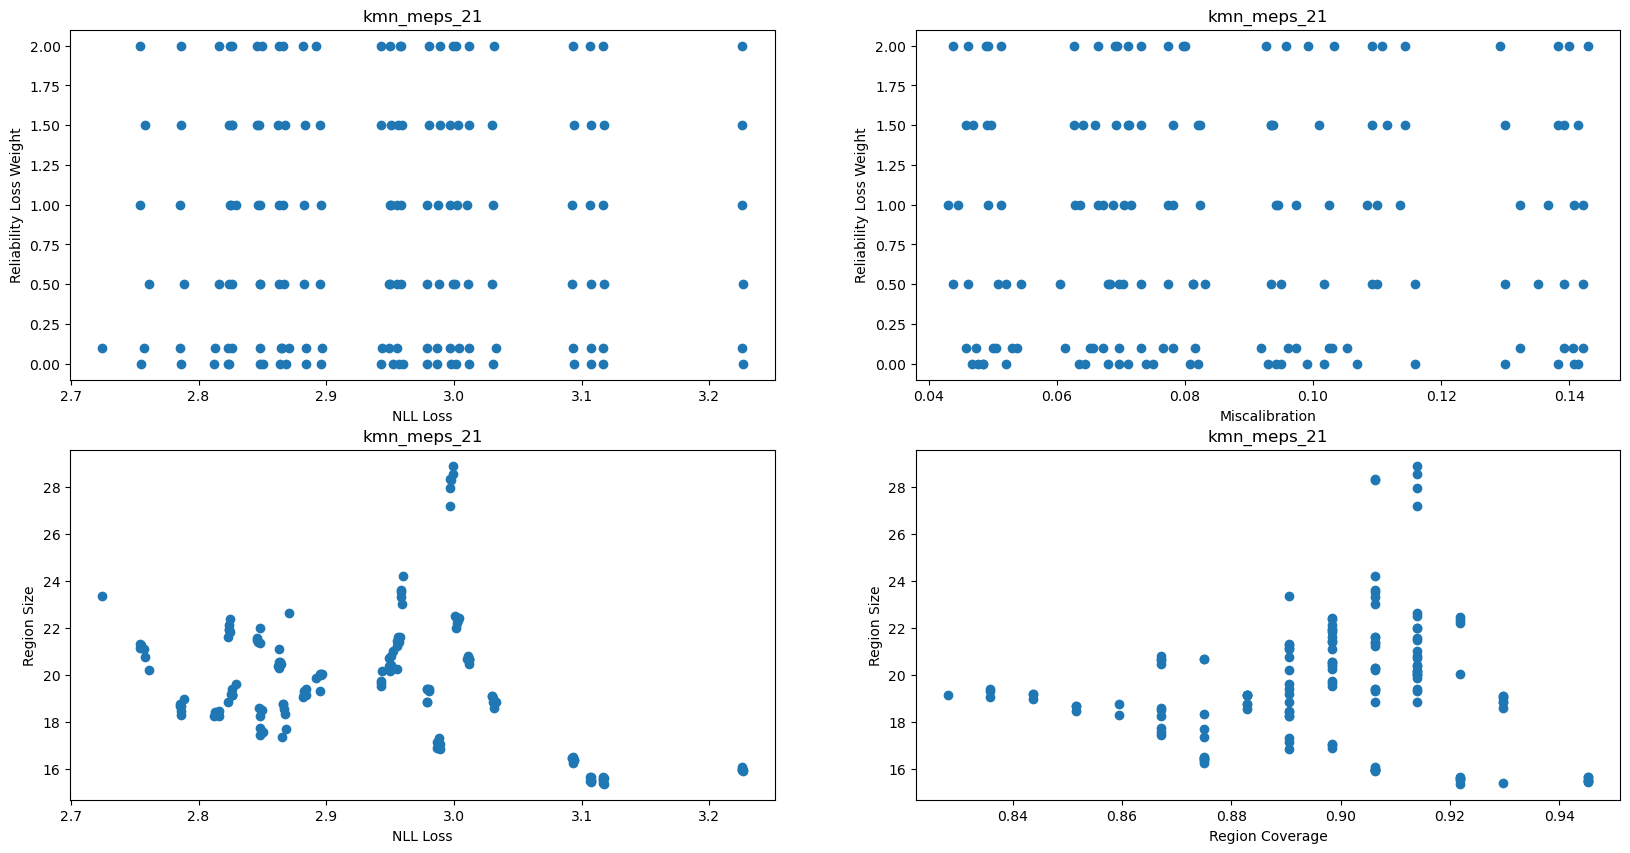

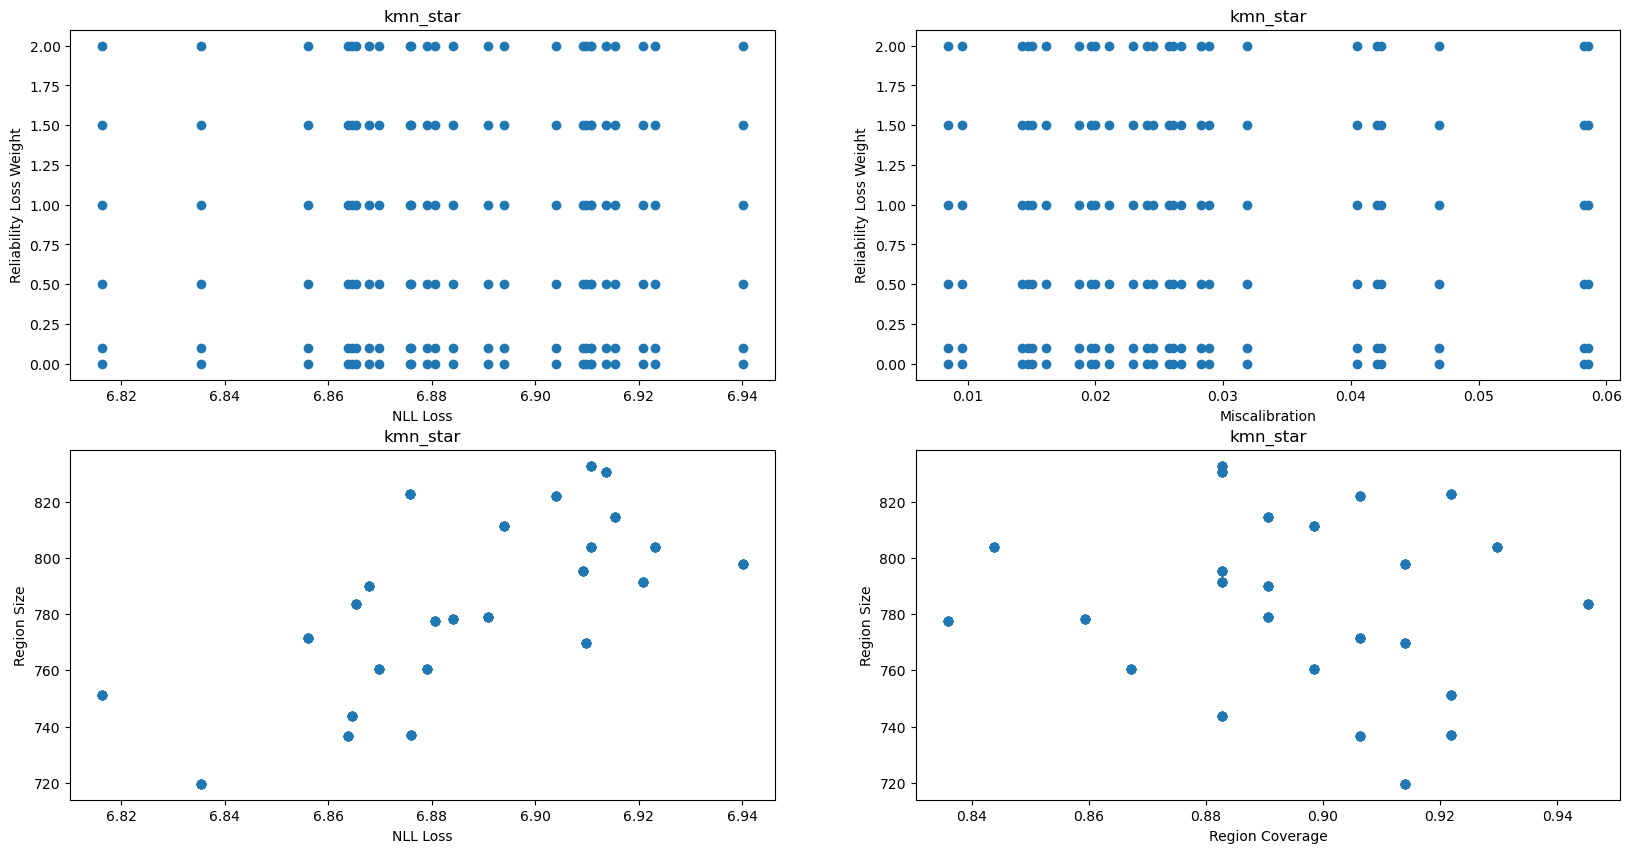

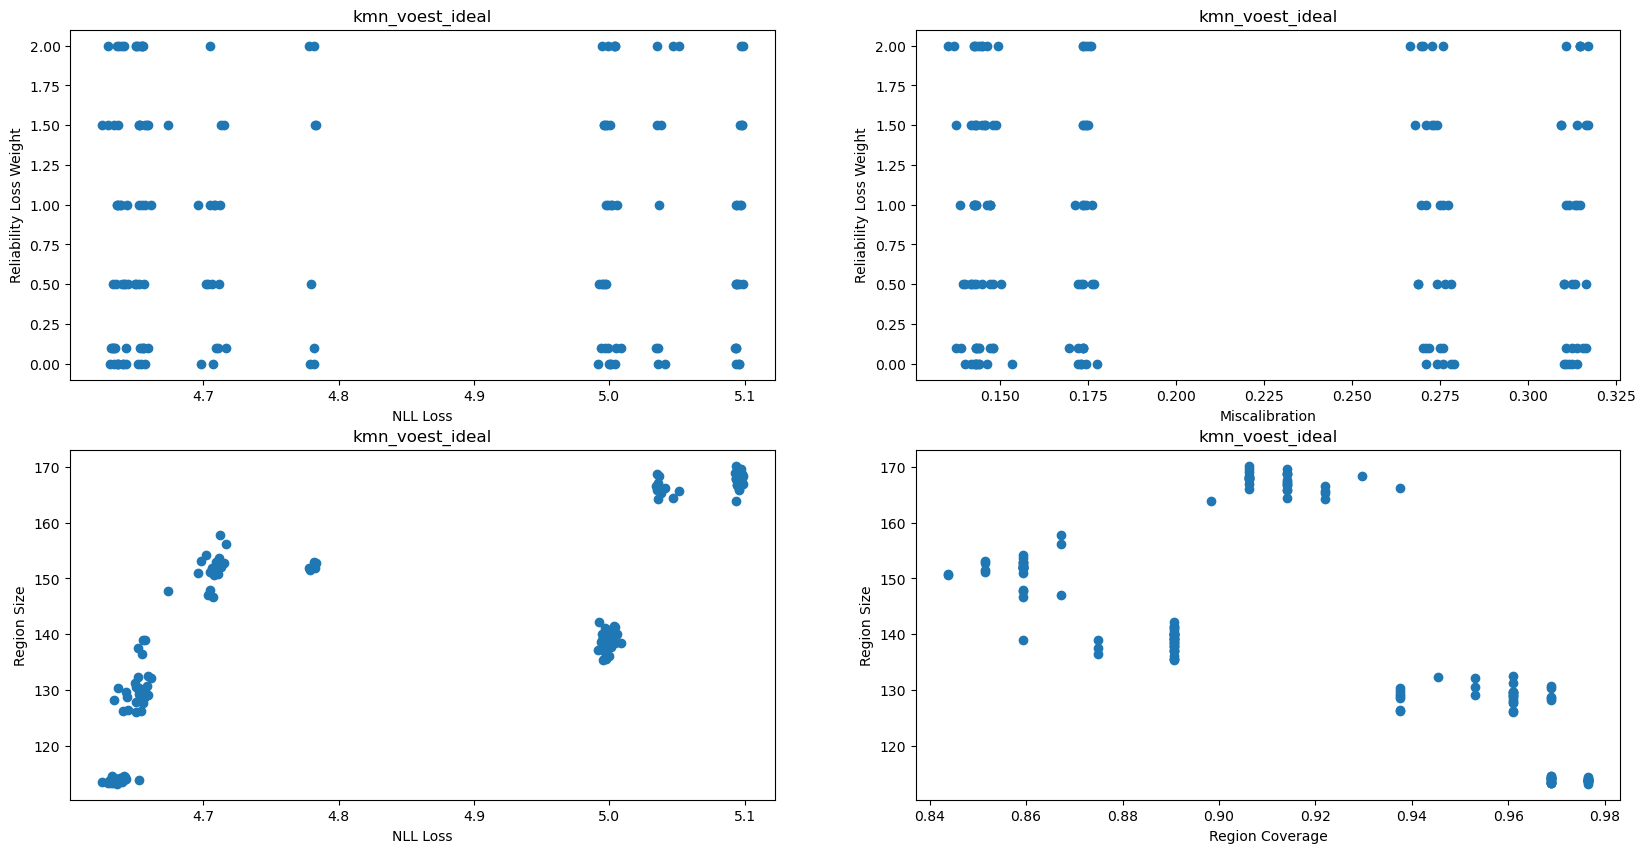

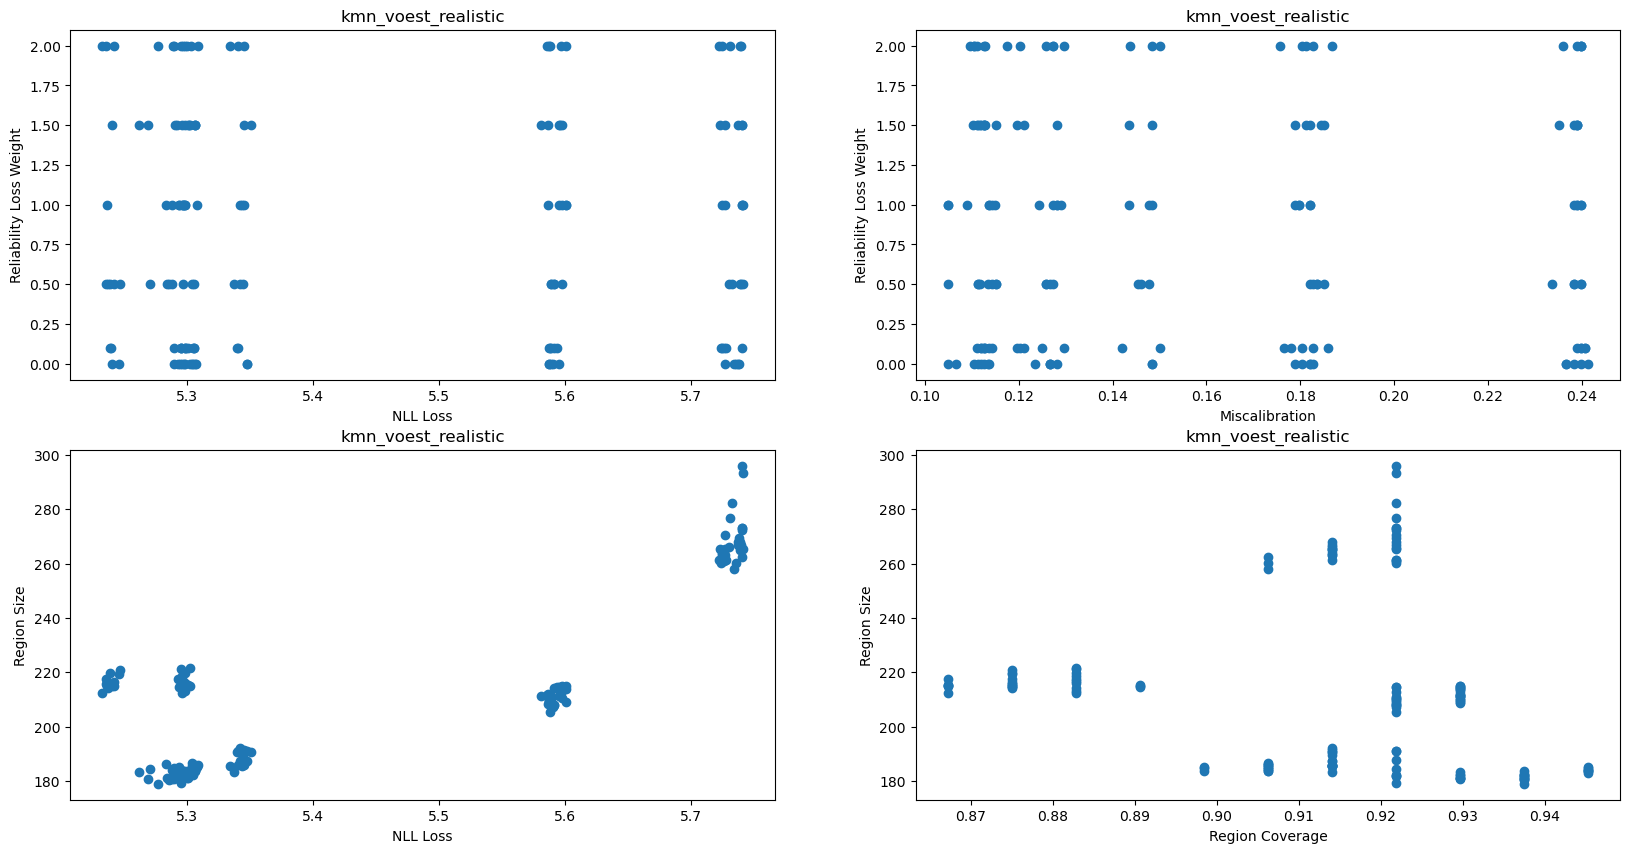

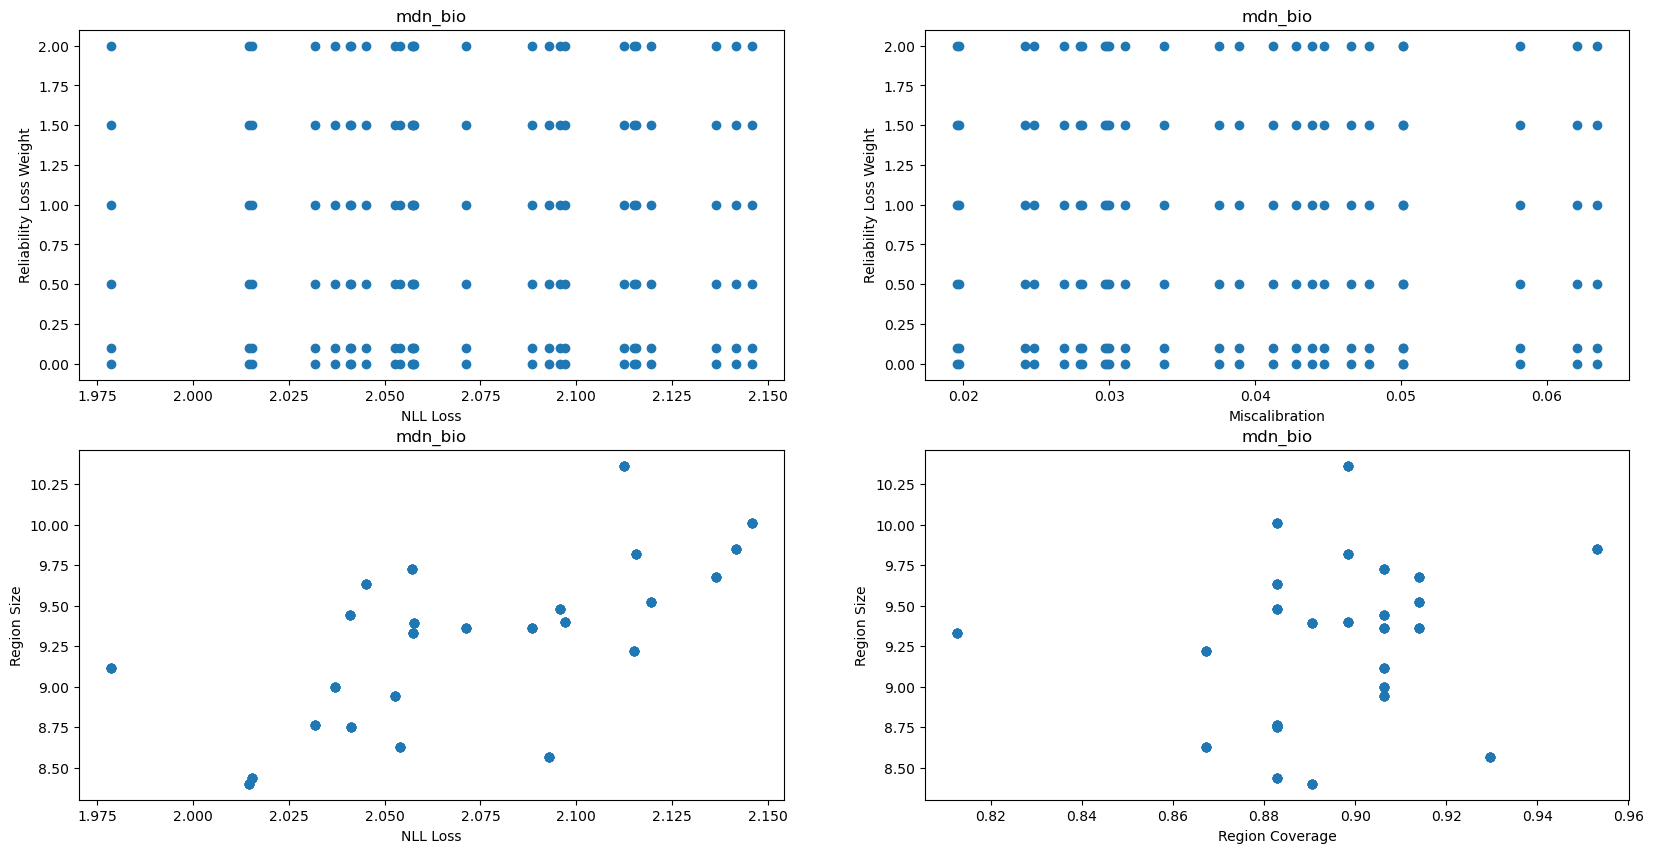

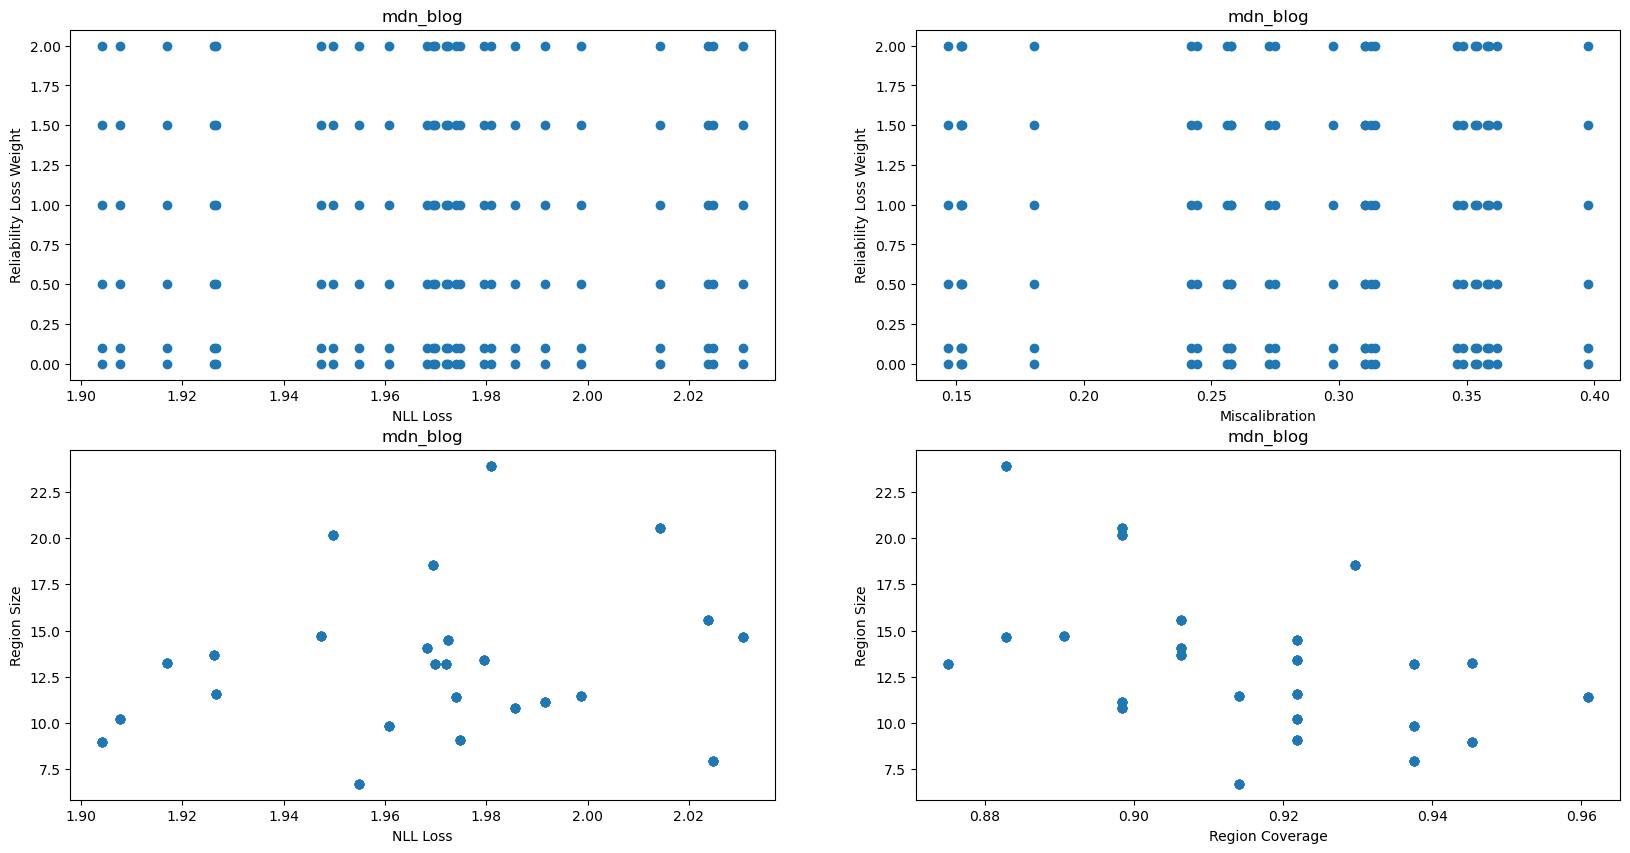

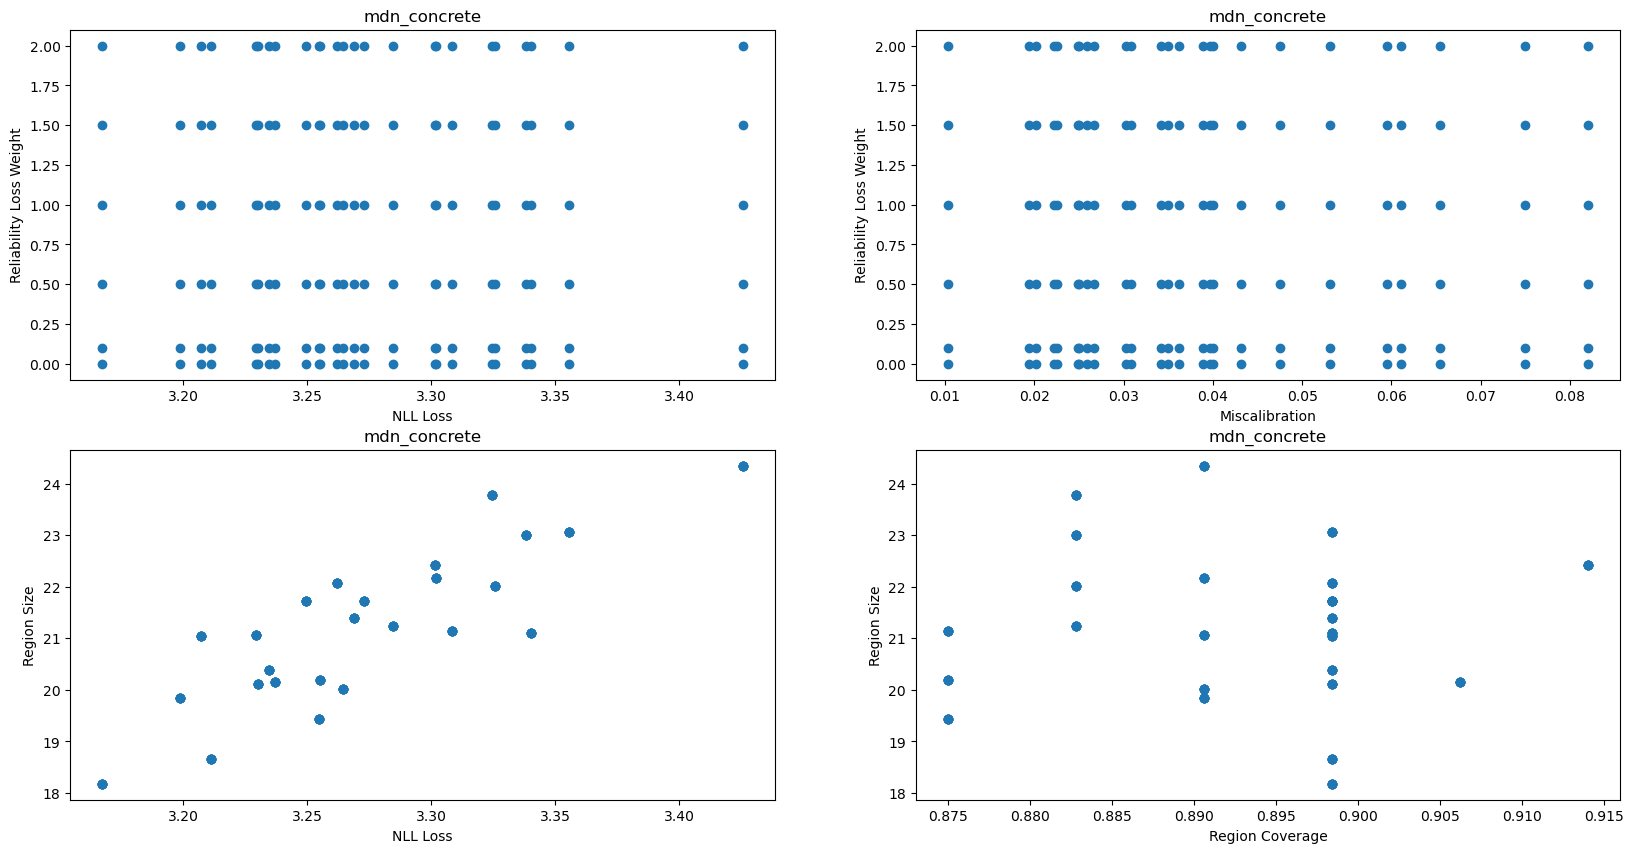

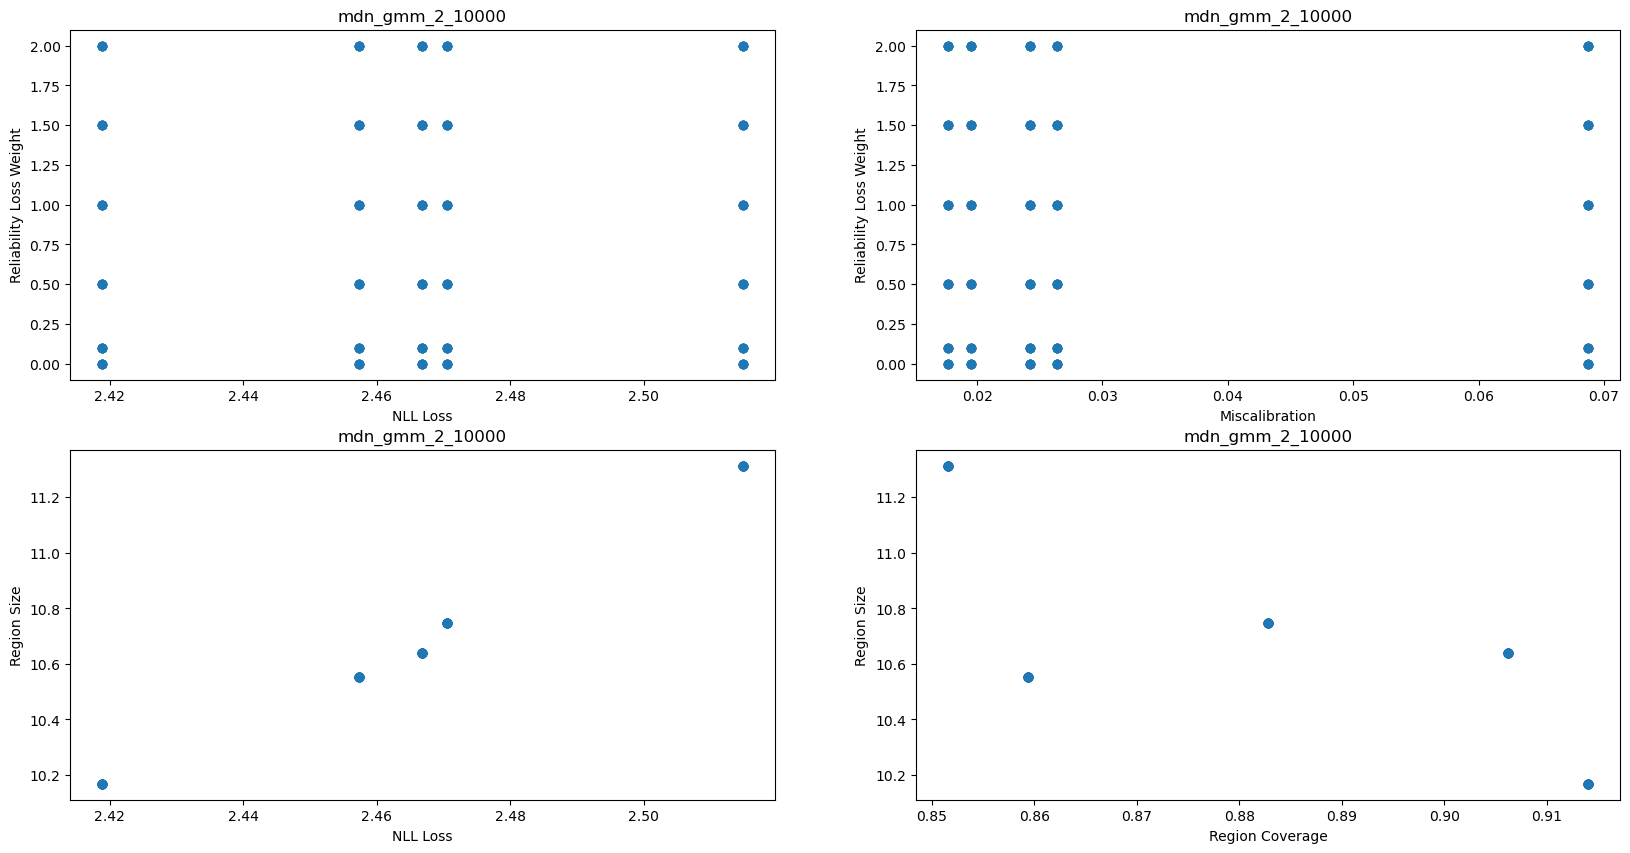

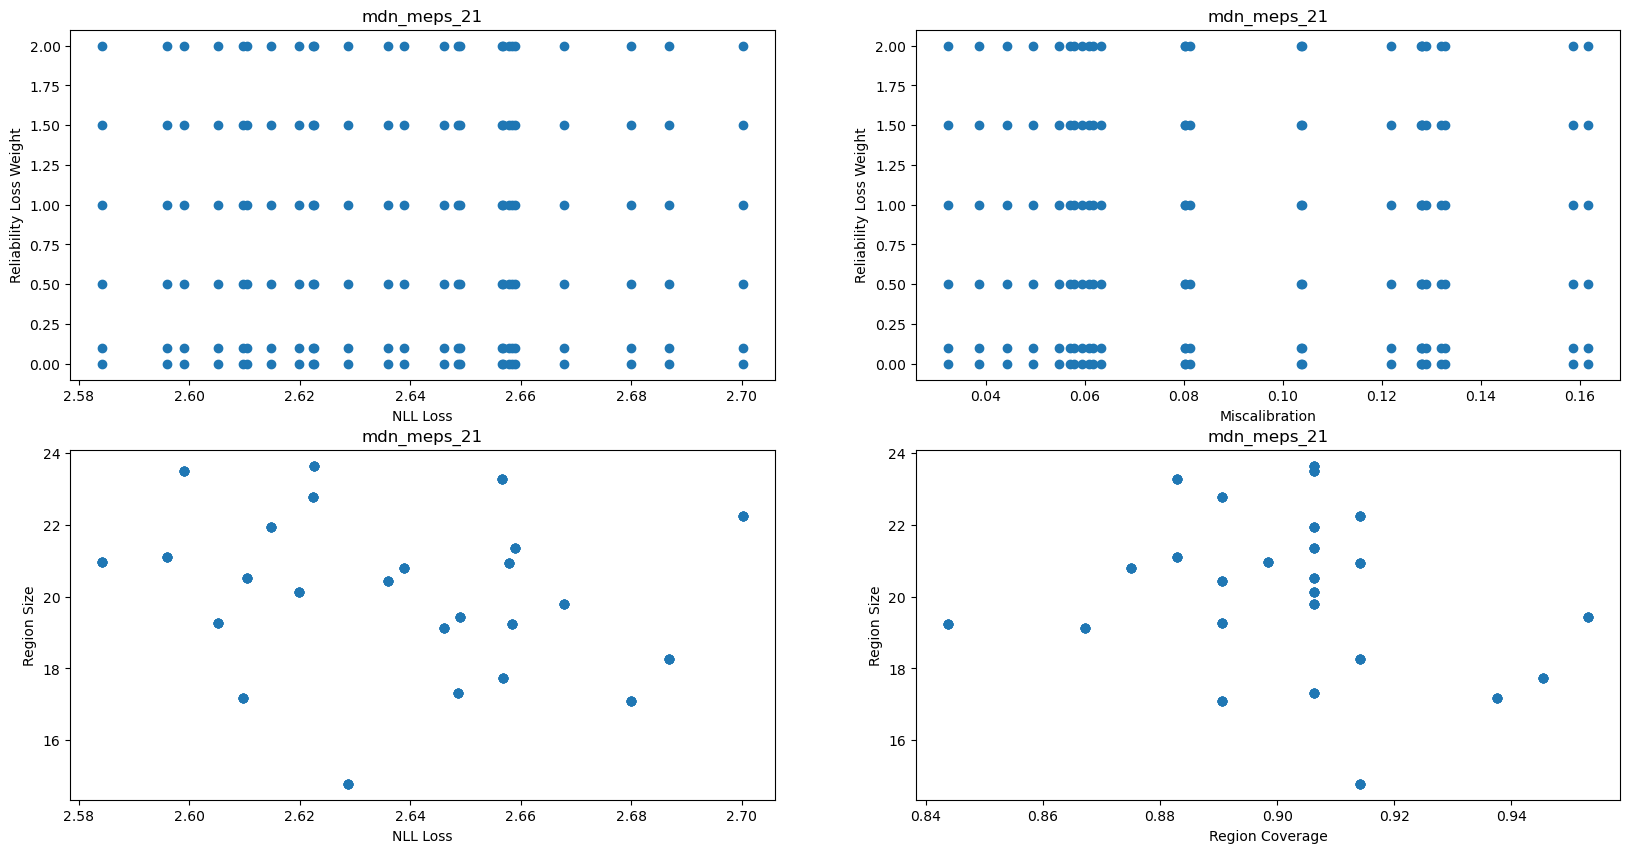

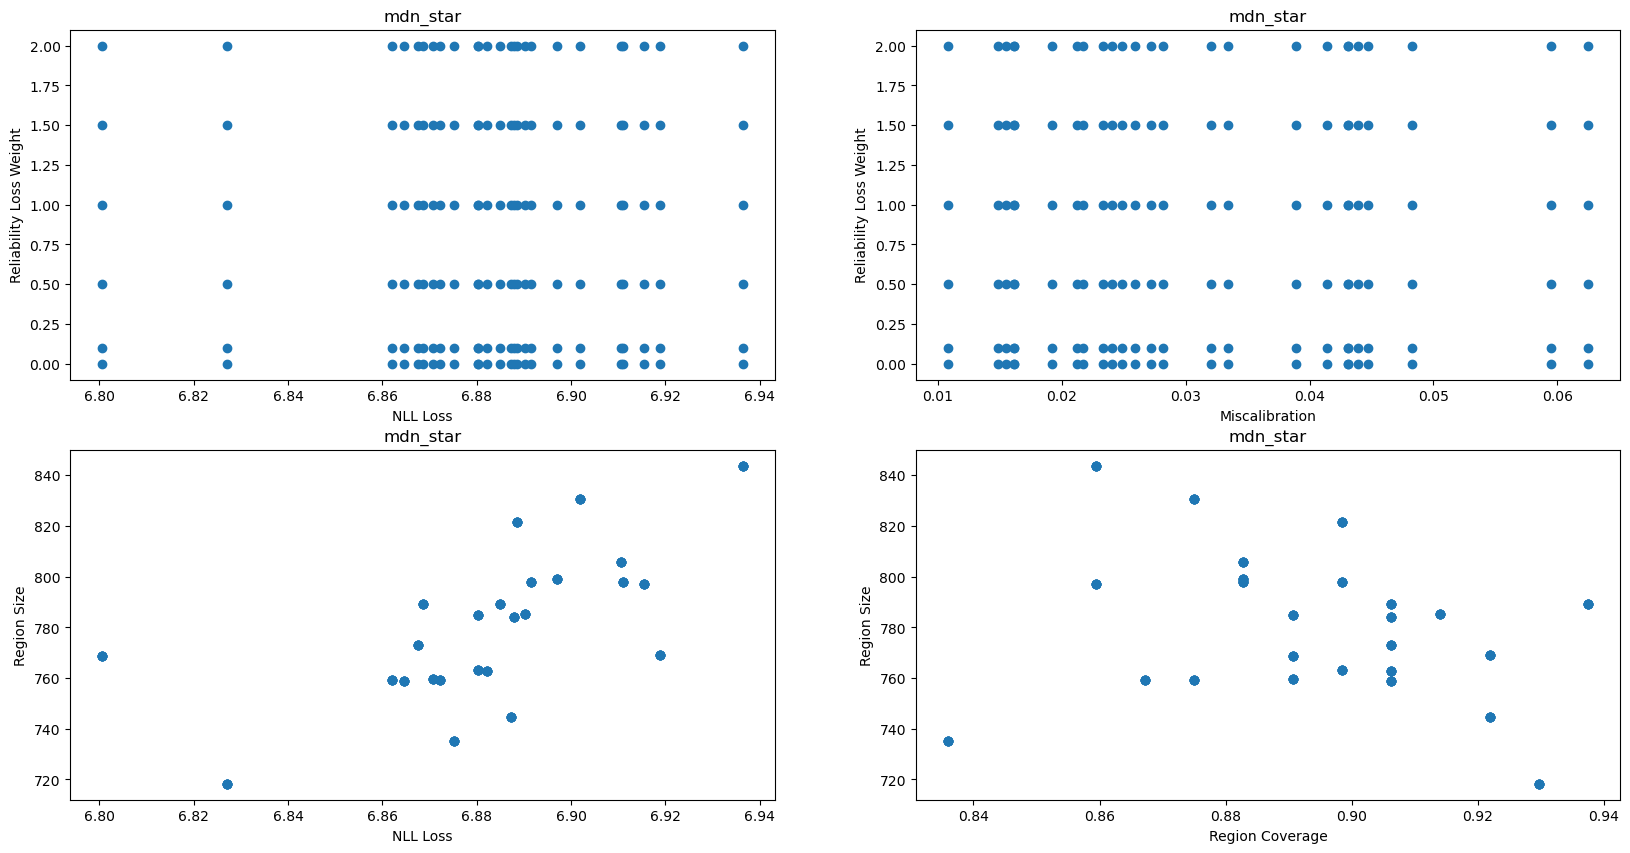

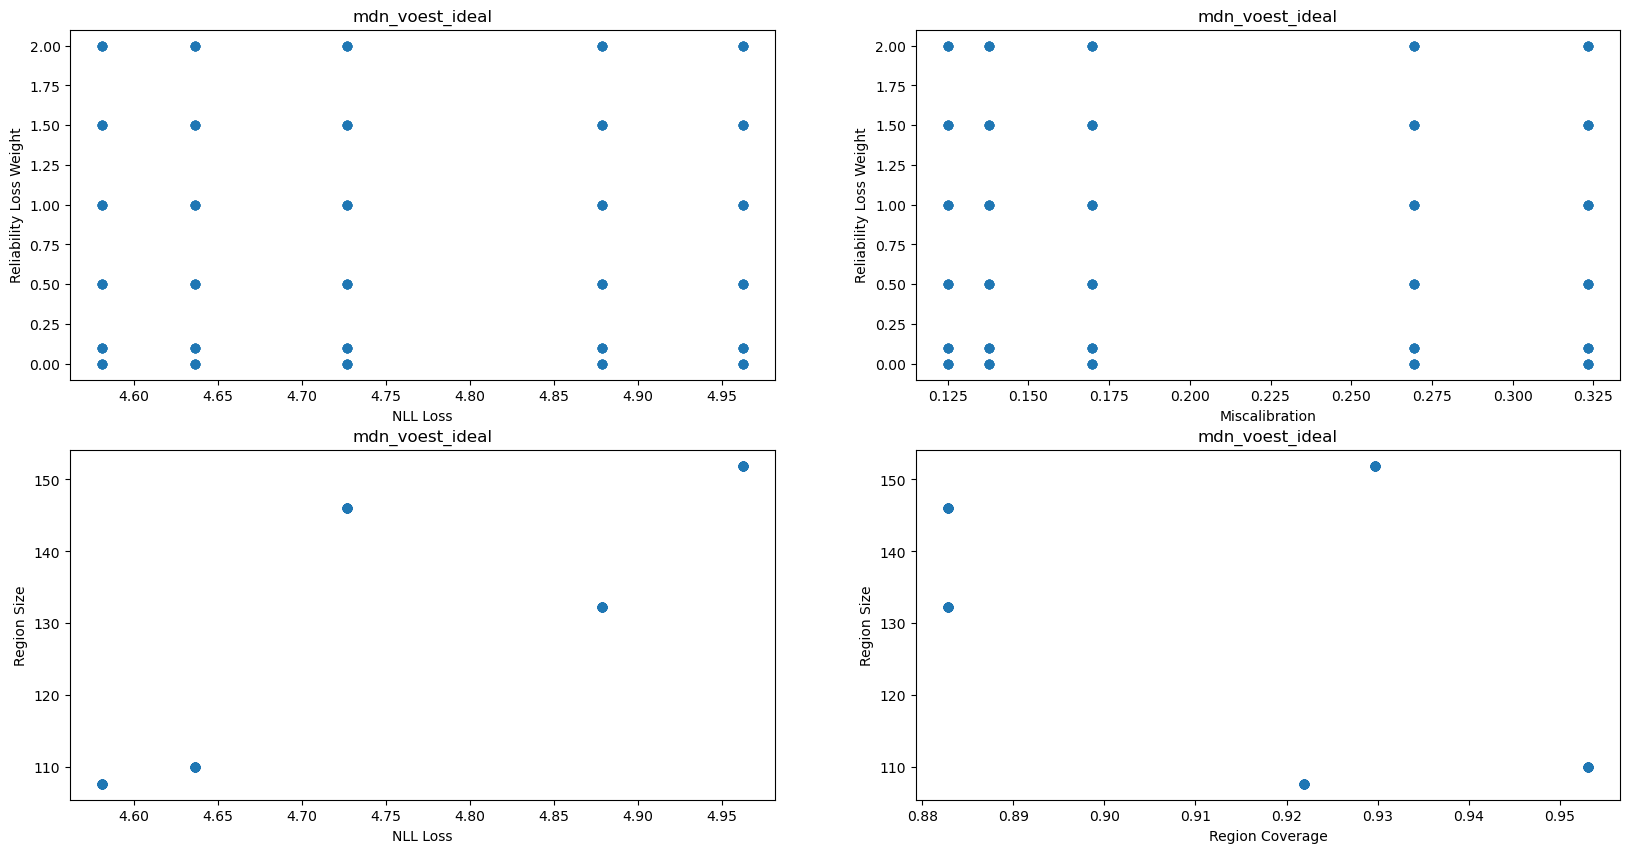

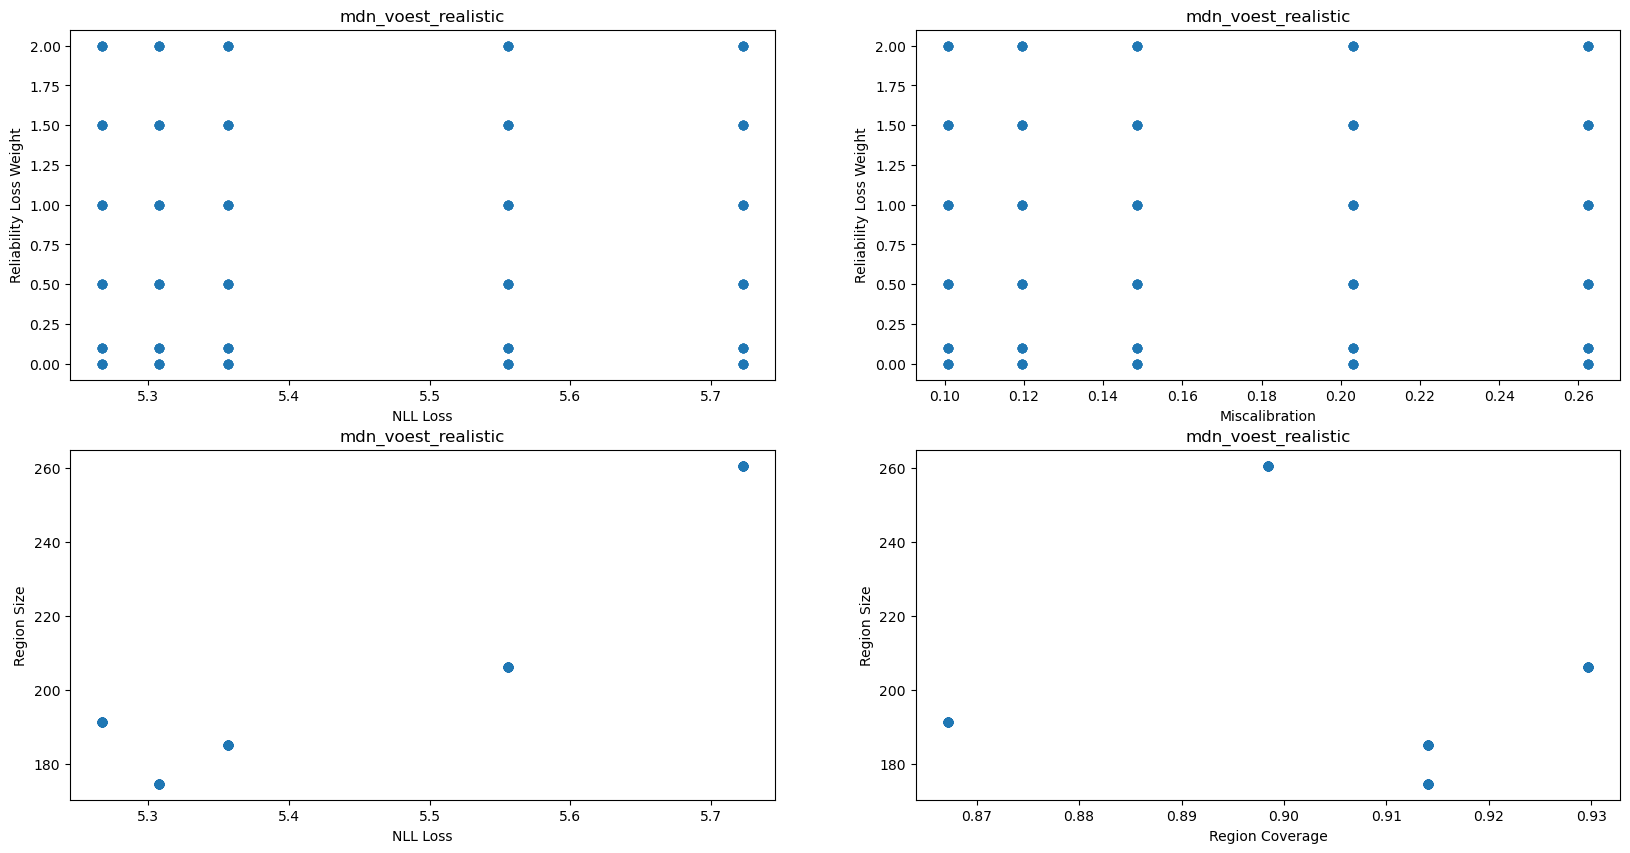

In [11]:

runs_hparam, runs_scals = extract_run_data("from_server/runs/cde_conformal_pred_specialized_miscal")
concat_runs = concat(runs_hparam, runs_scals)
show_focus_plots(concat_runs,"training_hyperparameters/loss_hyperparameters/reliability_loss_weight")

100%|██████████| 3681/3681 [11:22<00:00,  5.39it/s] 


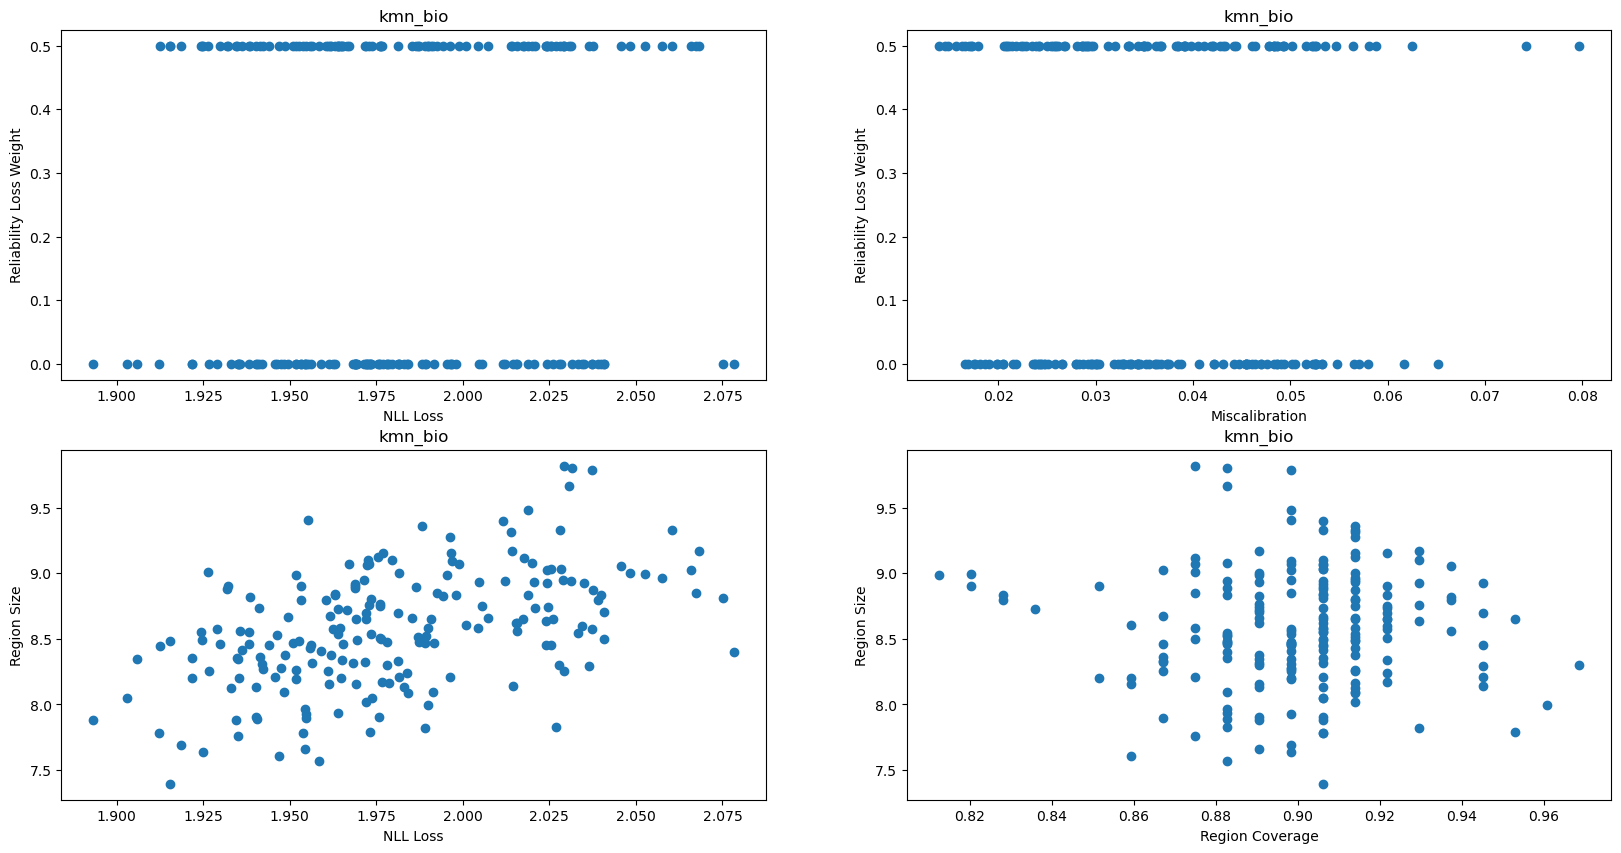

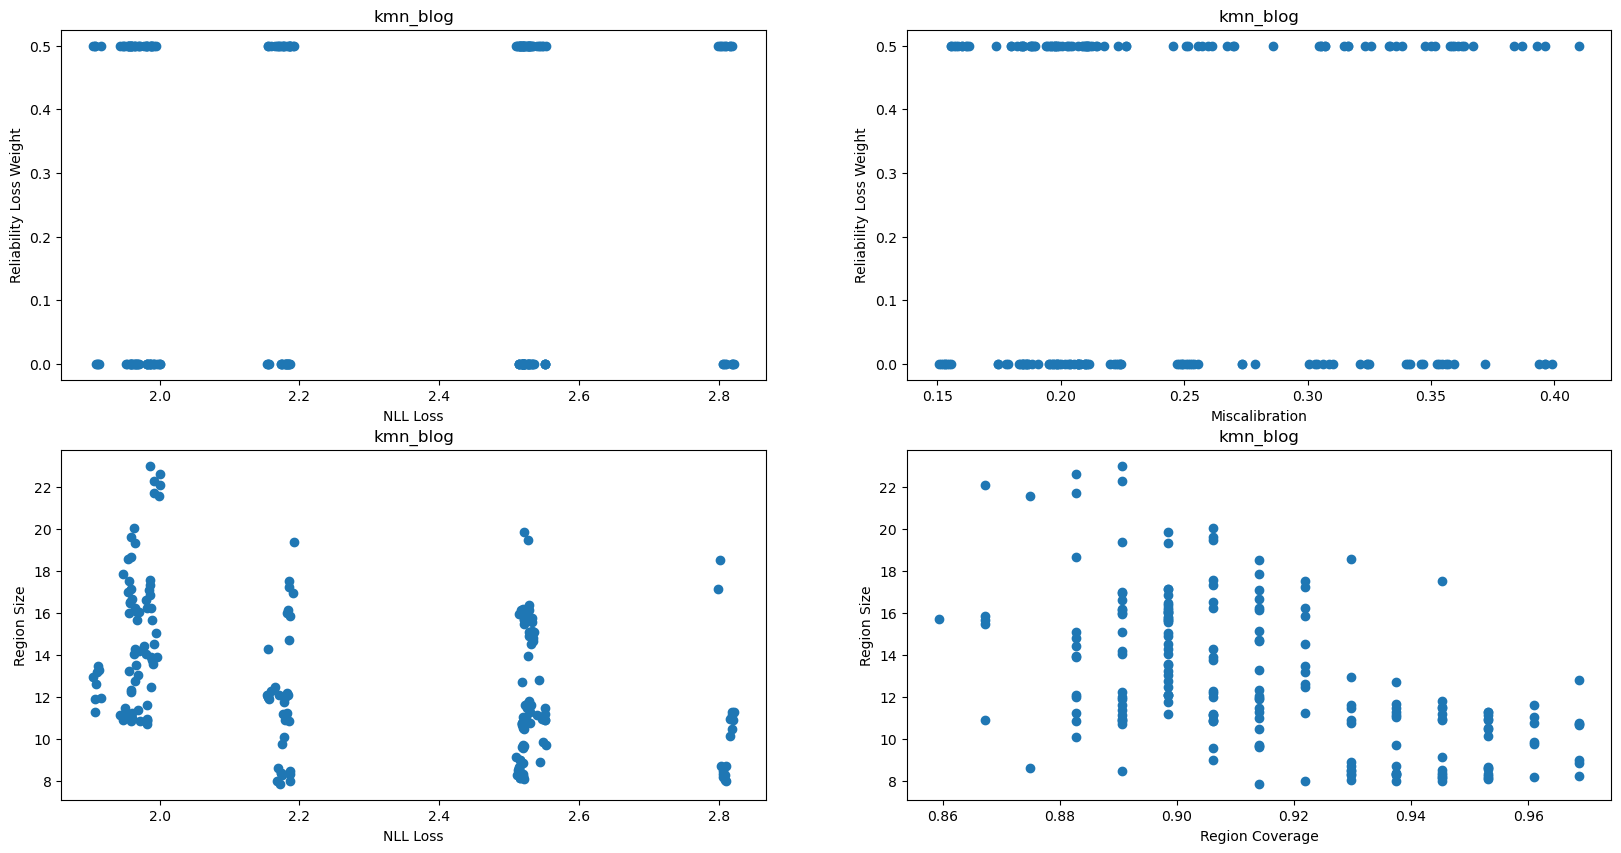

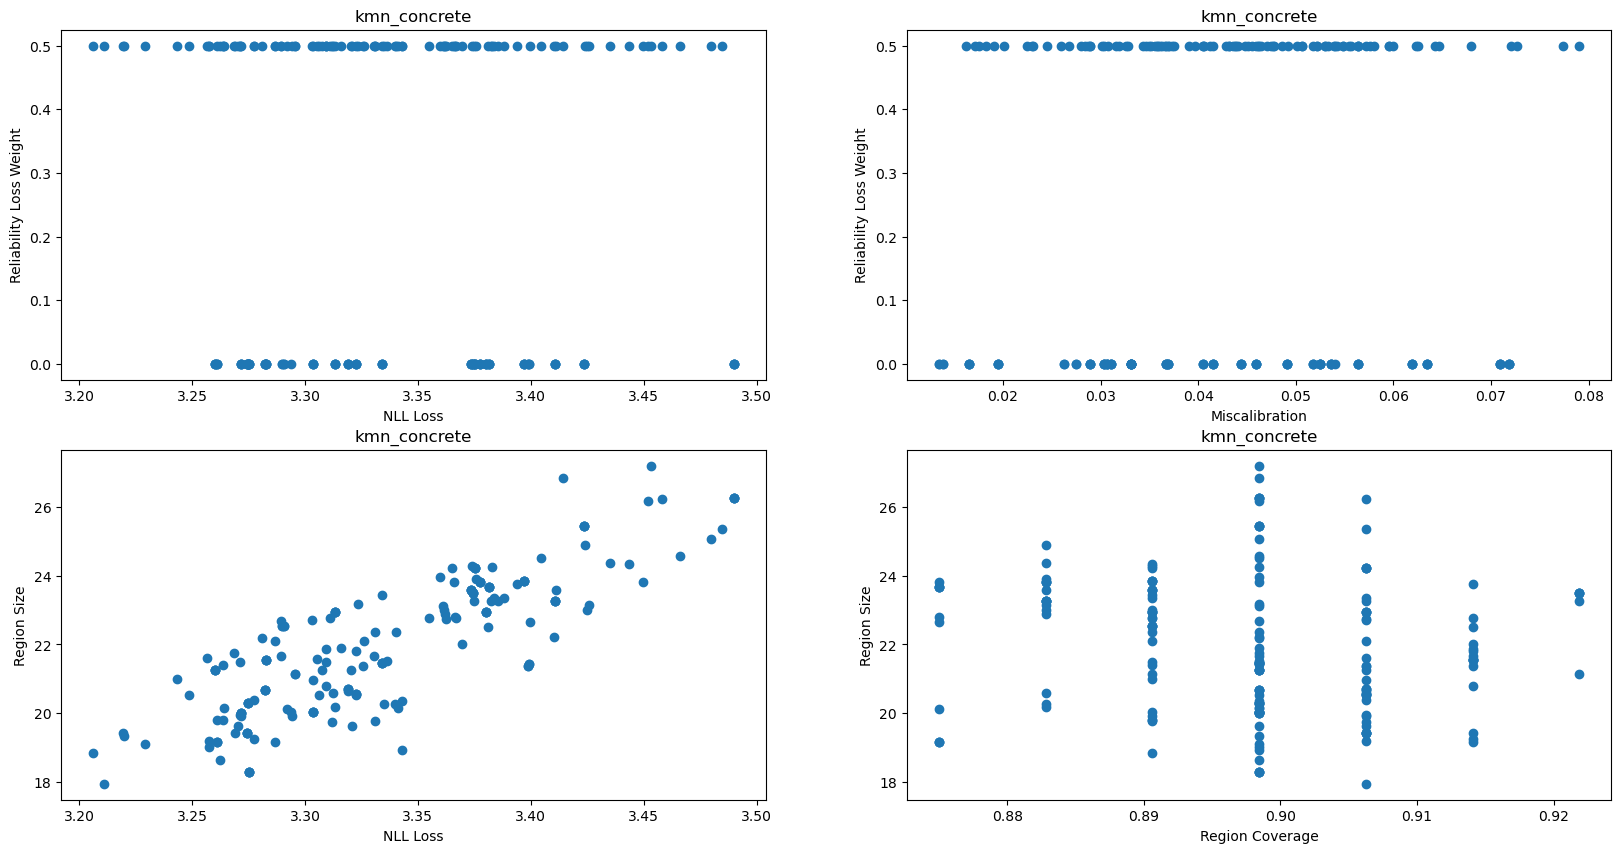

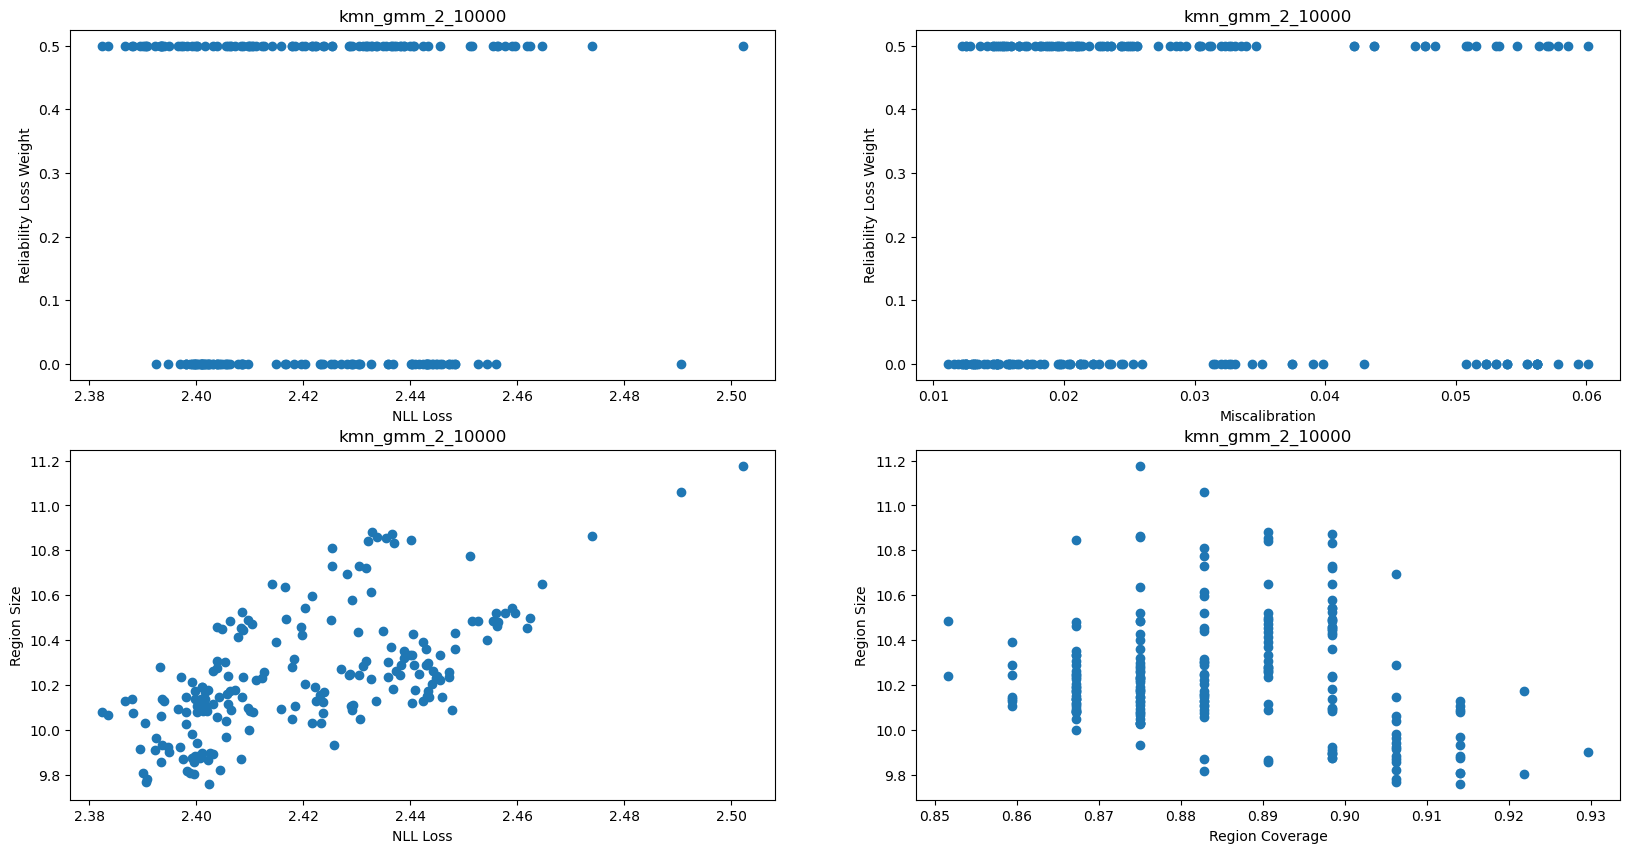

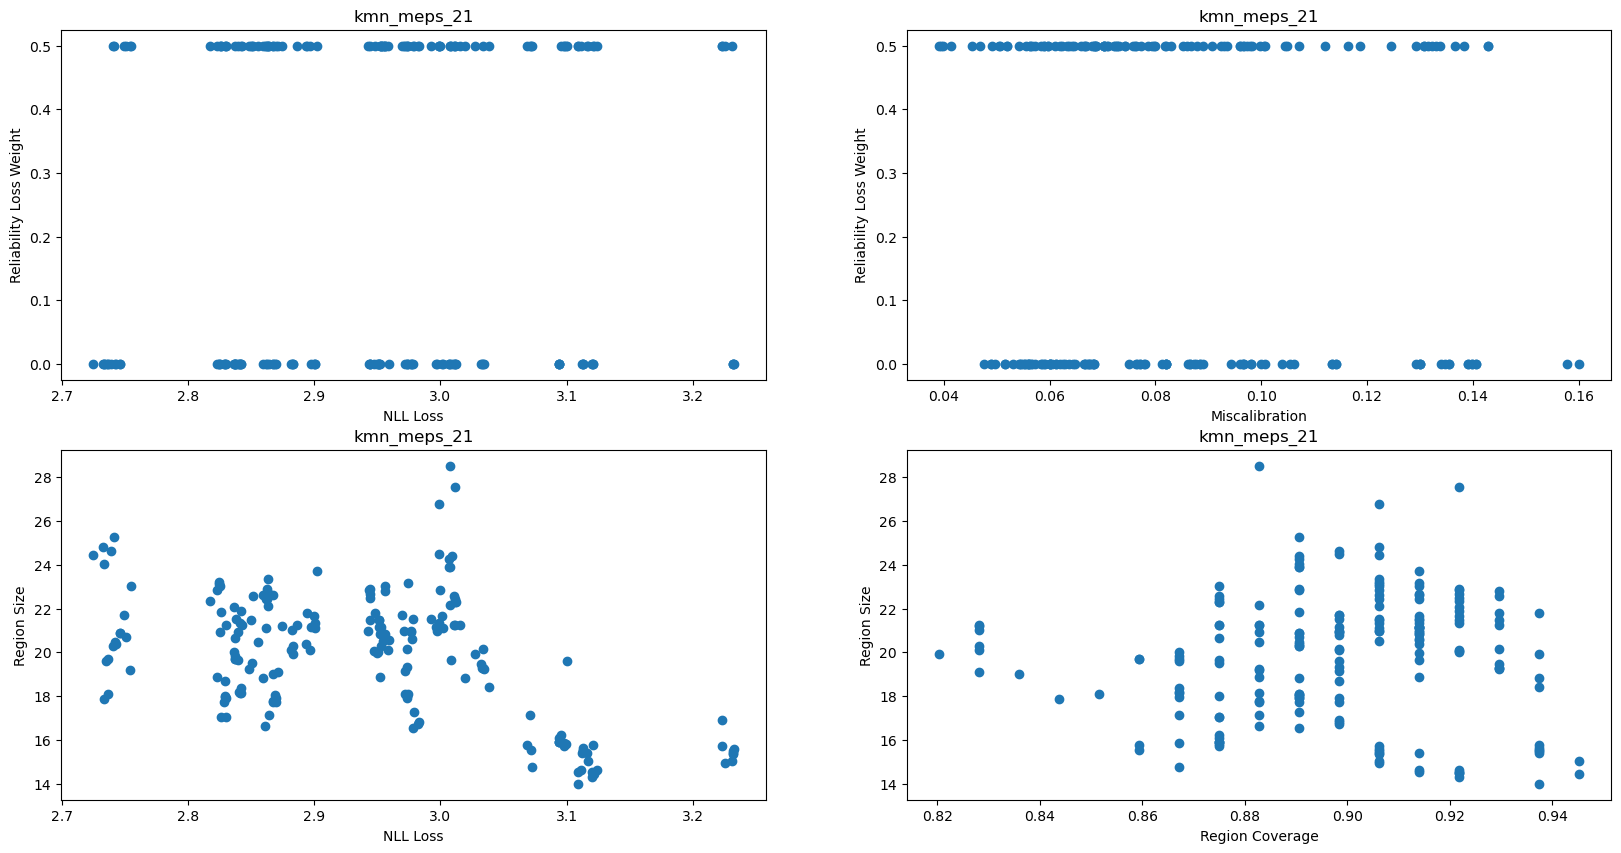

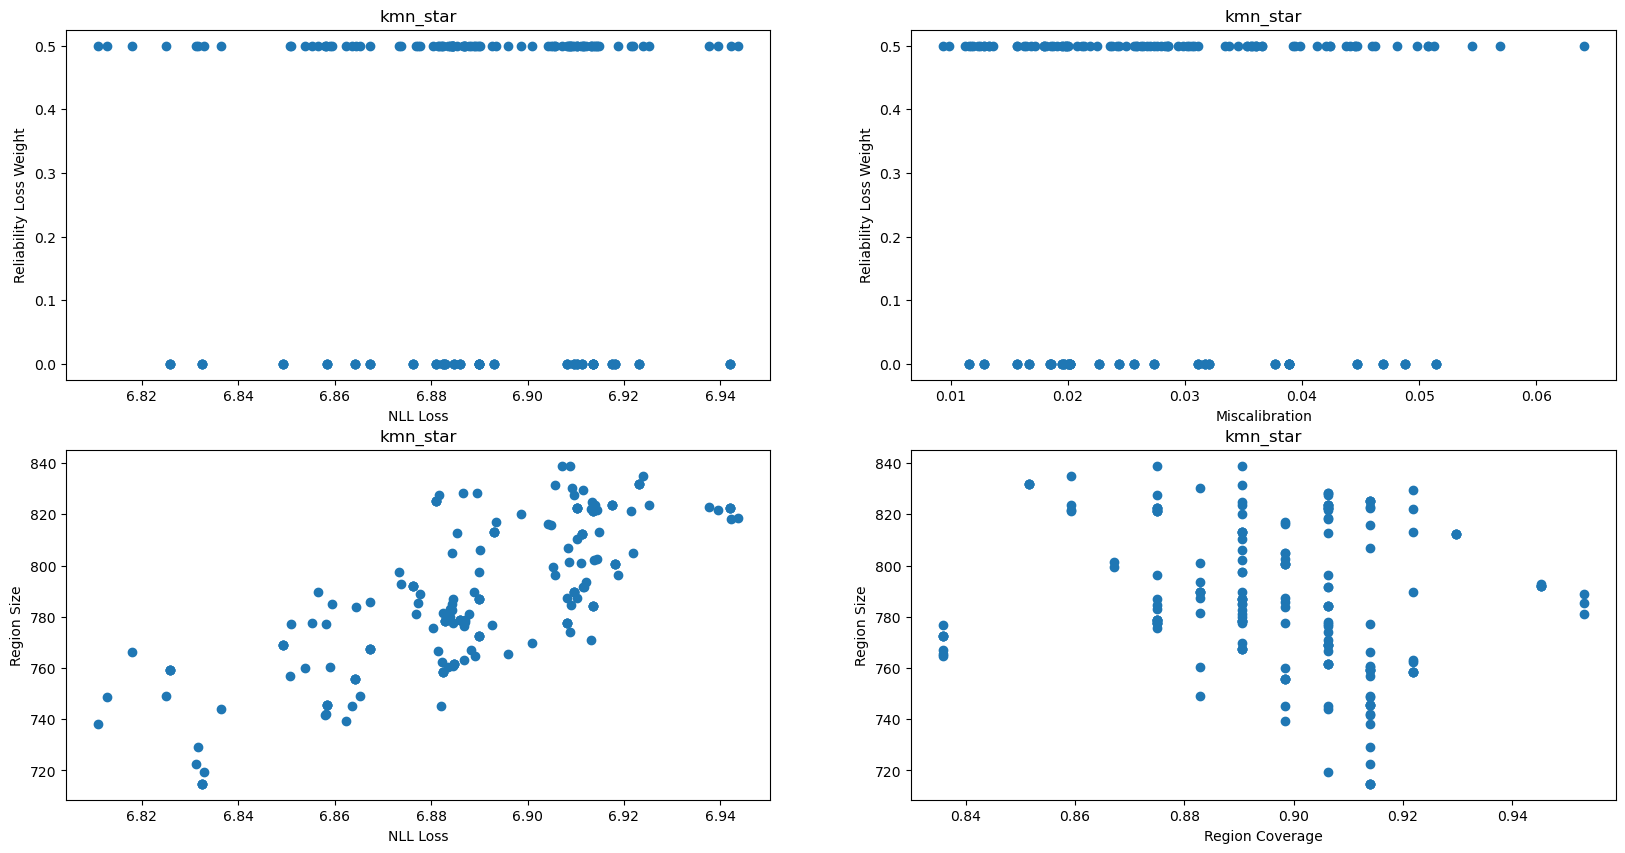

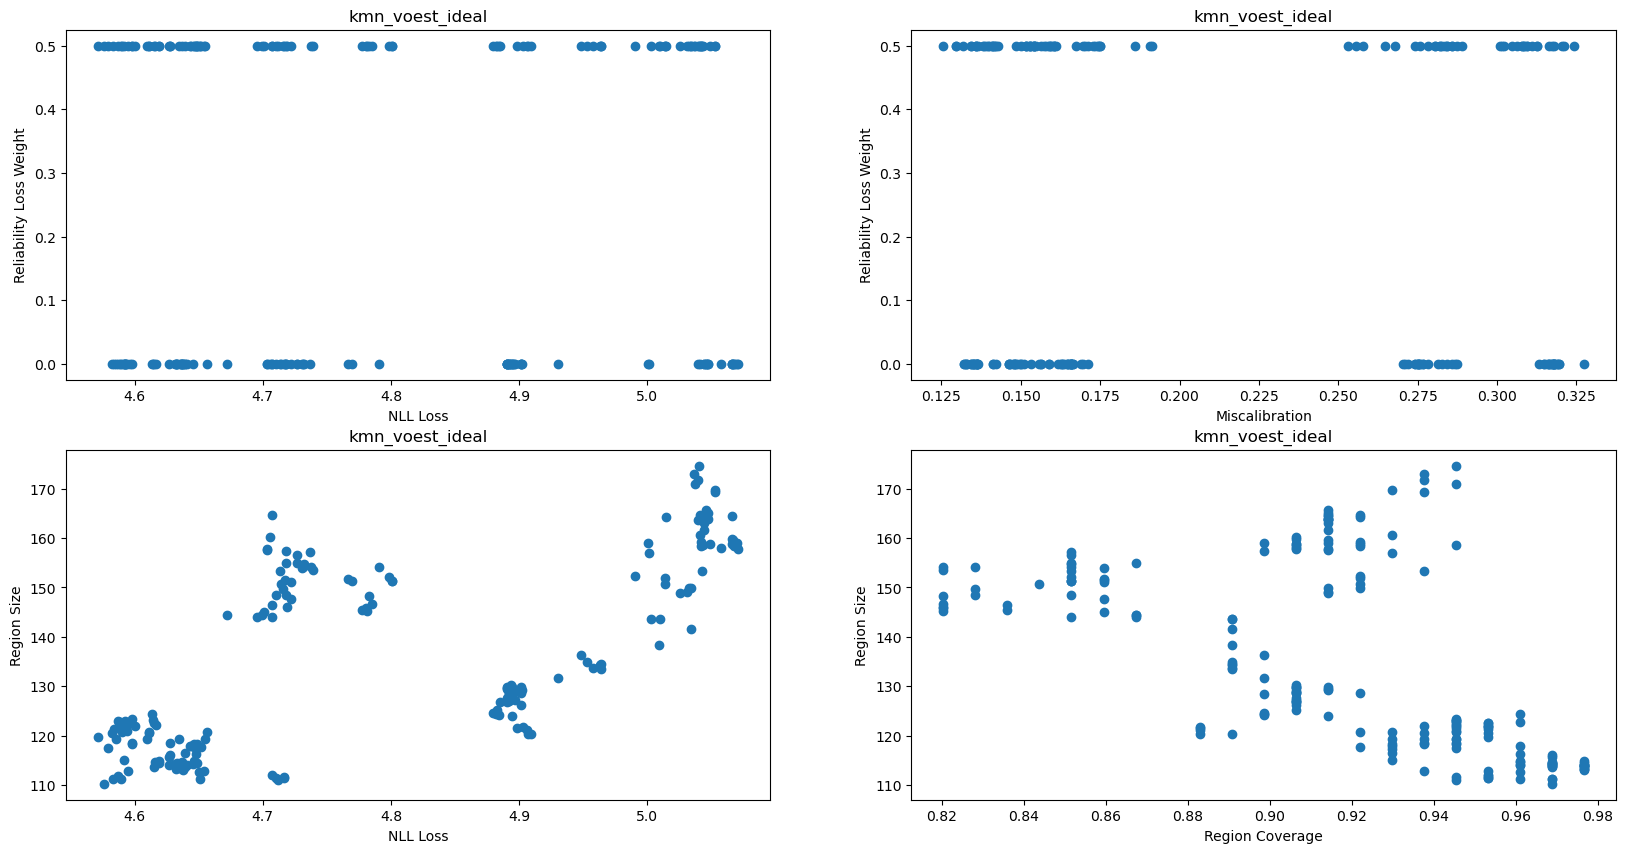

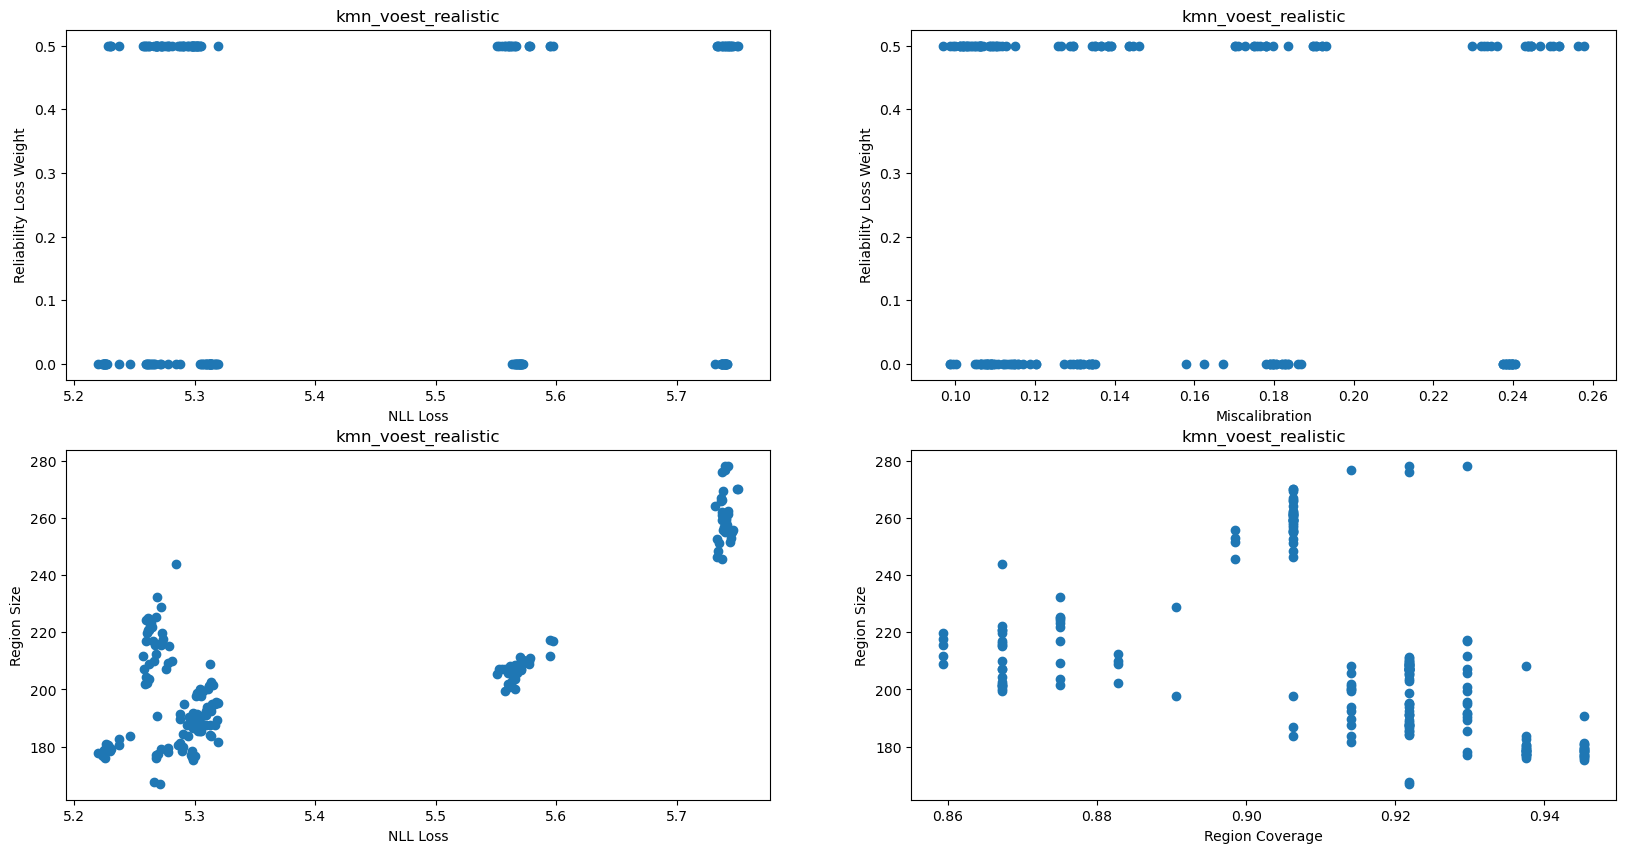

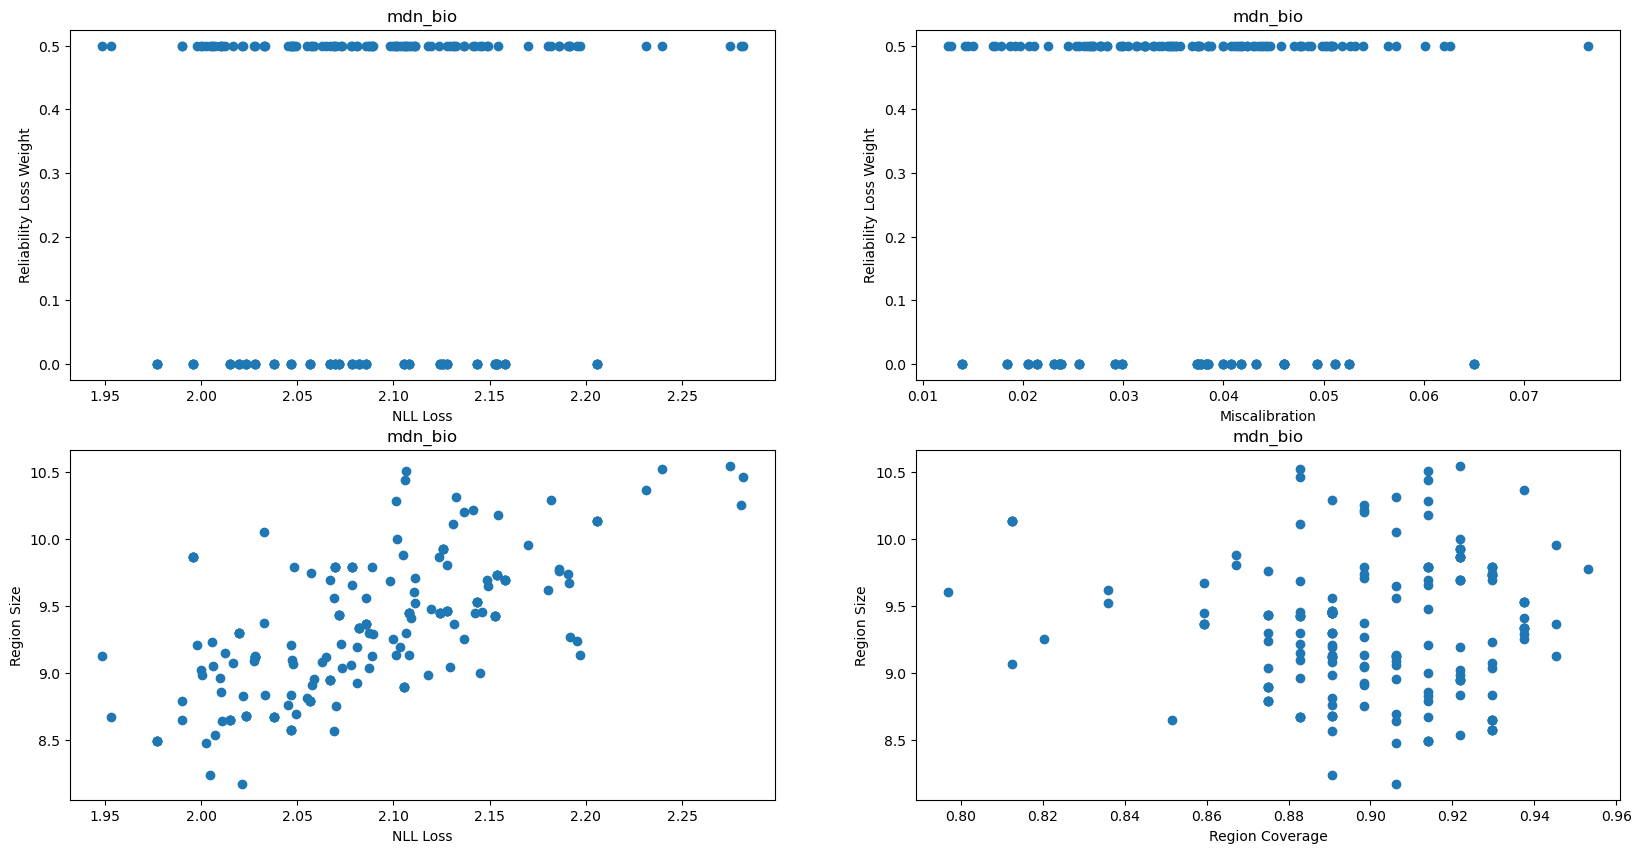

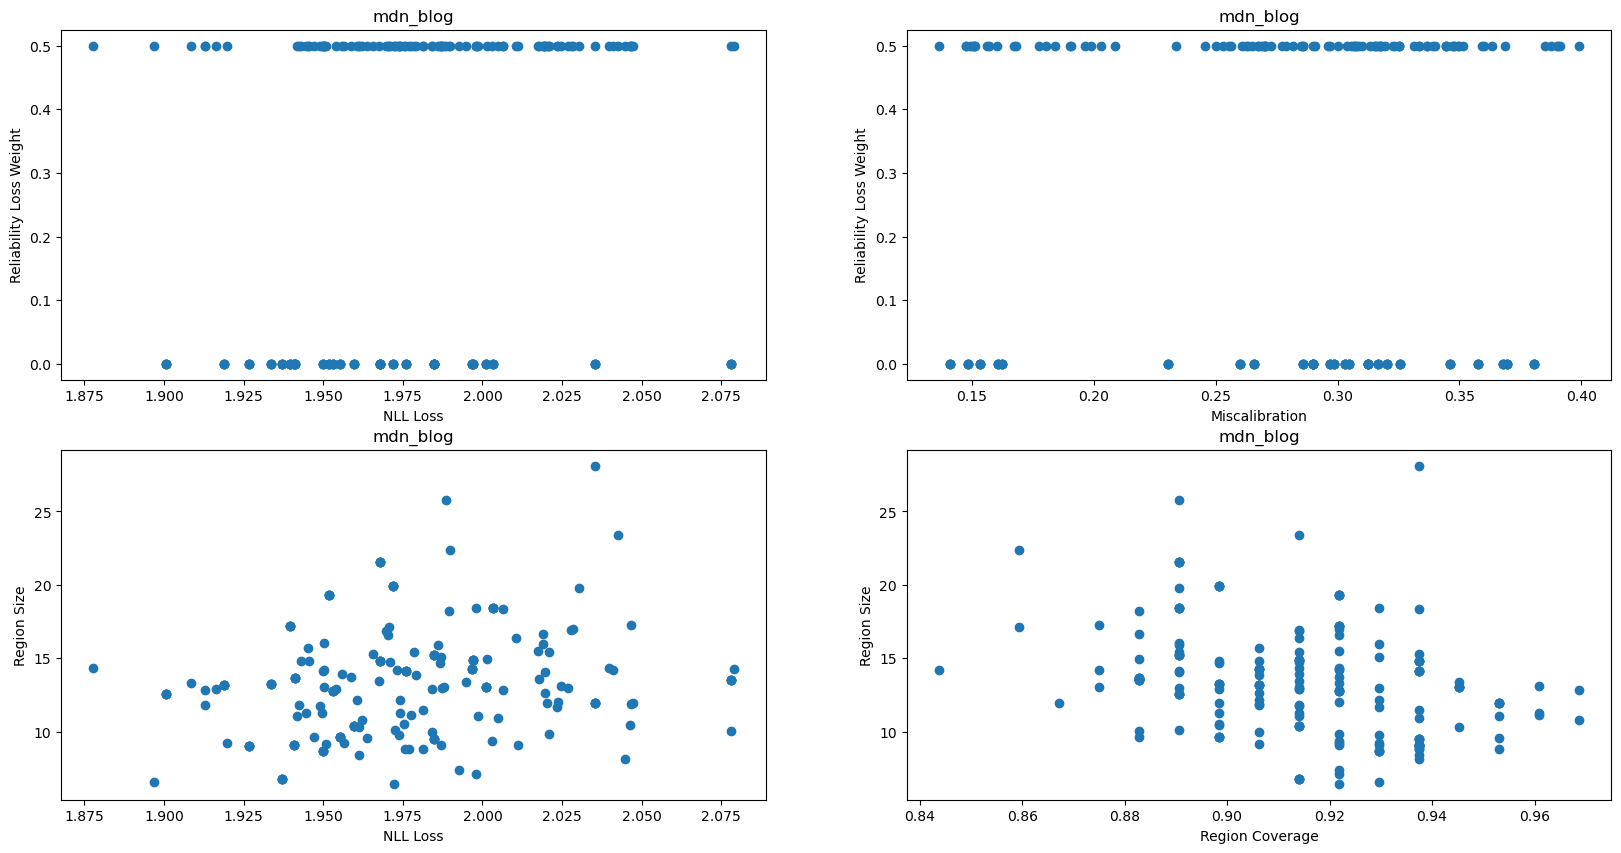

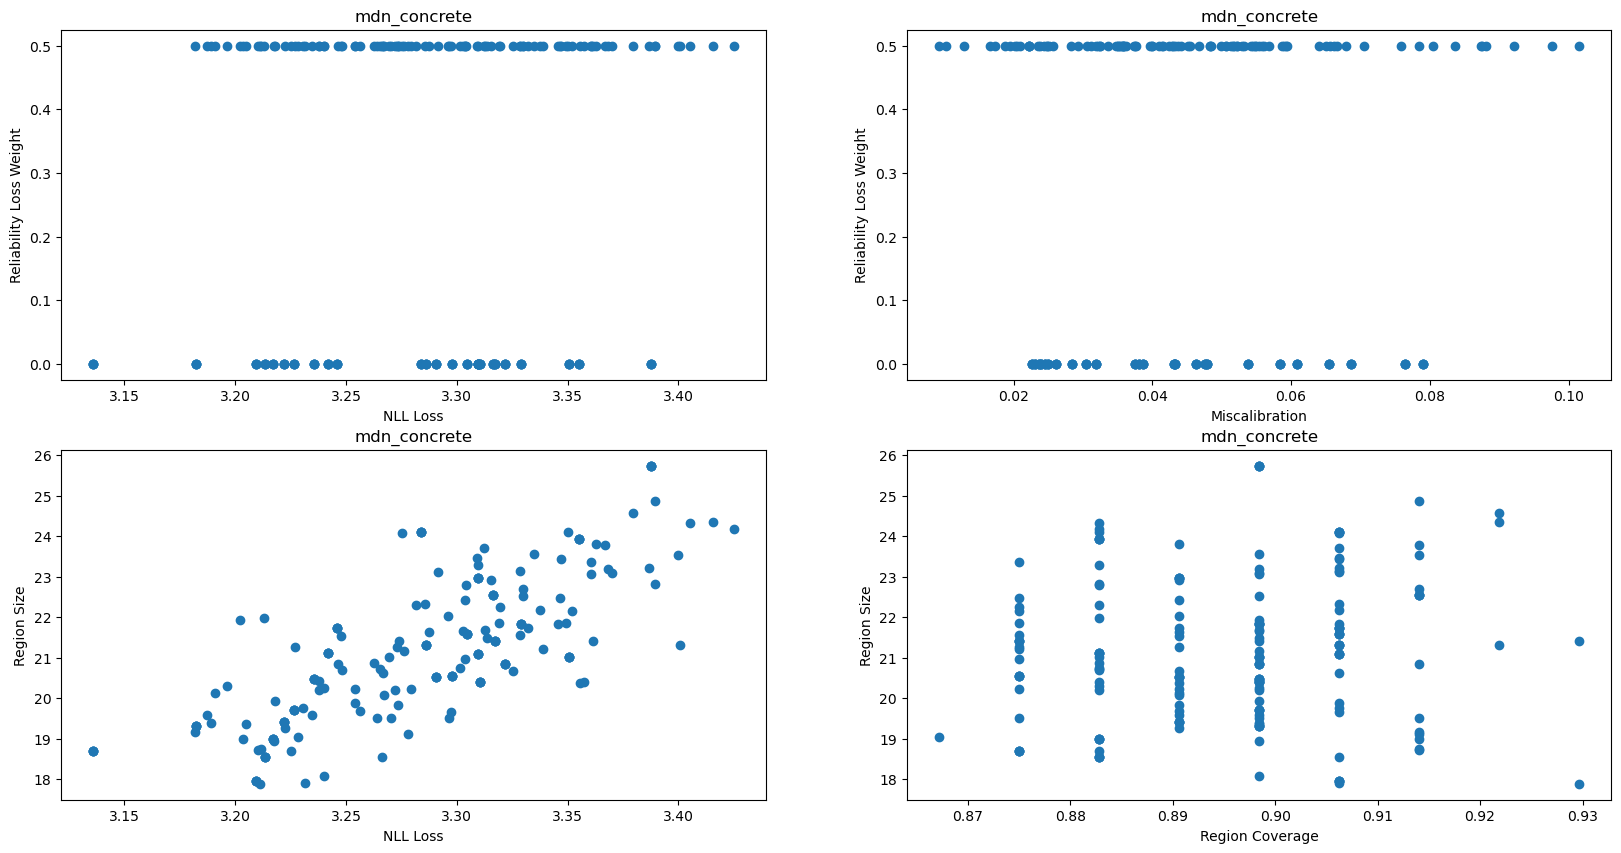

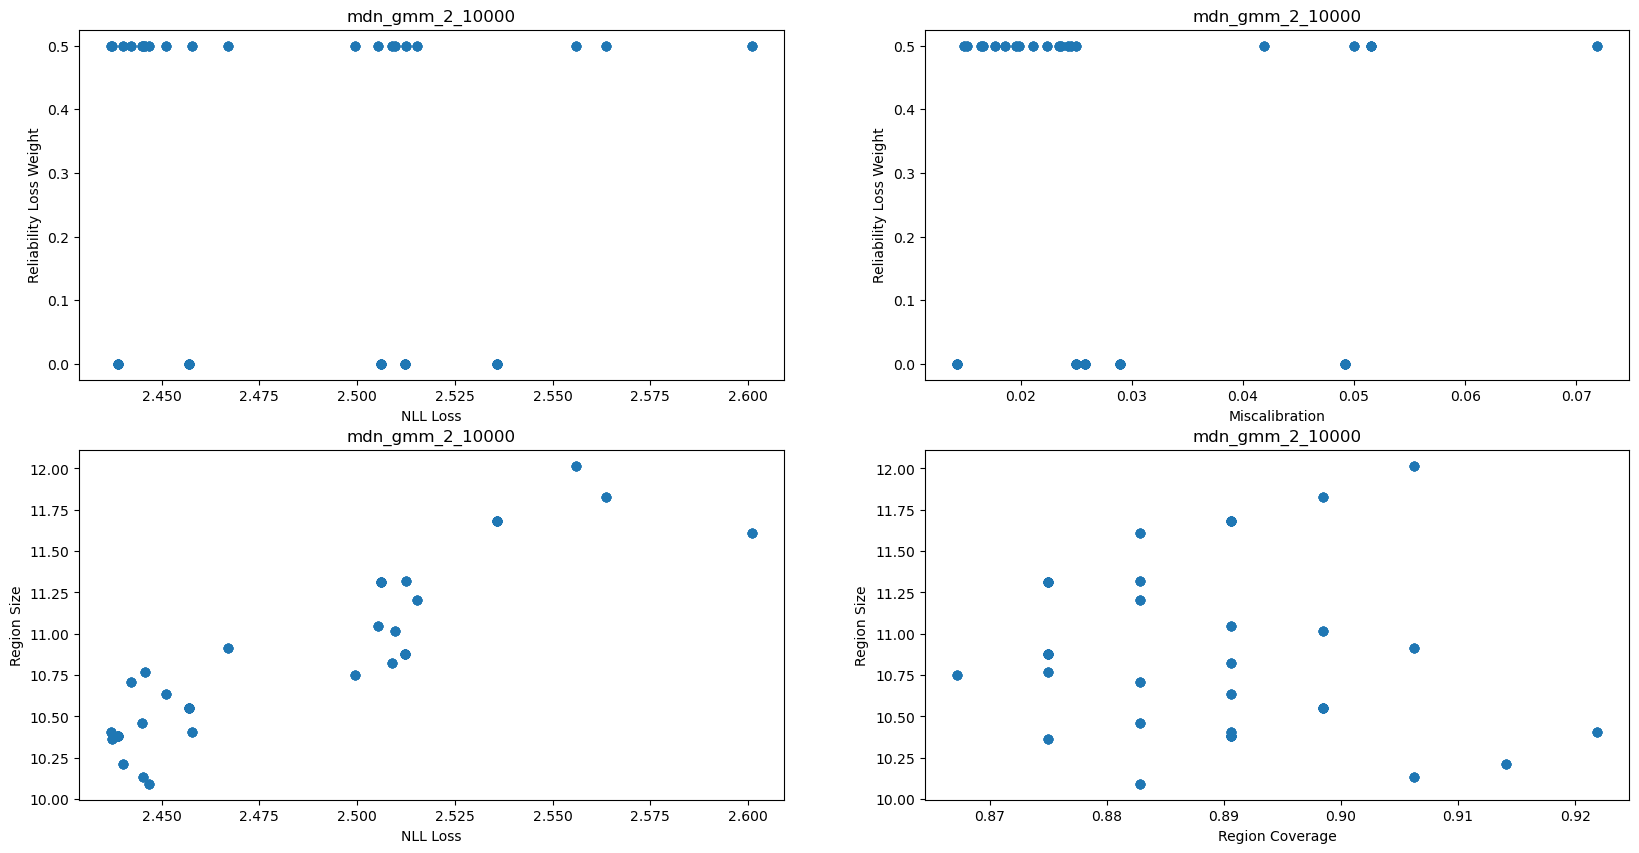

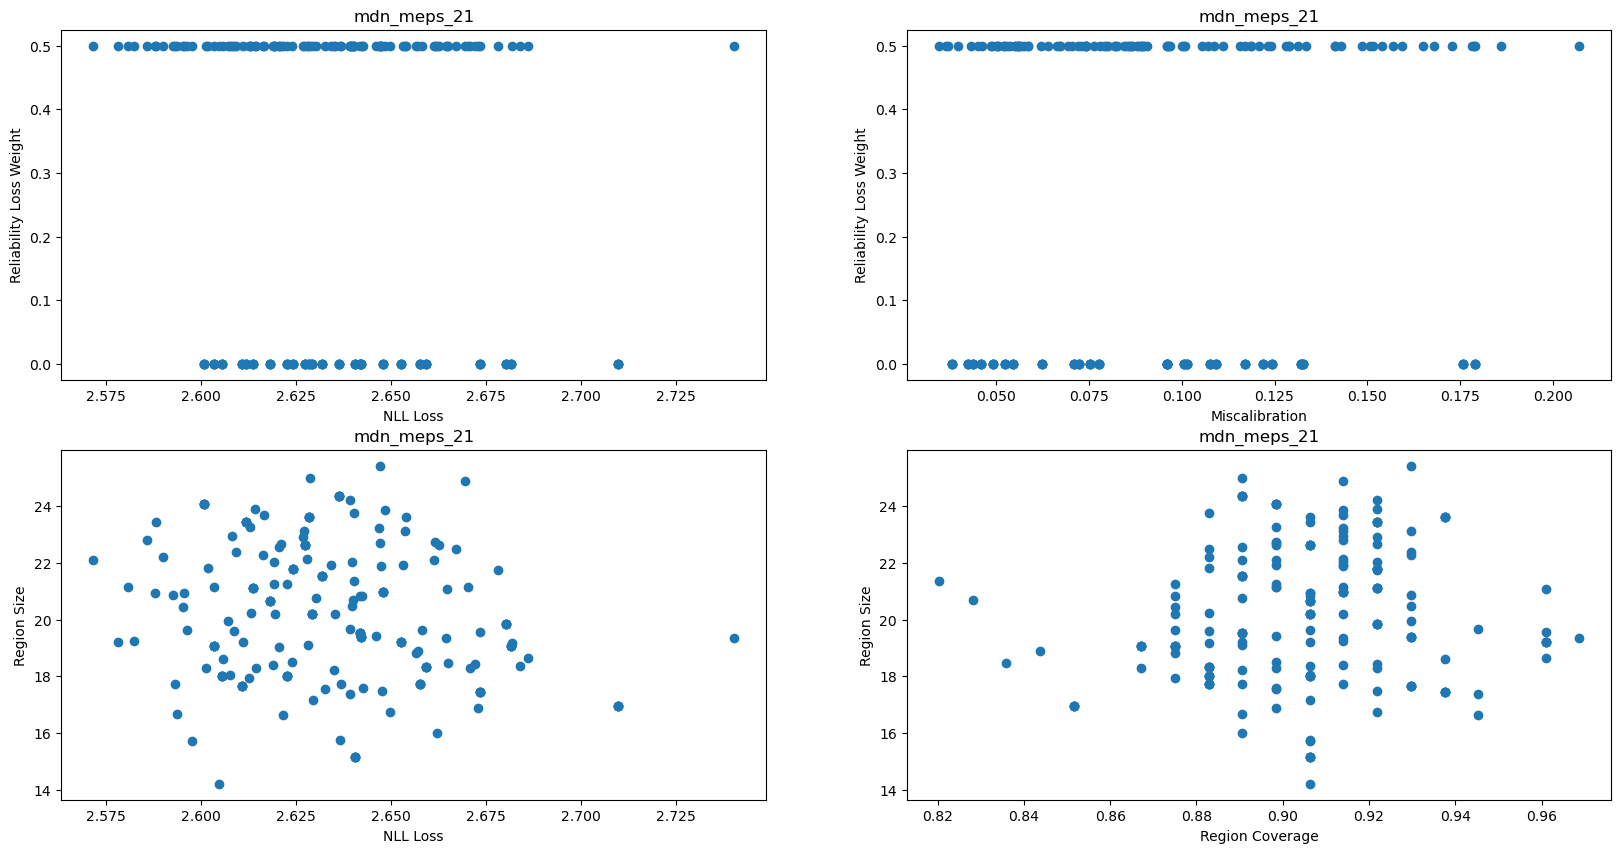

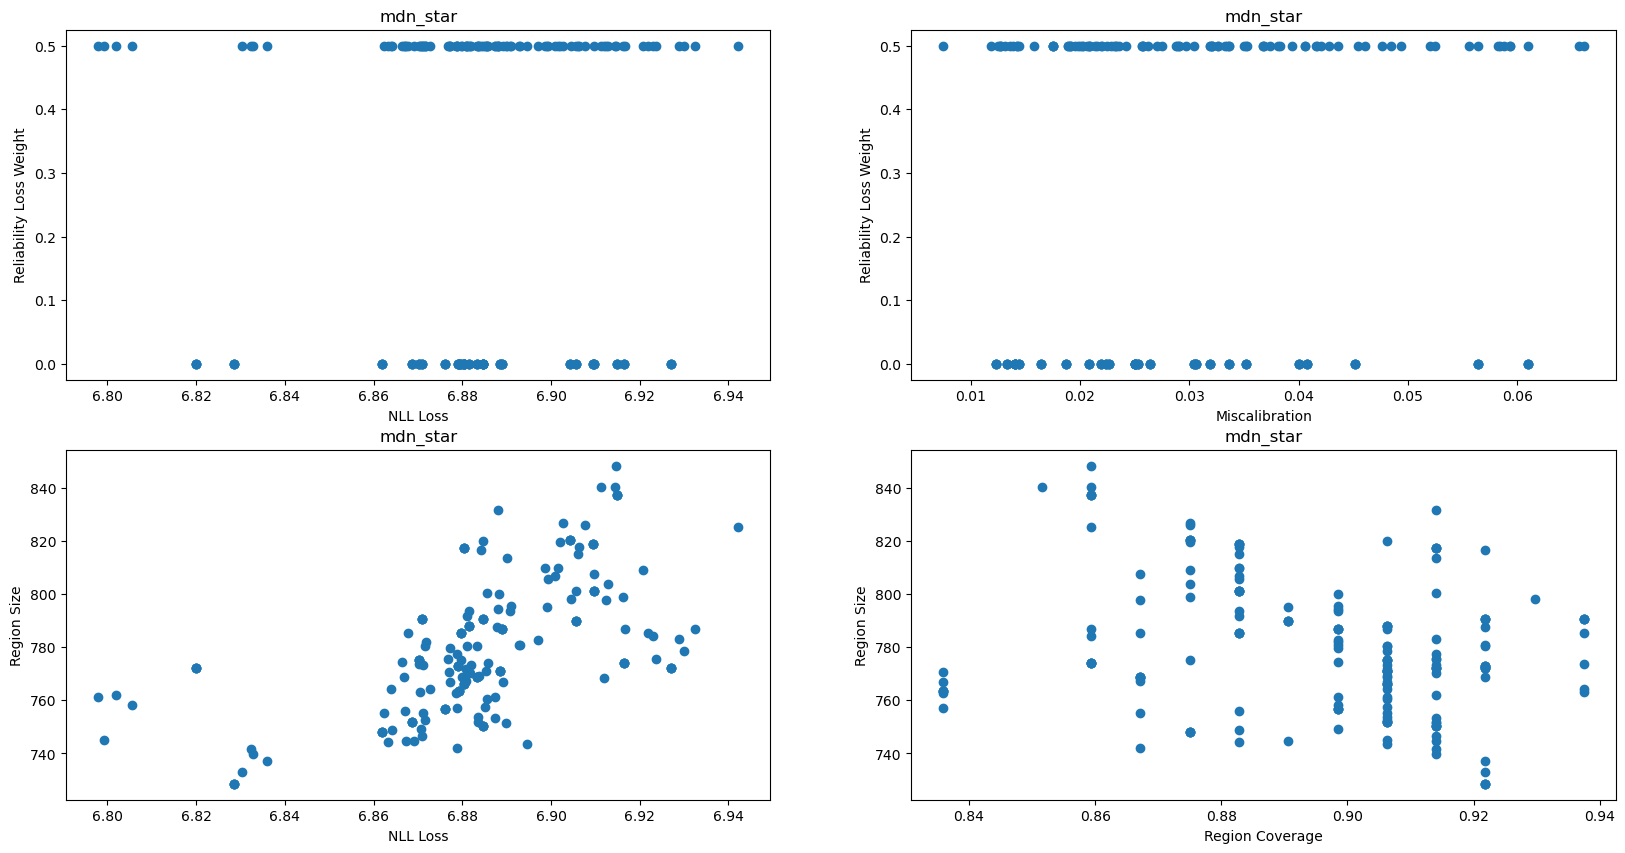

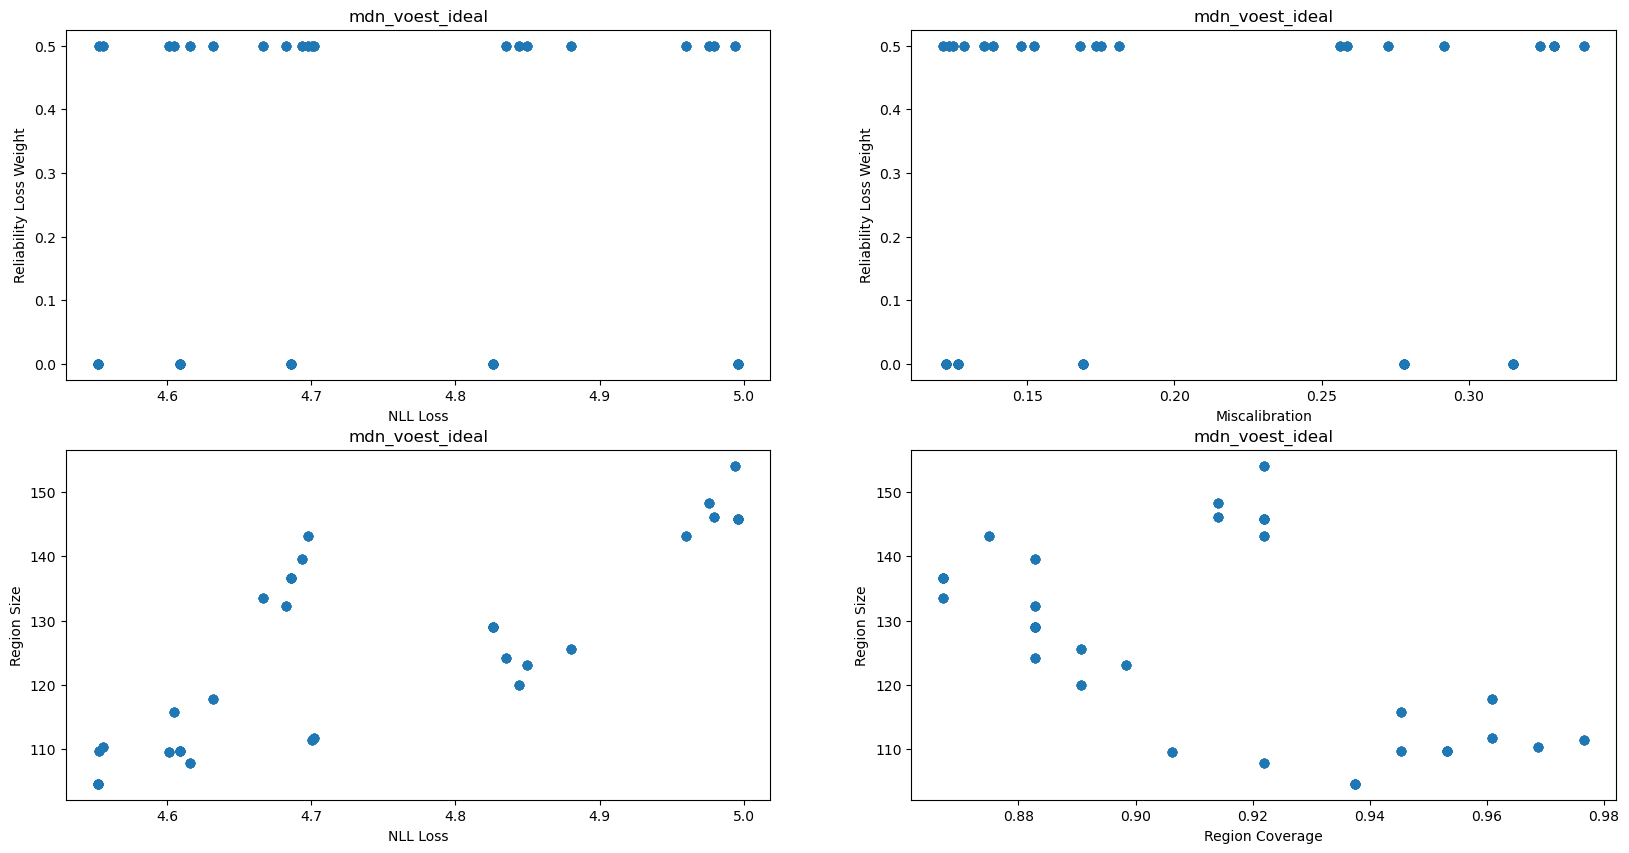

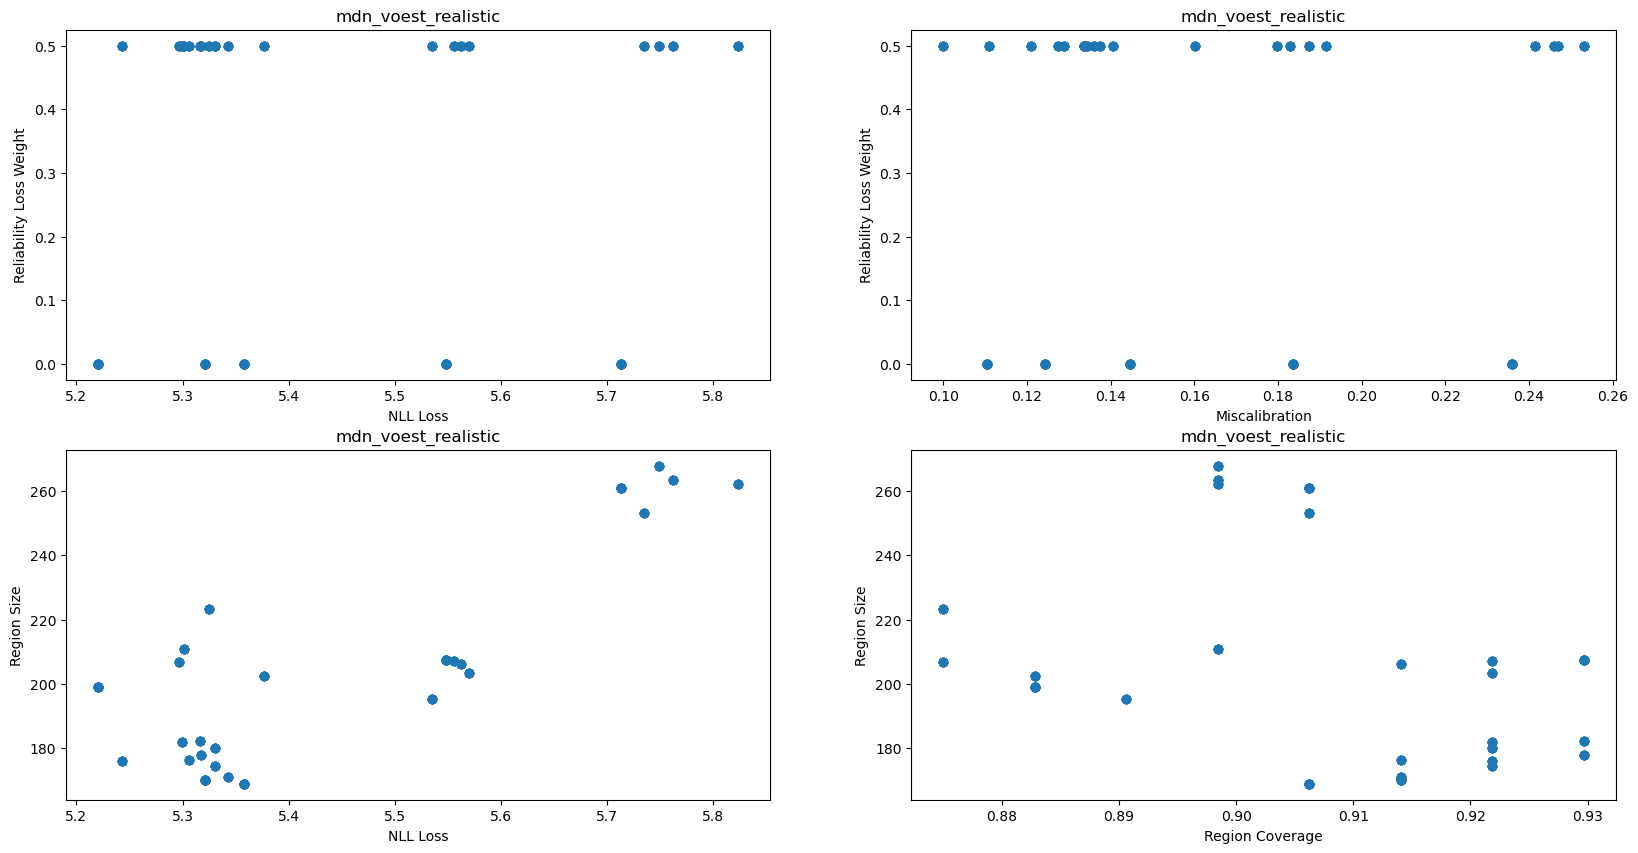

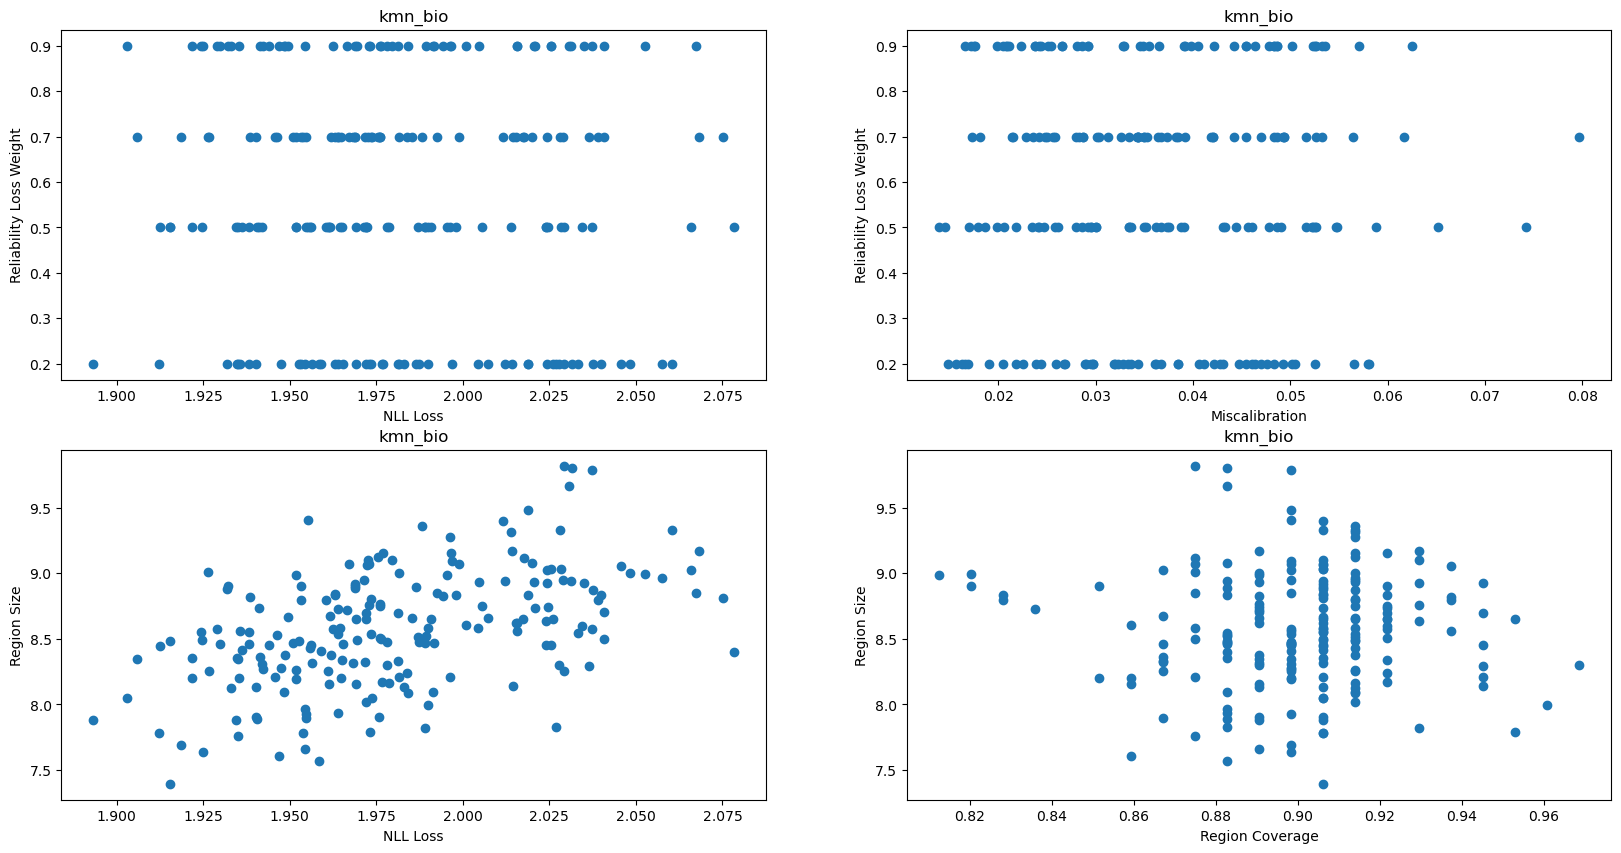

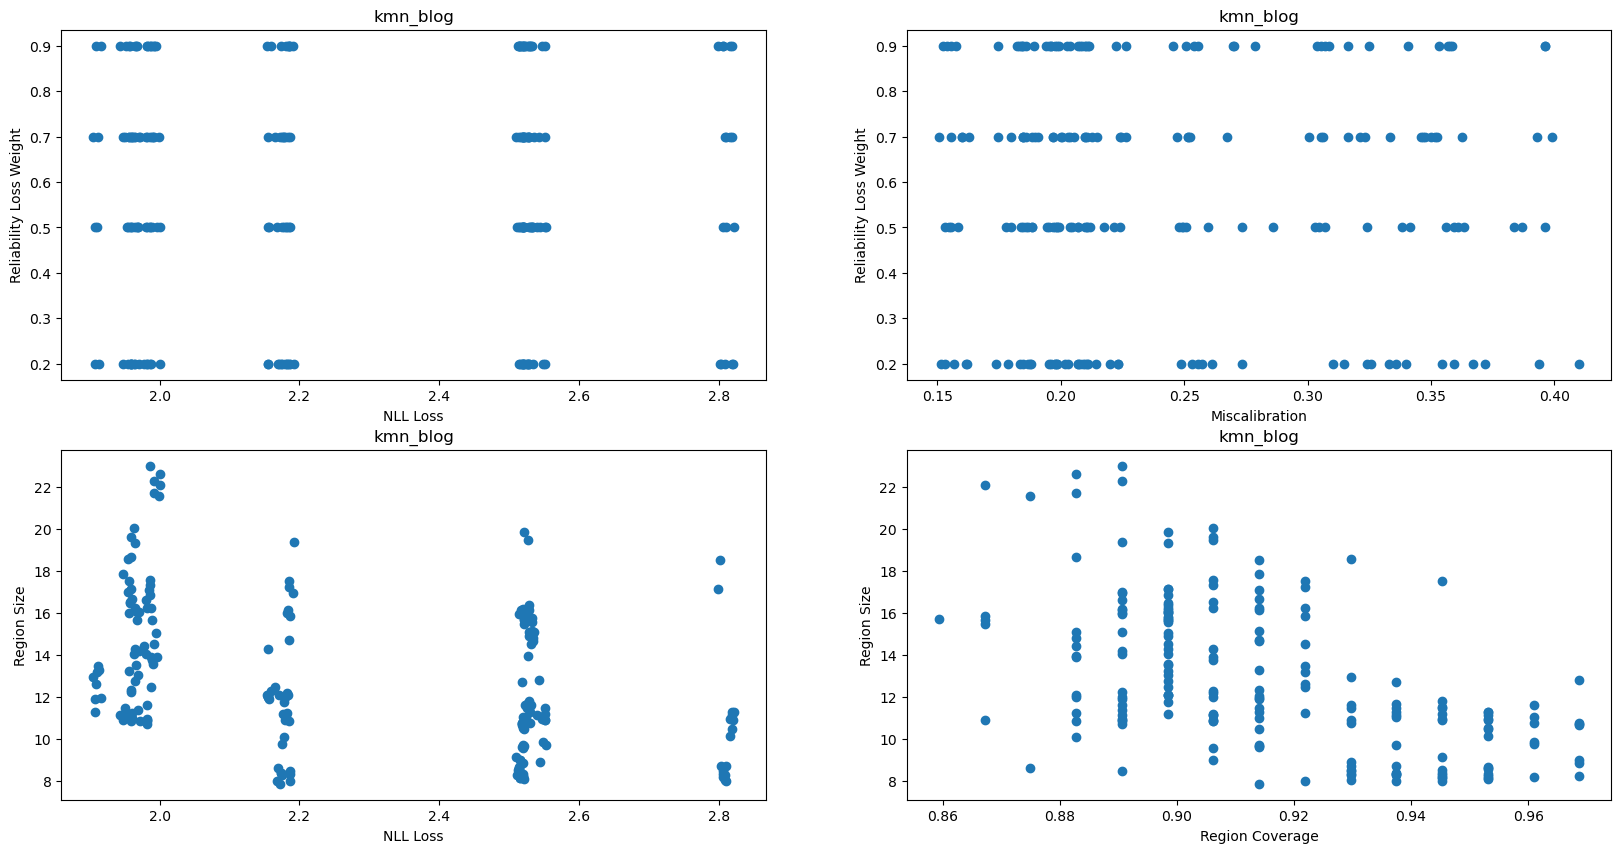

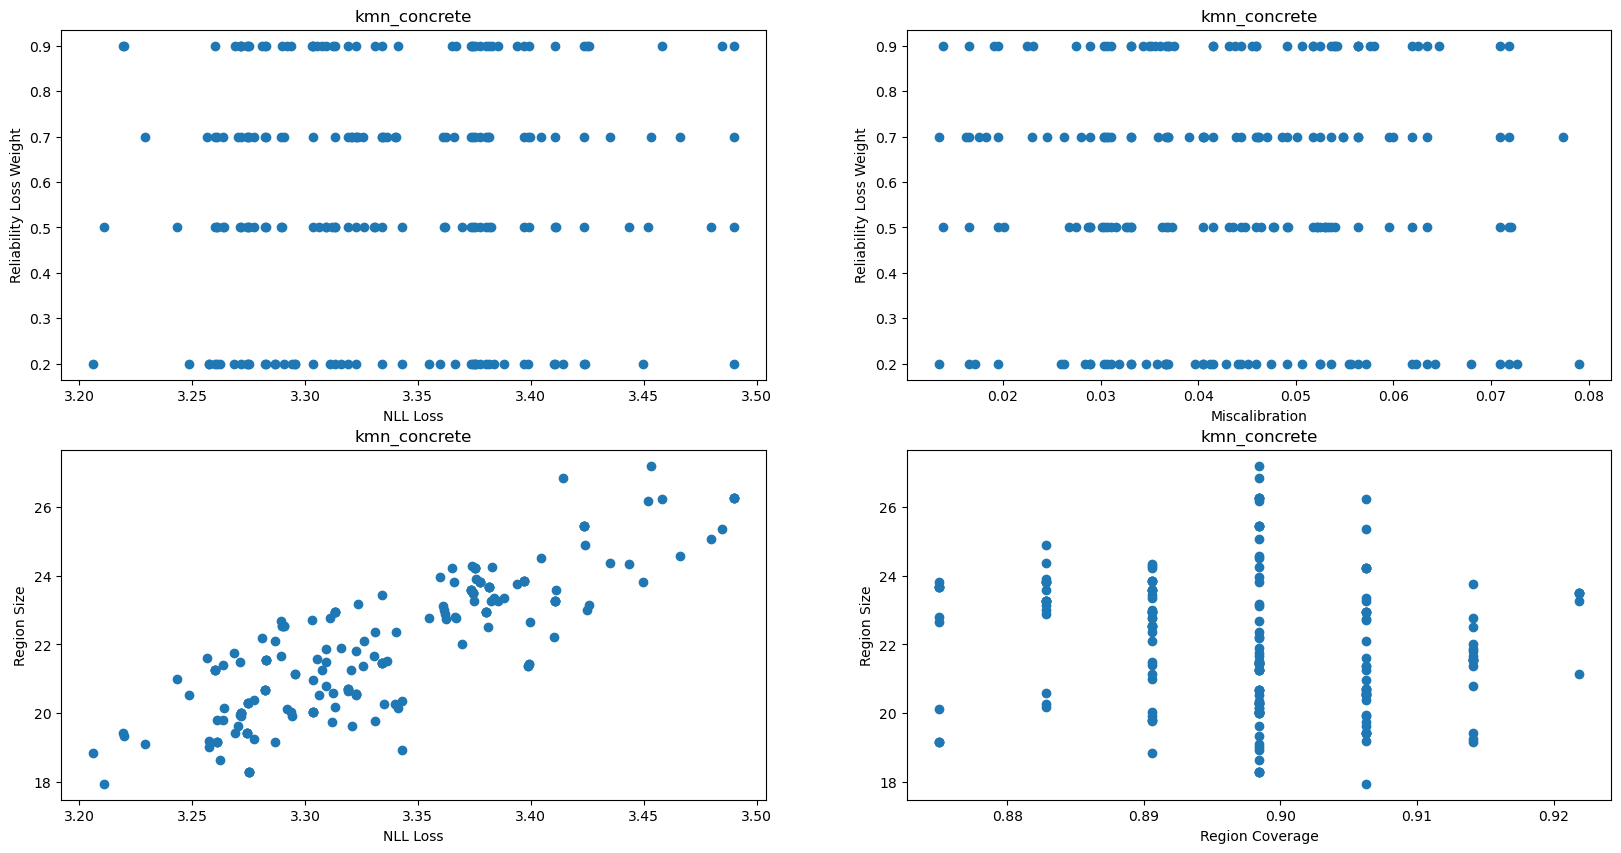

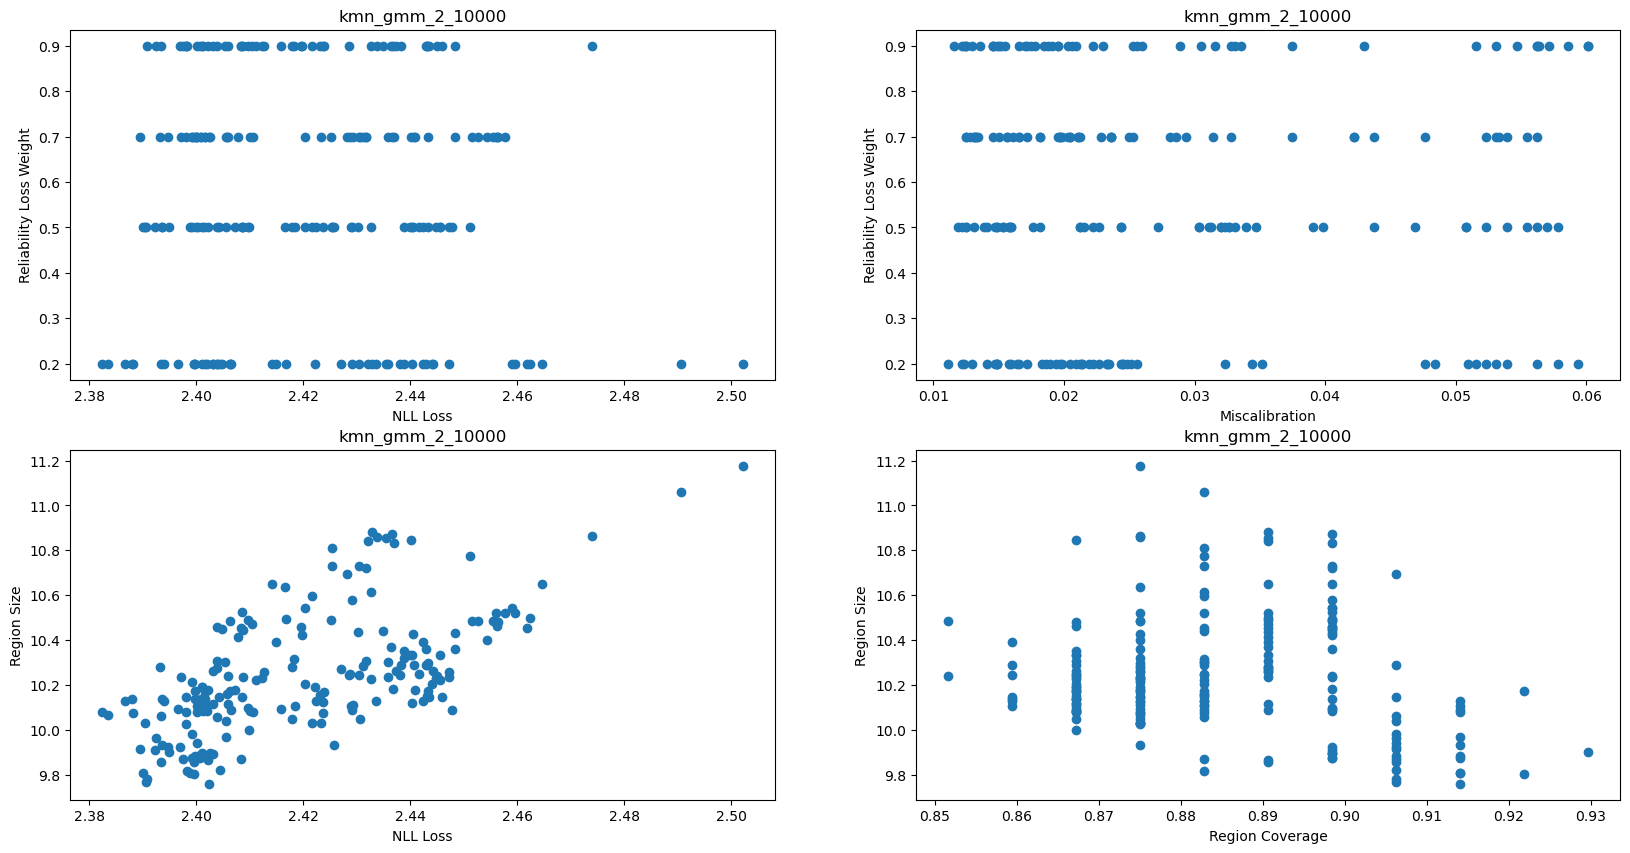

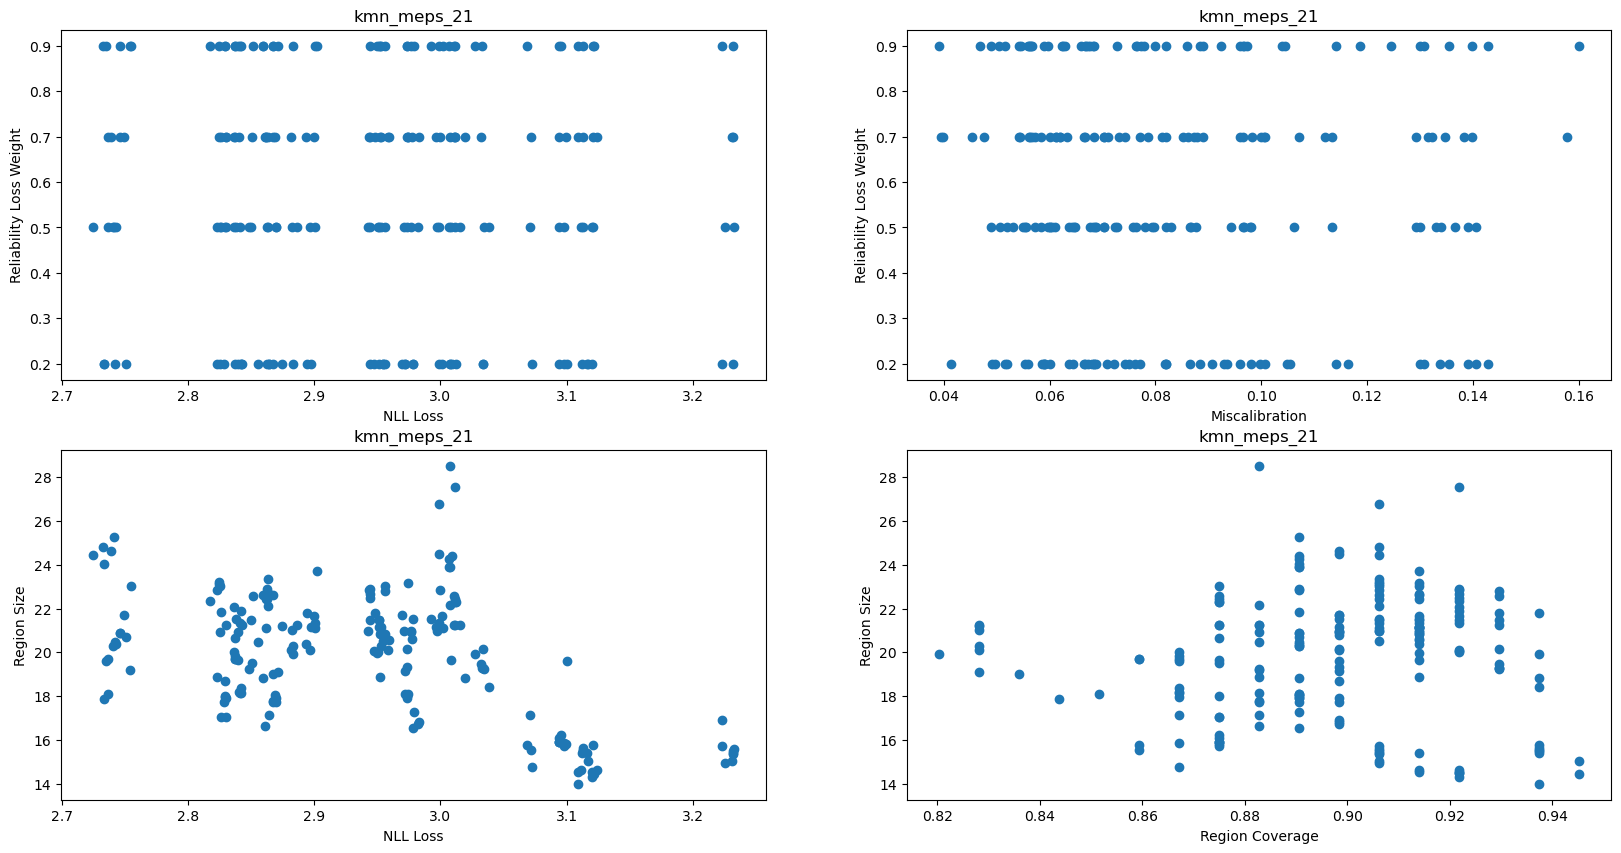

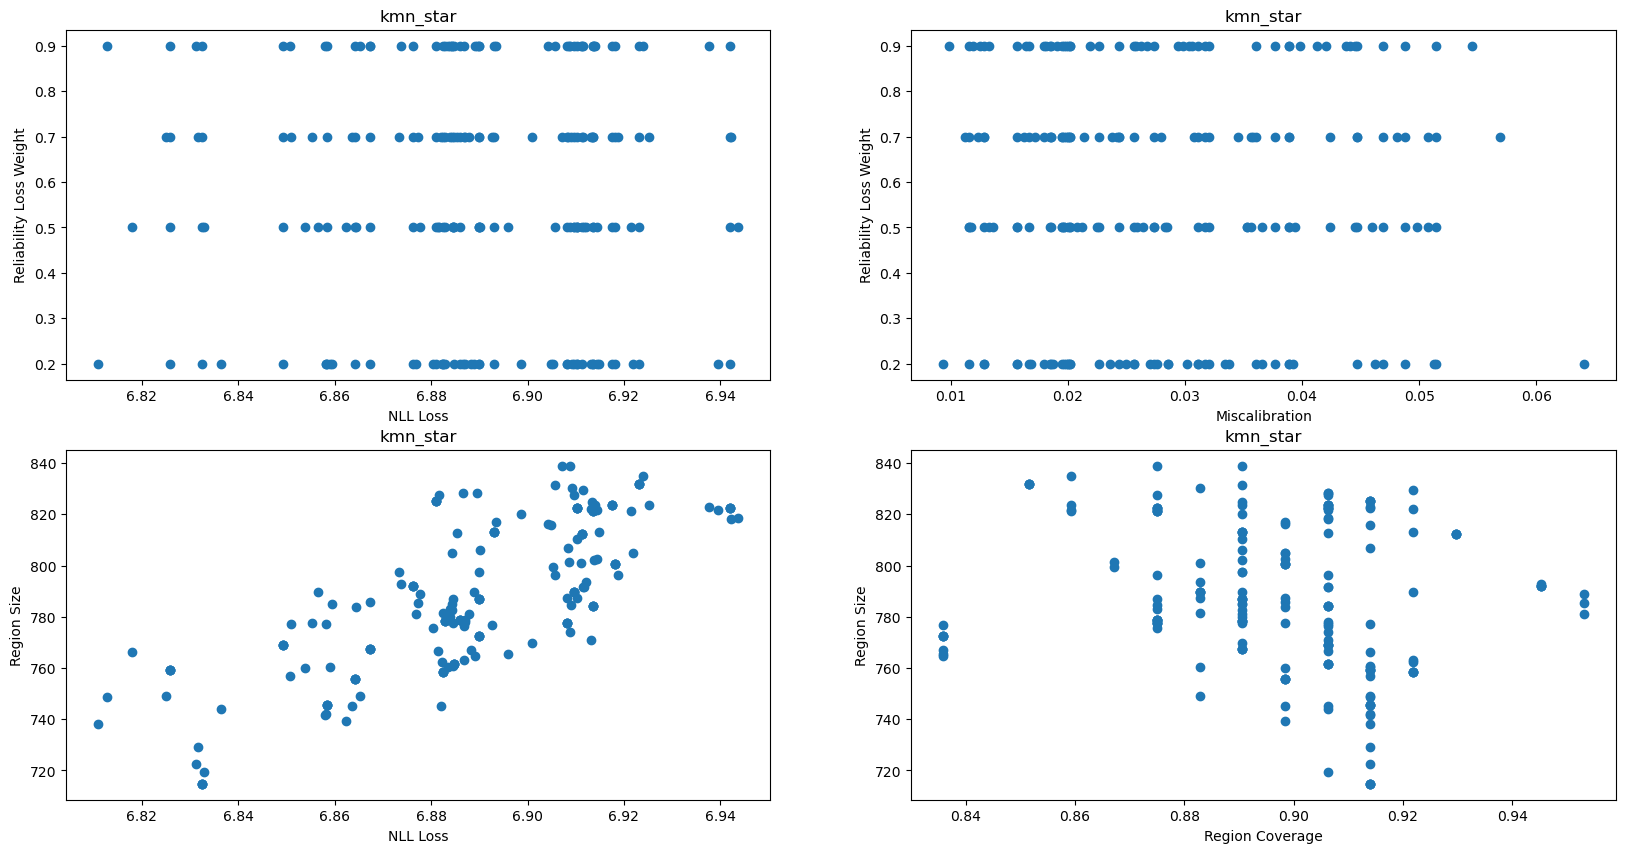

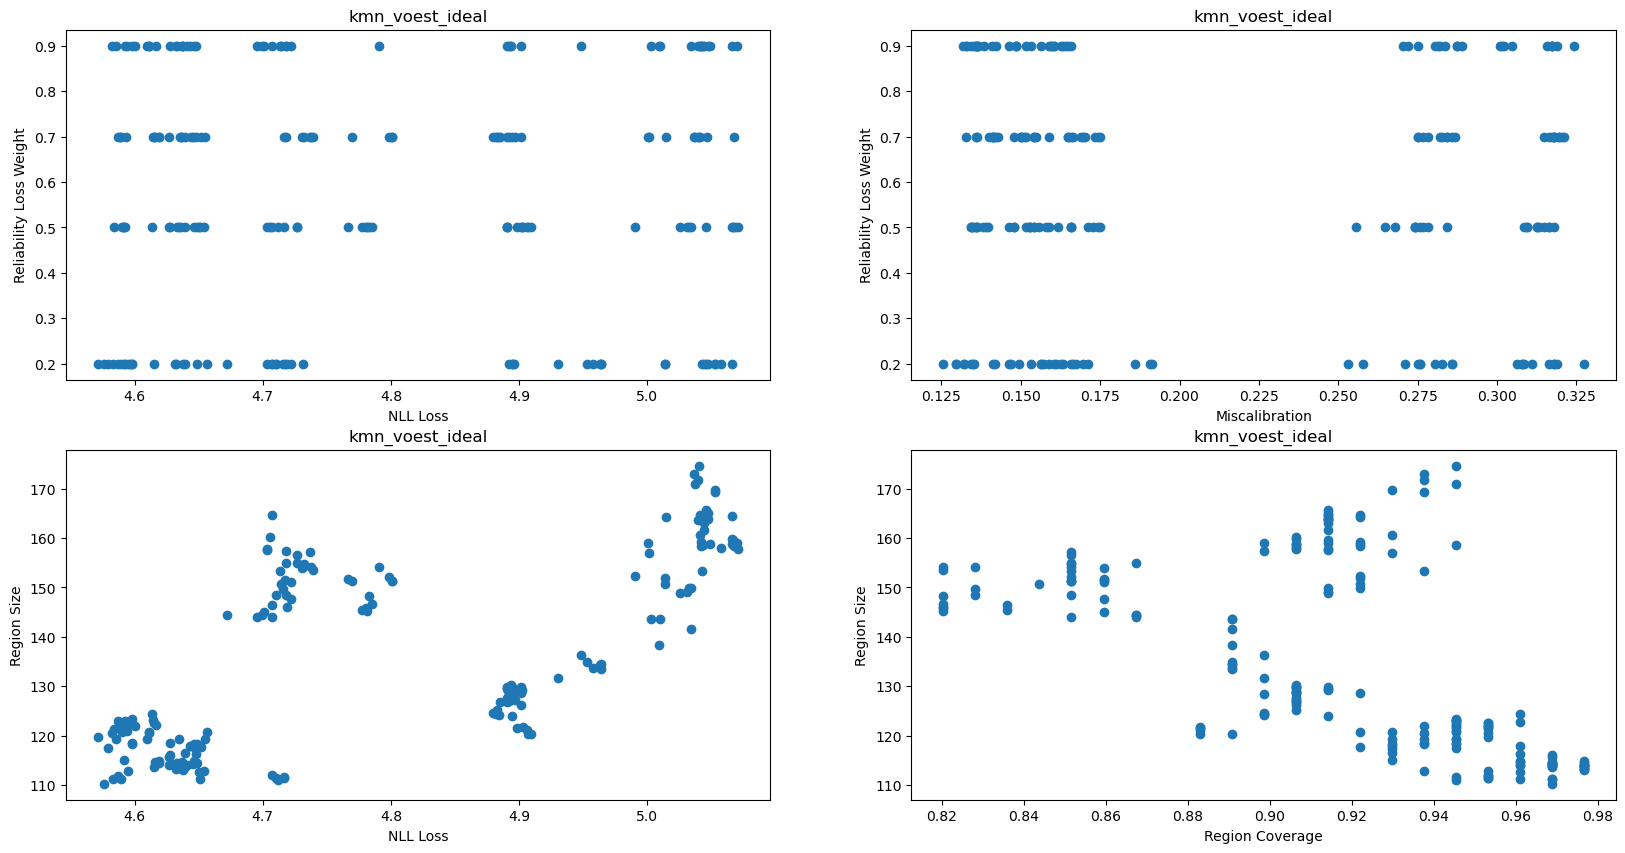

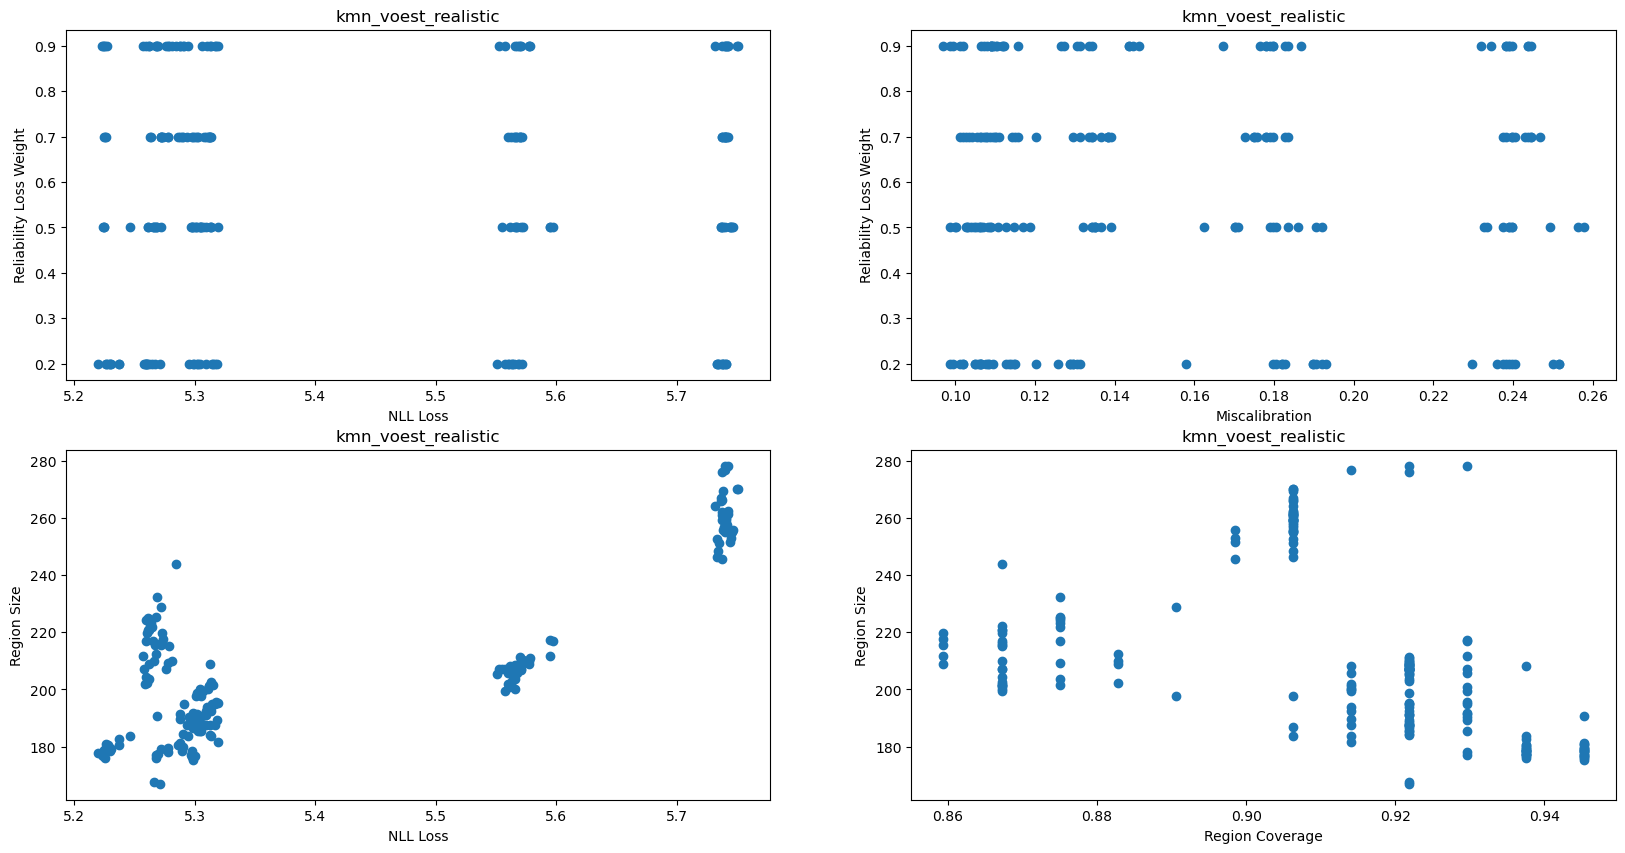

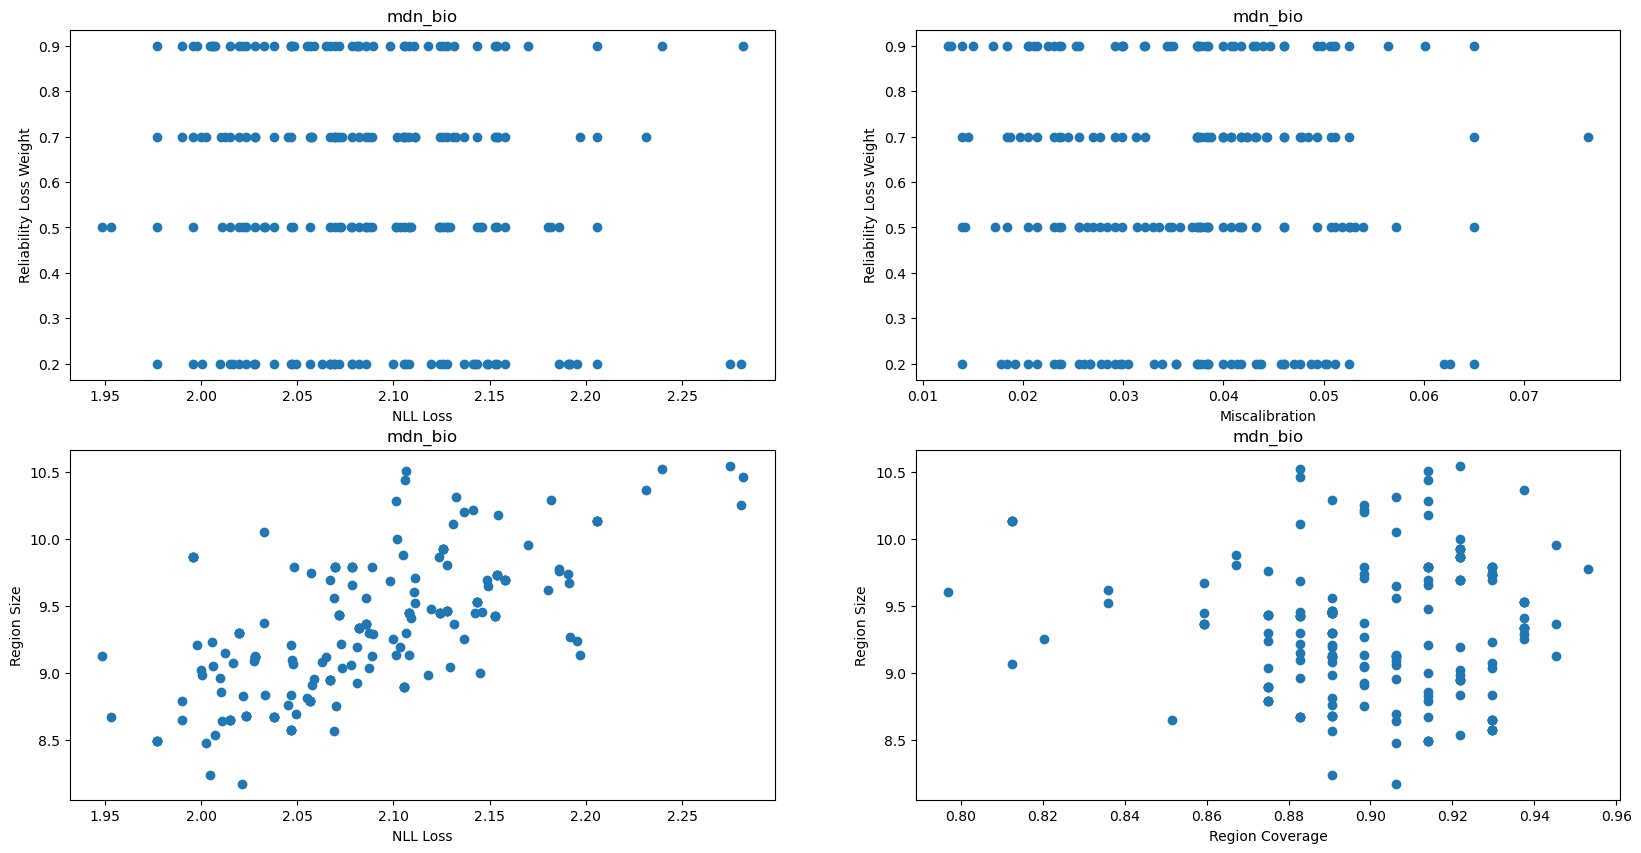

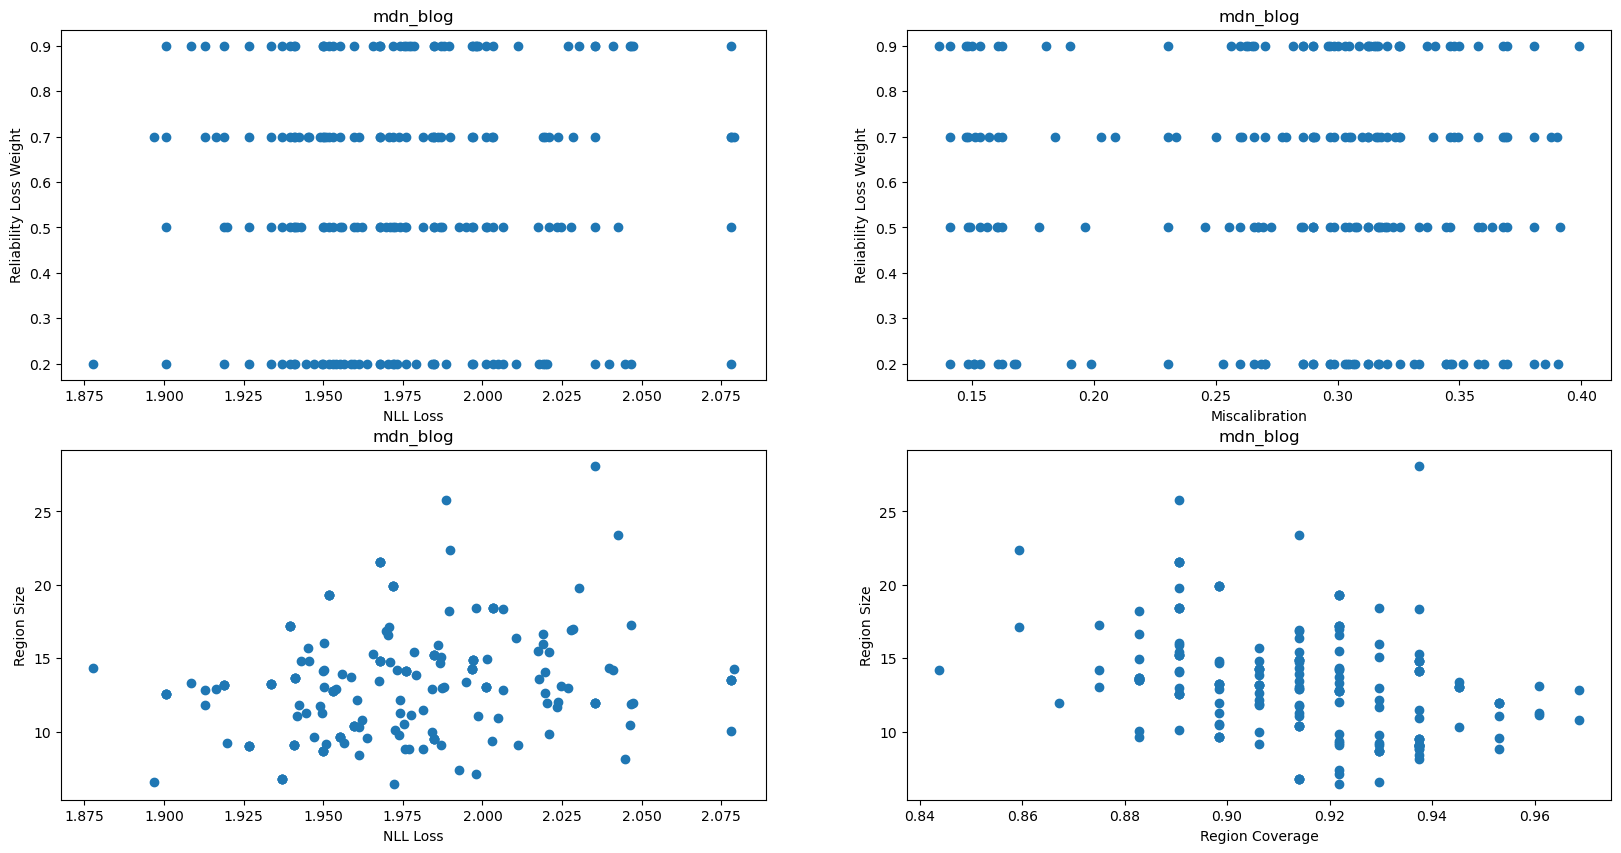

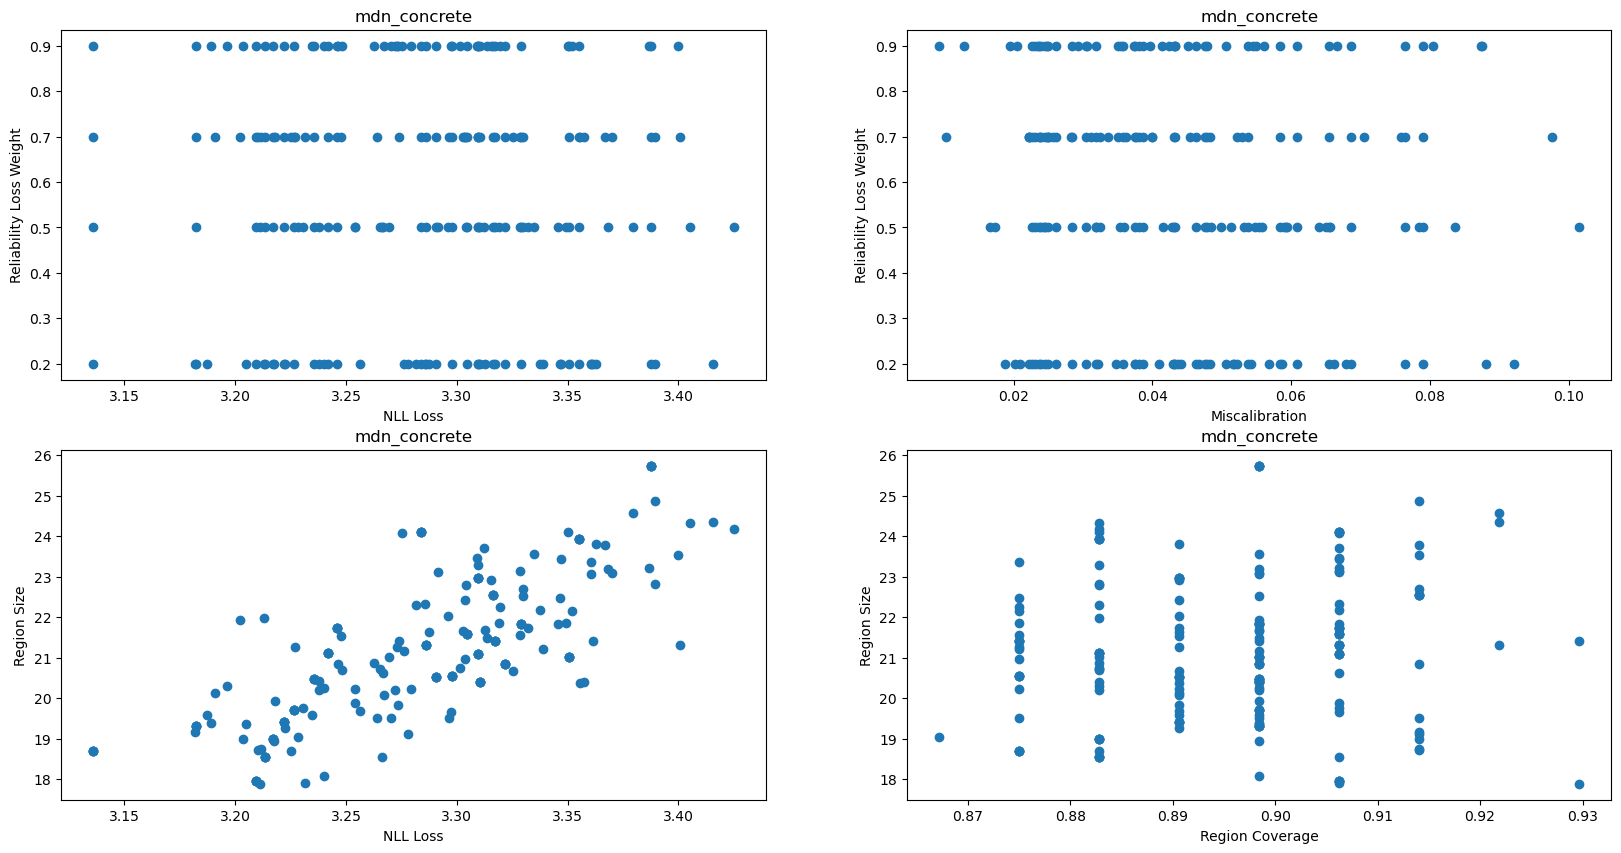

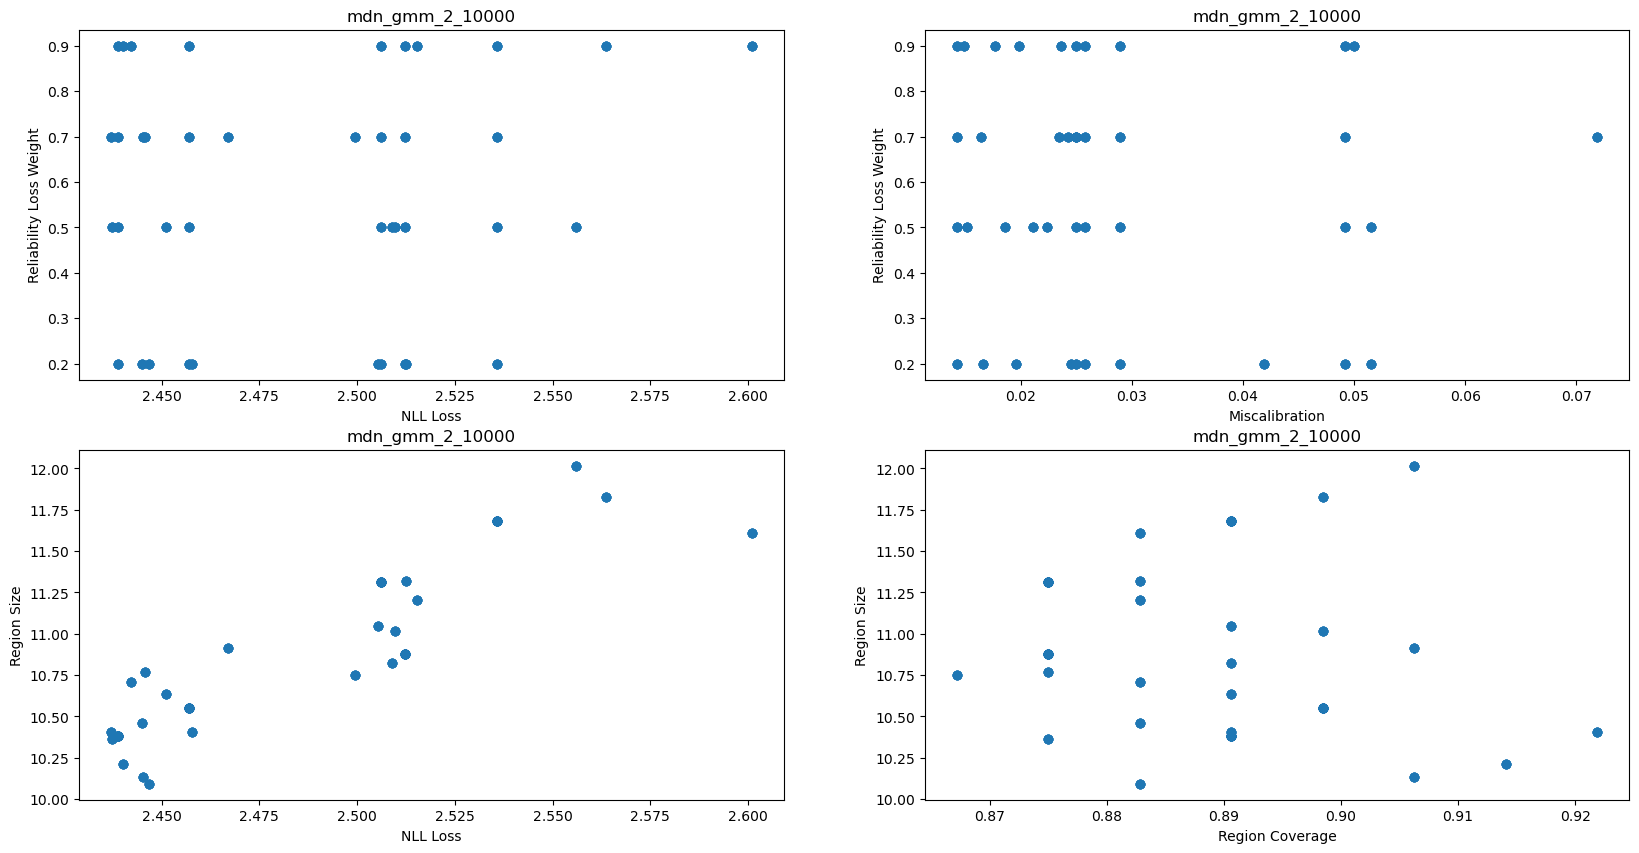

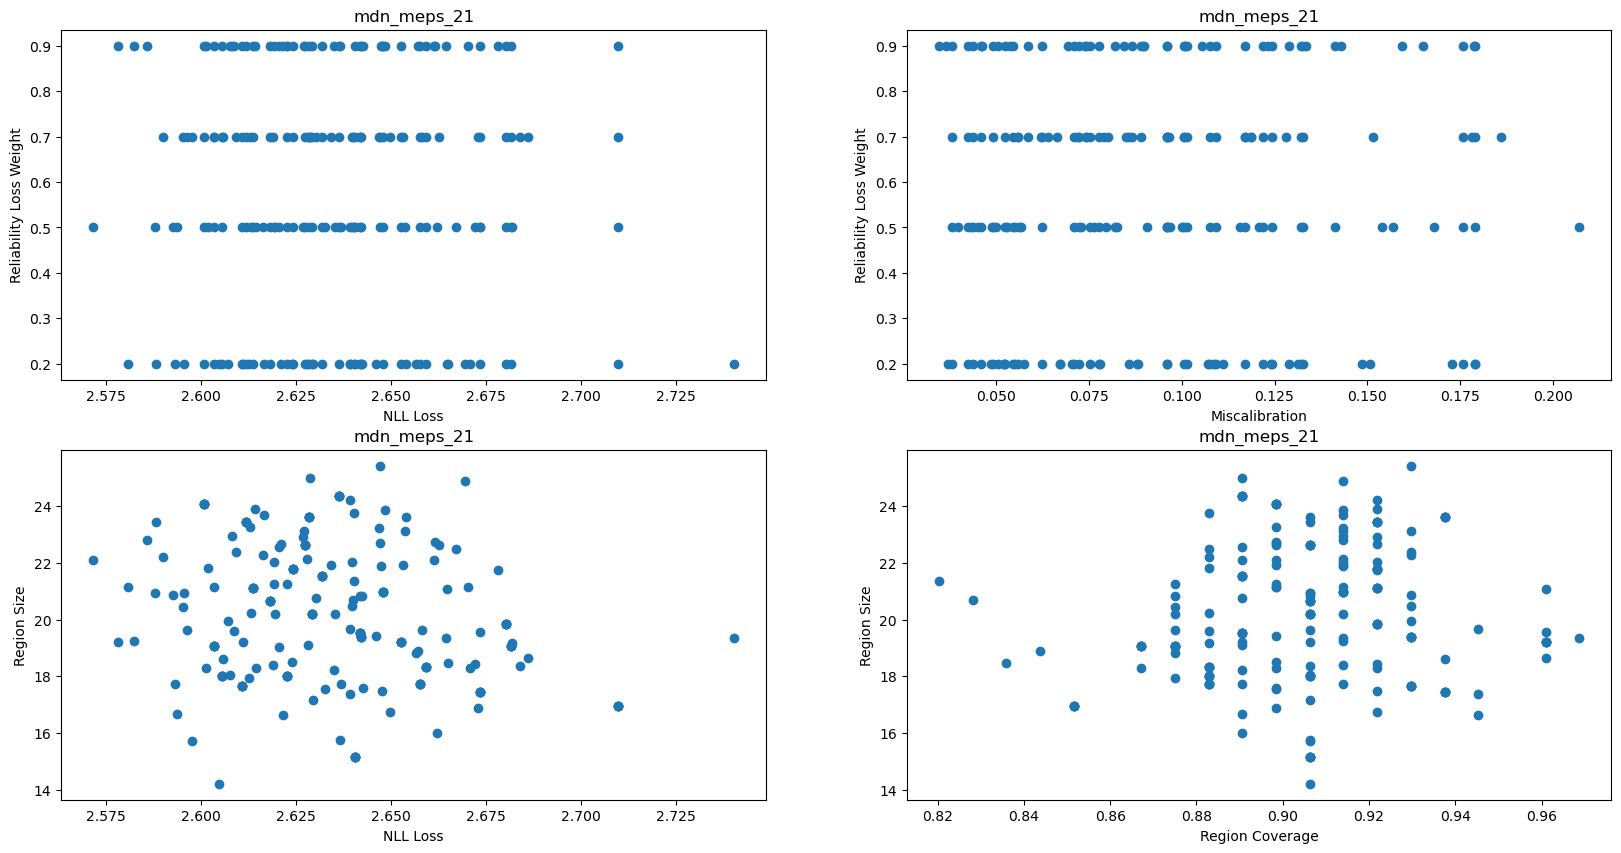

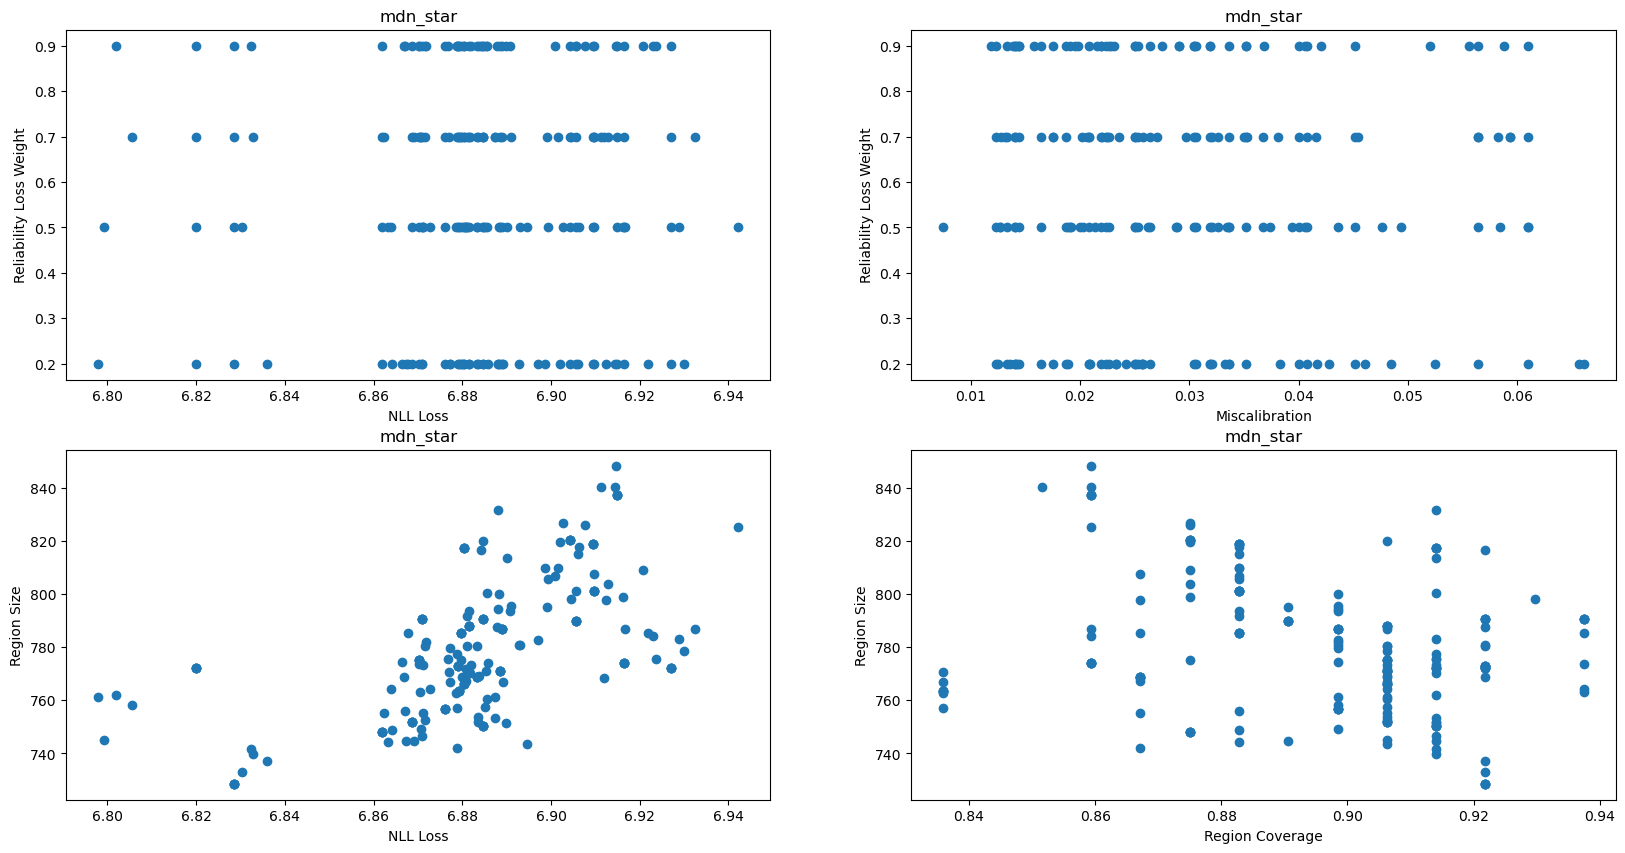

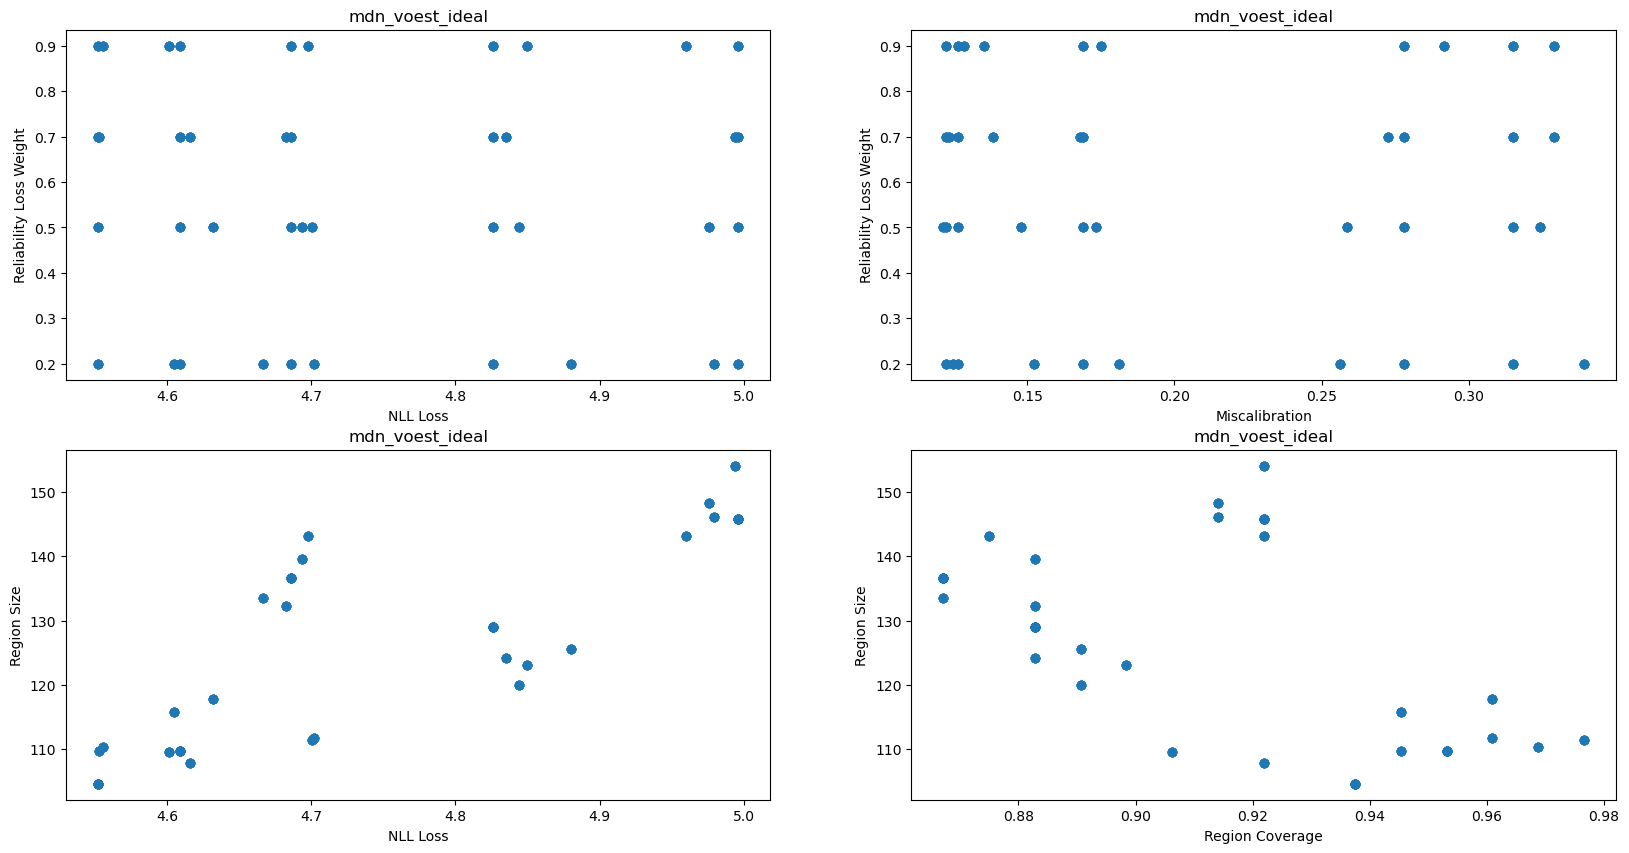

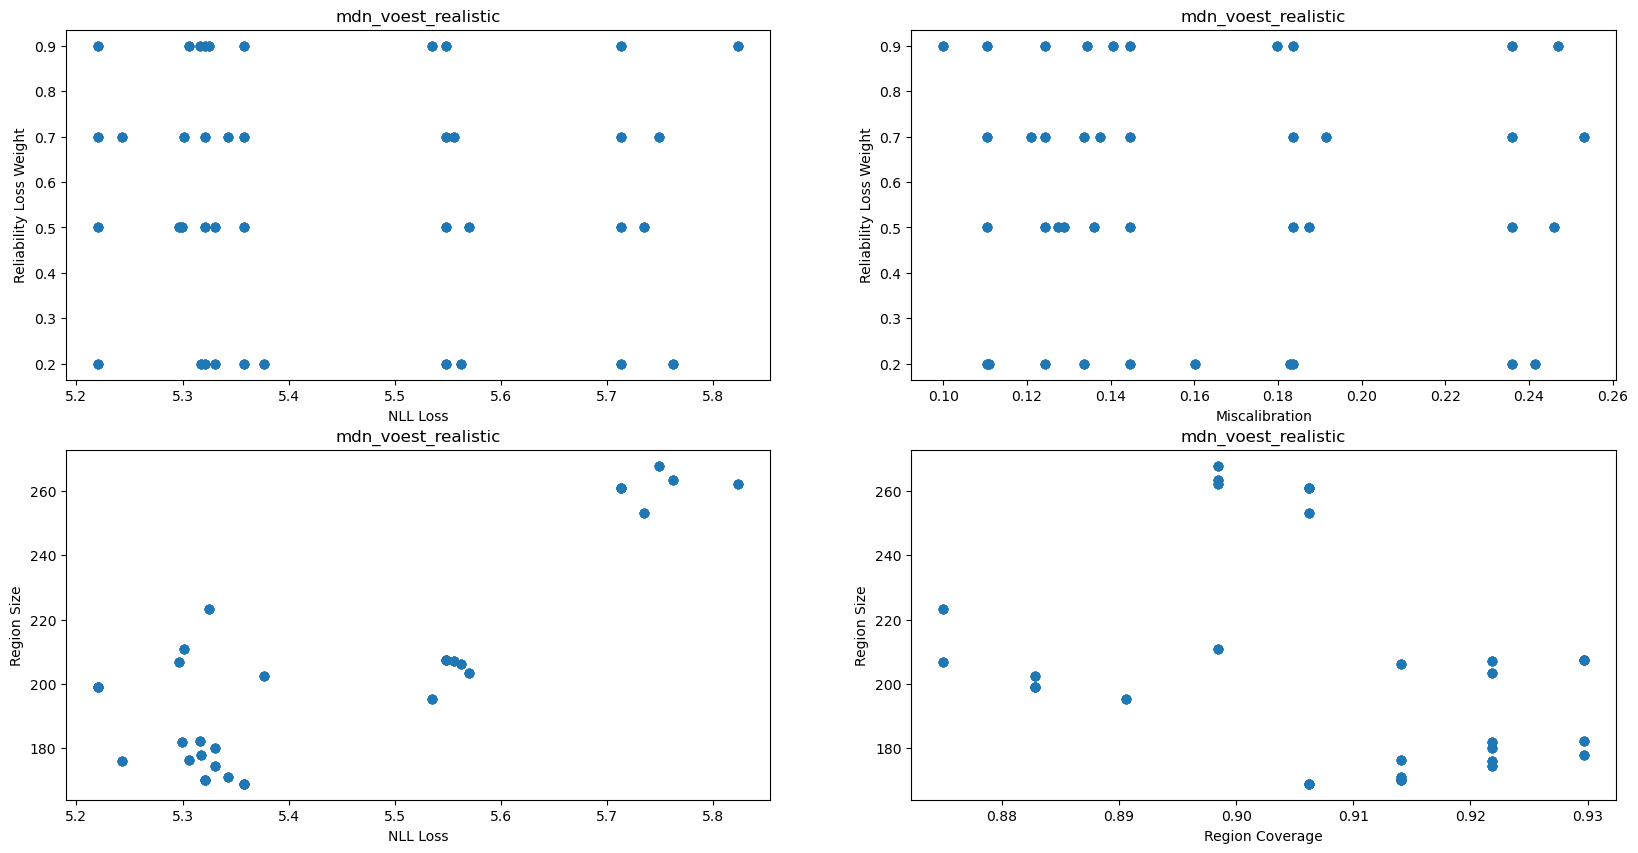

In [12]:
runs_hparam, runs_scals = extract_run_data("from_server/runs/cde_conformal_pred_specialized_noisy")
concat_runs = concat(runs_hparam, runs_scals)
show_focus_plots(concat_runs,"training_hyperparameters/noise_level")
show_focus_plots(concat_runs,"training_hyperparameters/noise_decay")

100%|██████████| 2481/2481 [07:00<00:00,  5.90it/s]


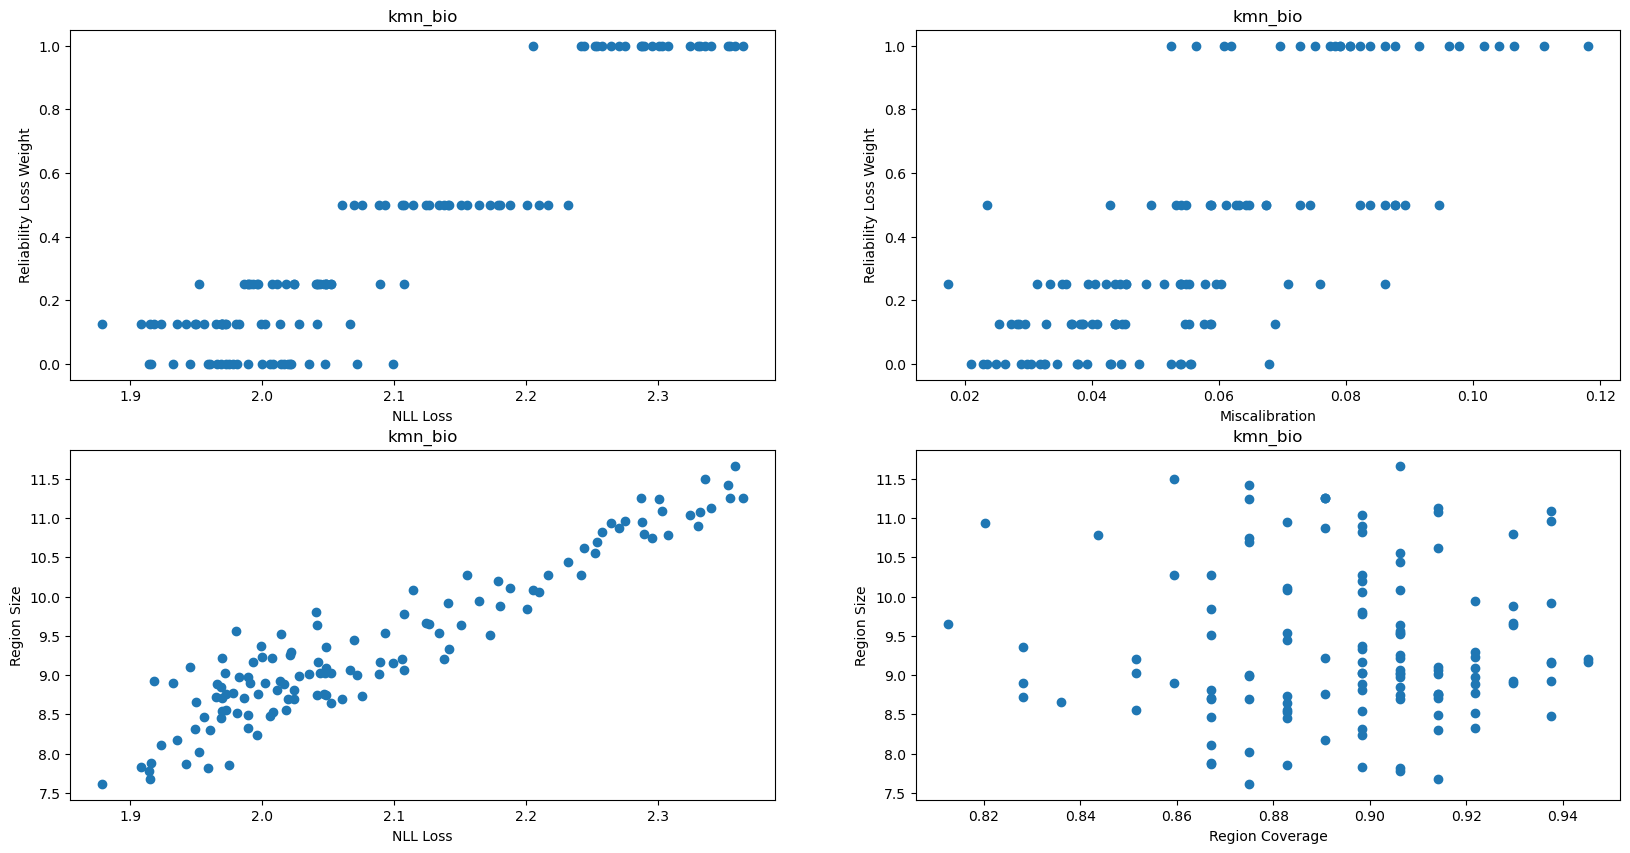

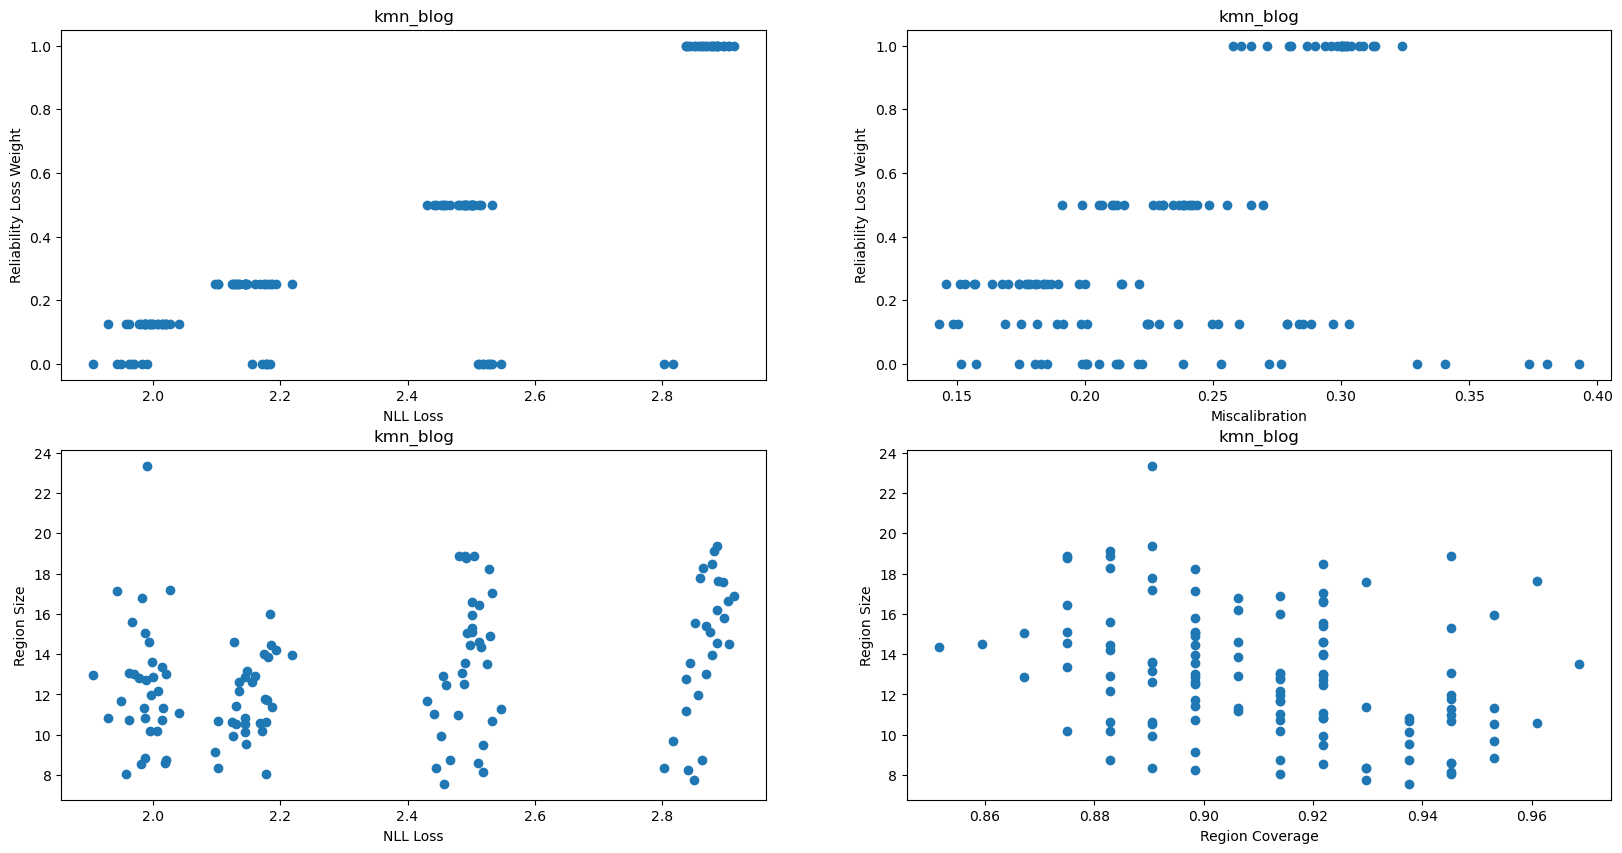

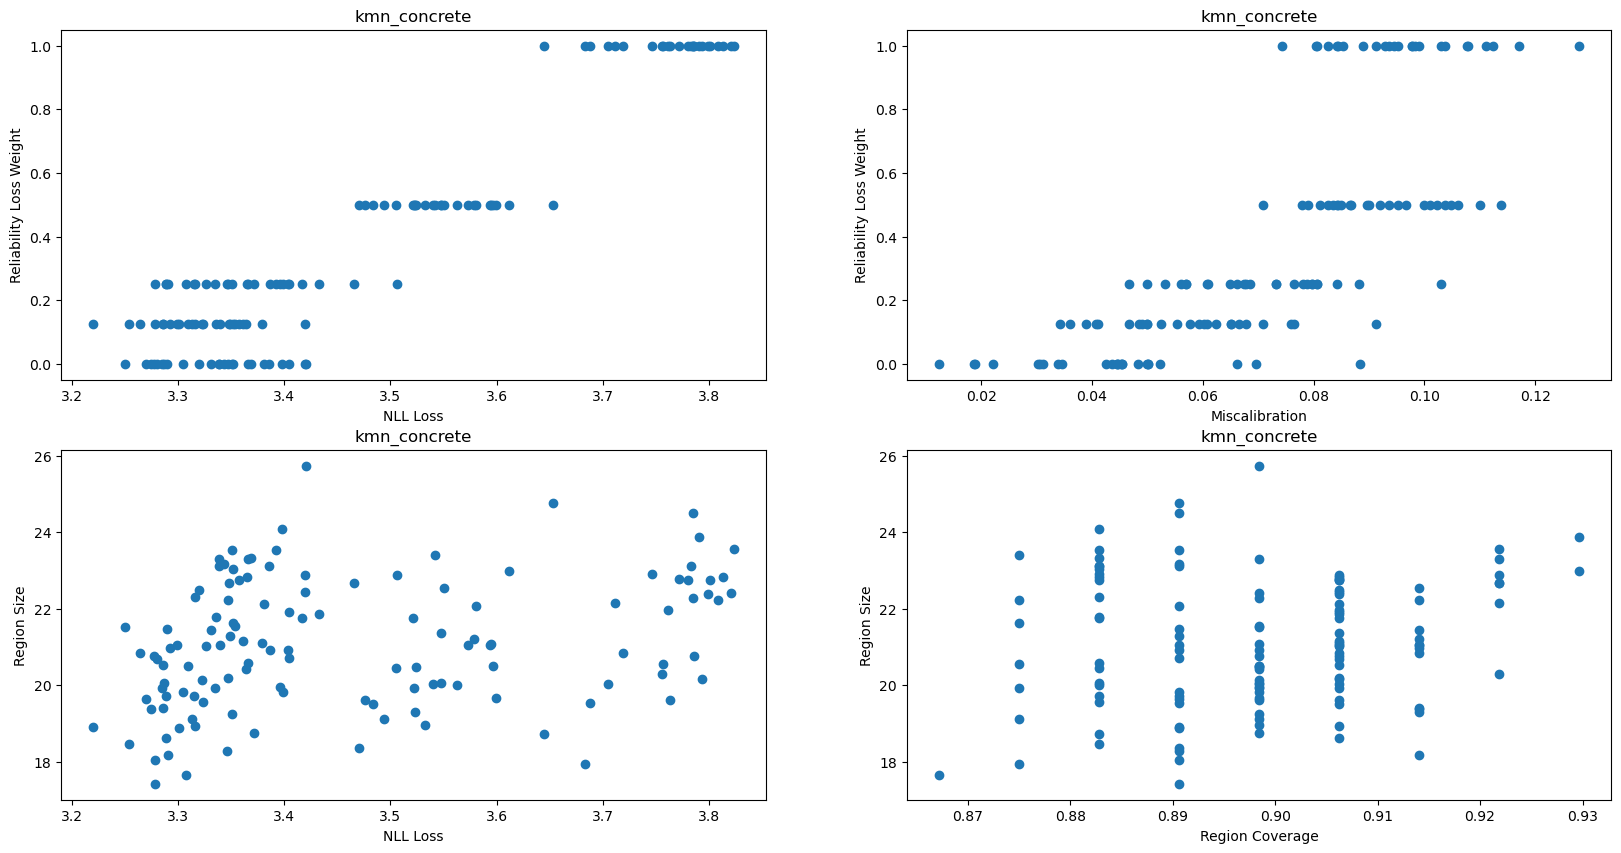

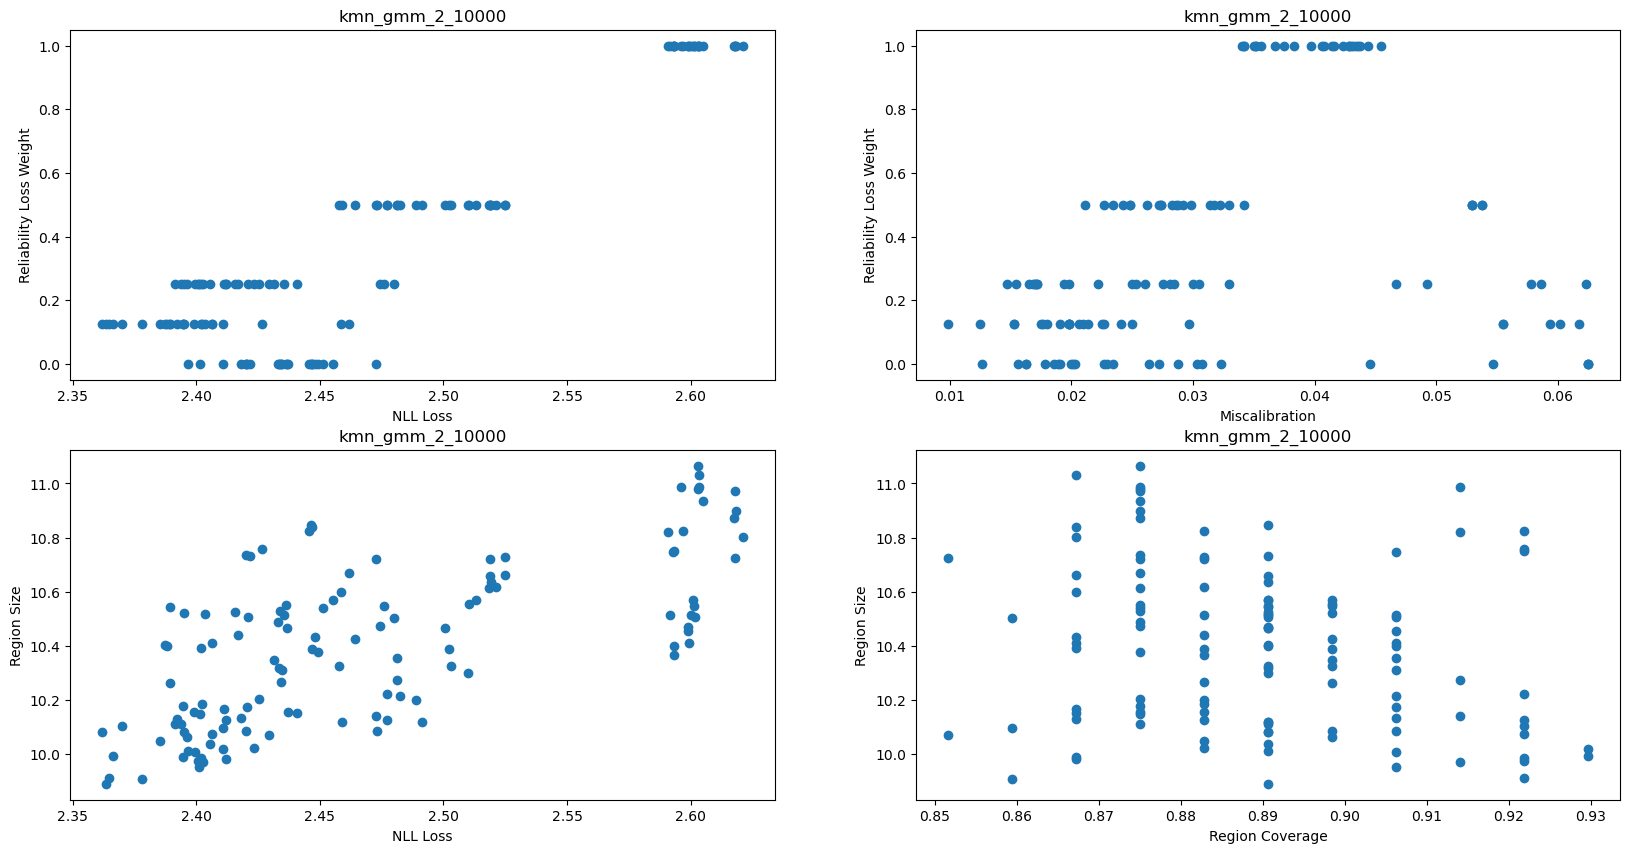

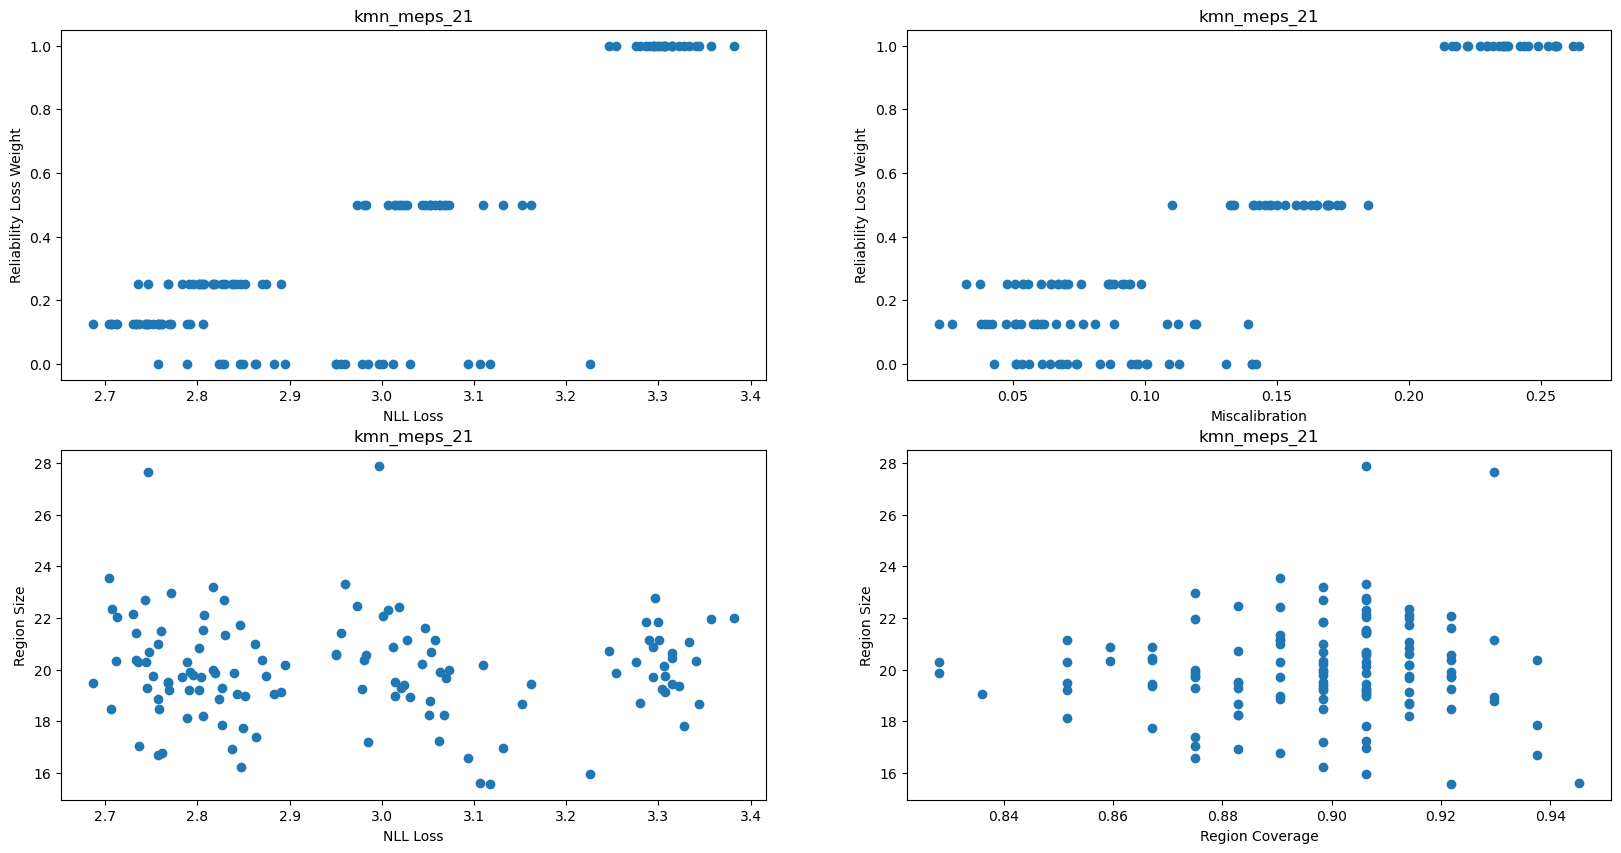

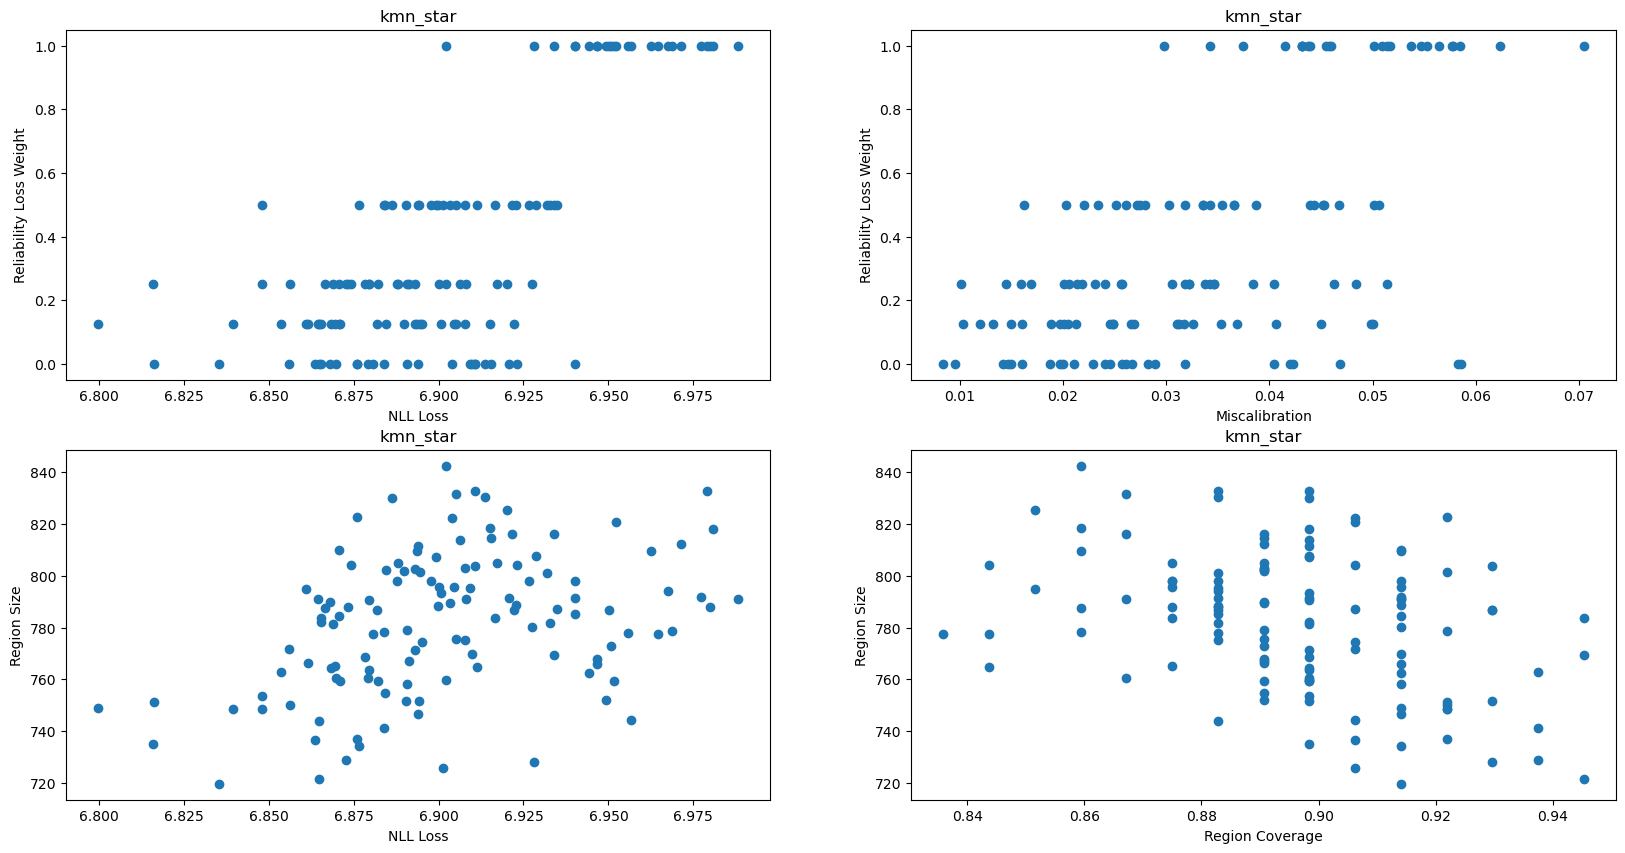

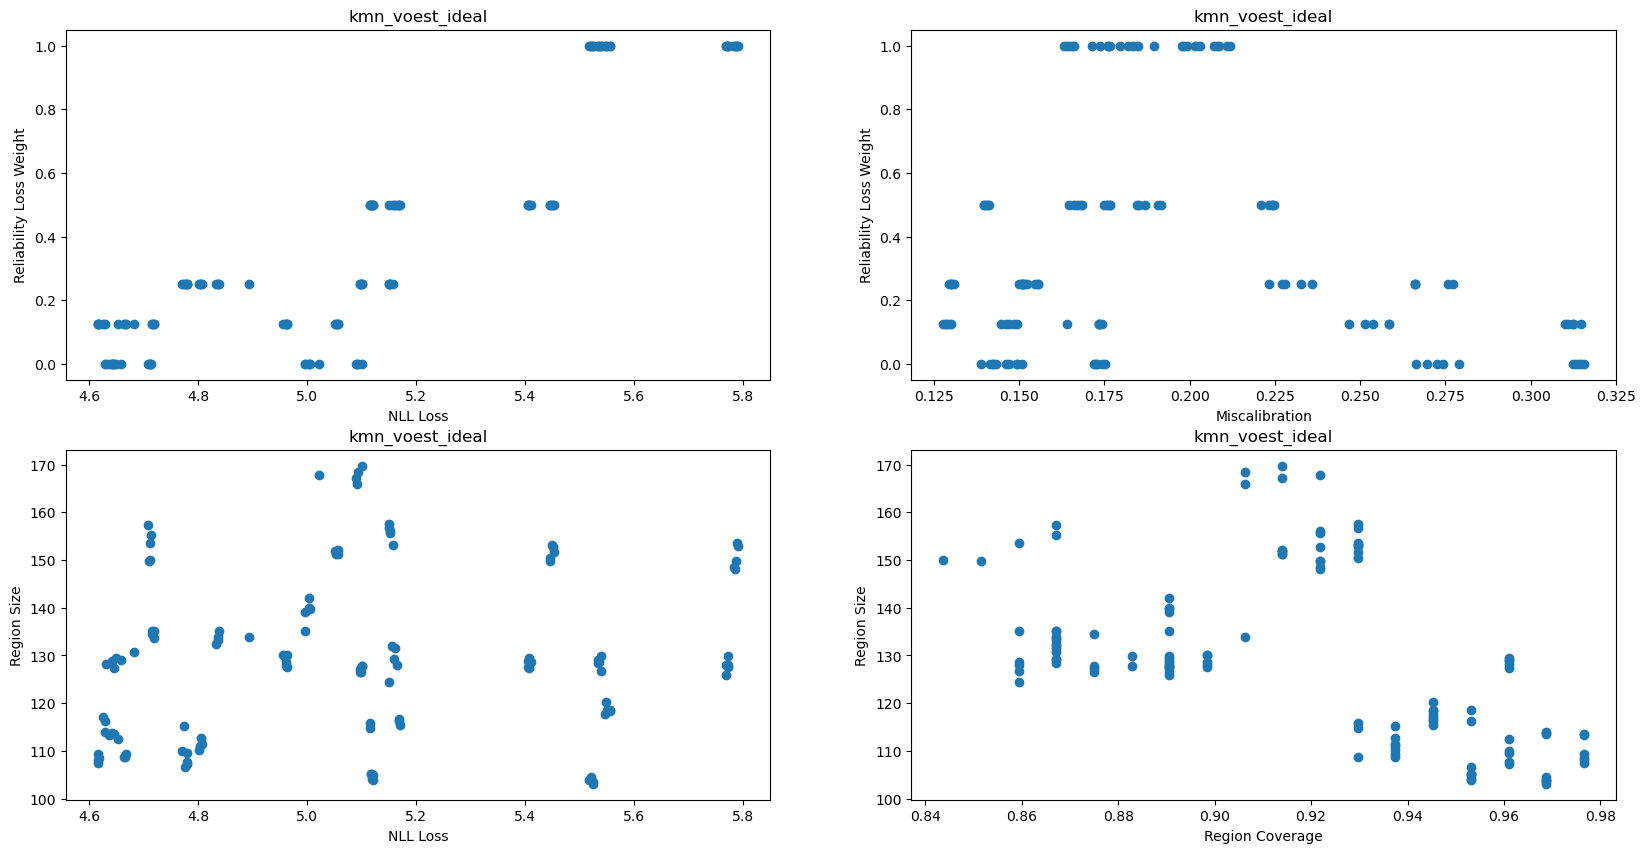

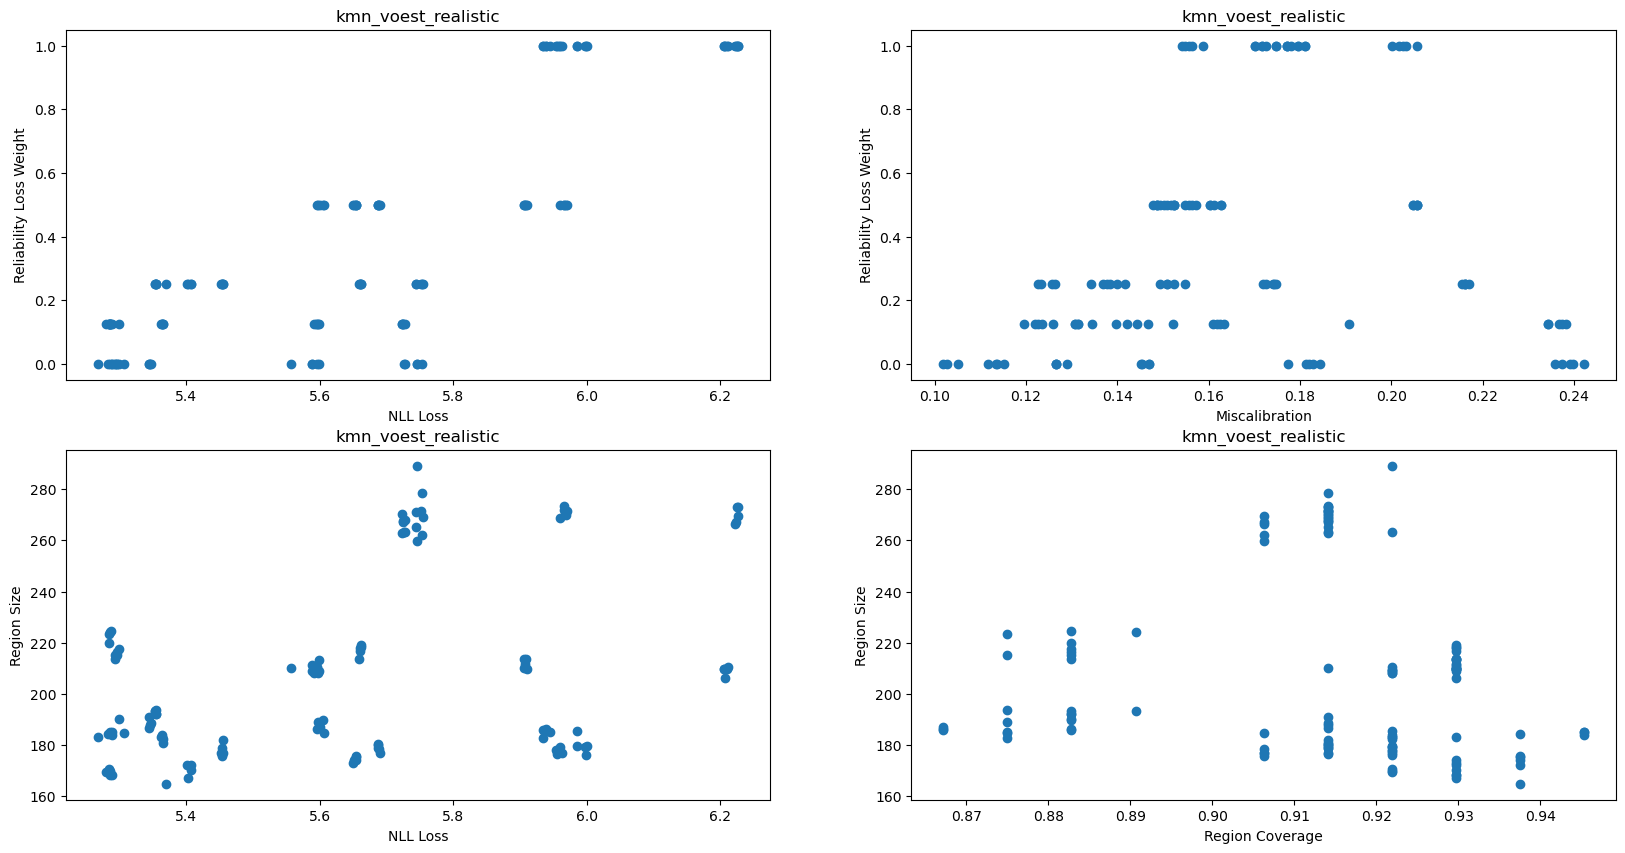

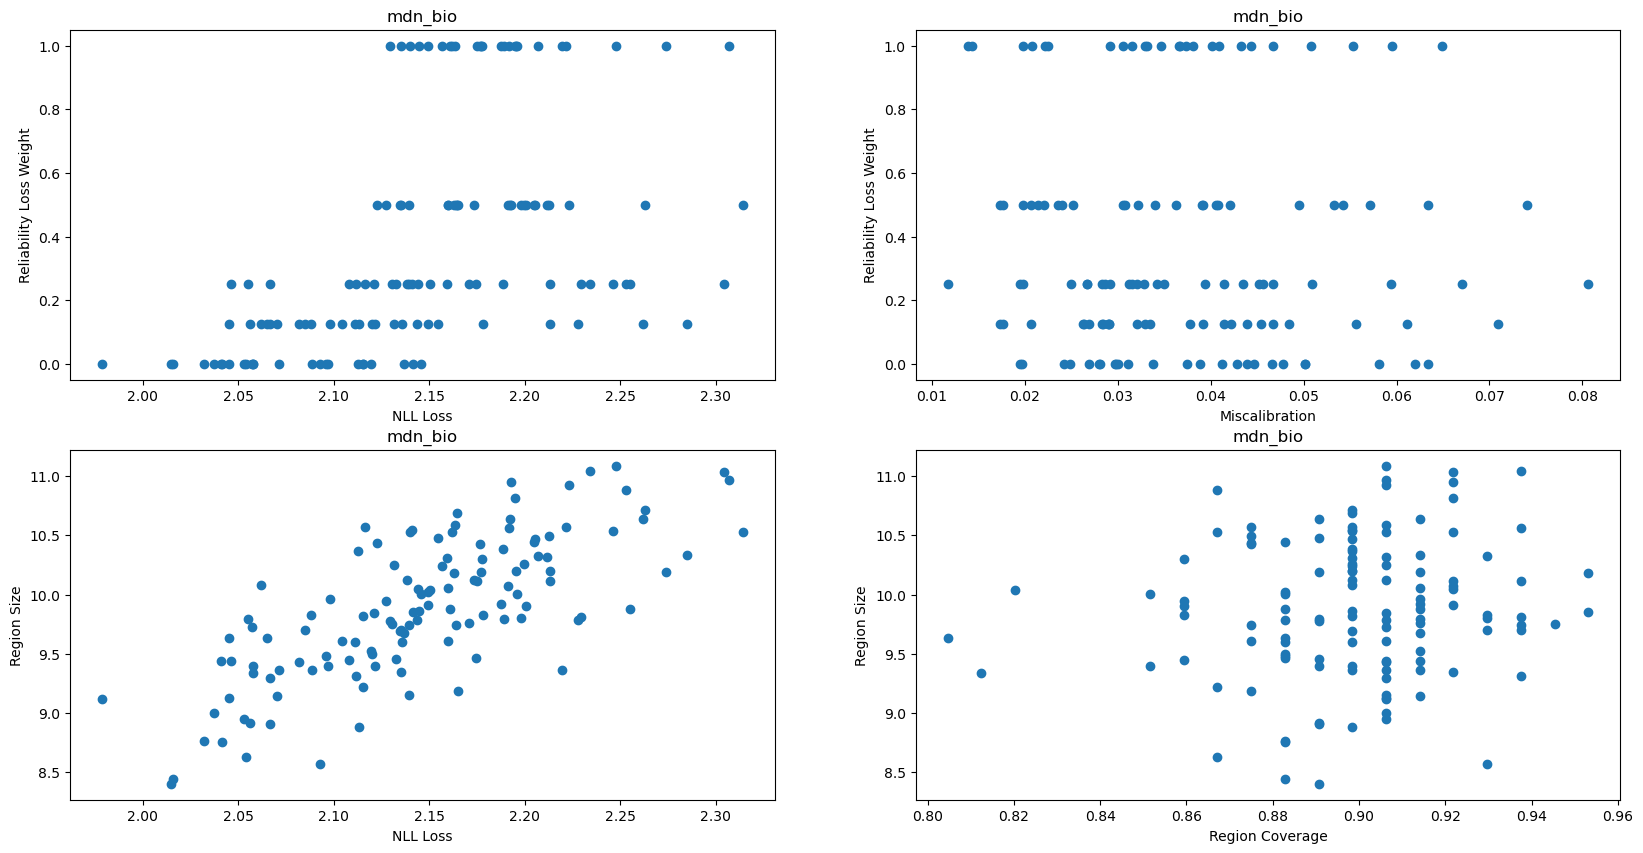

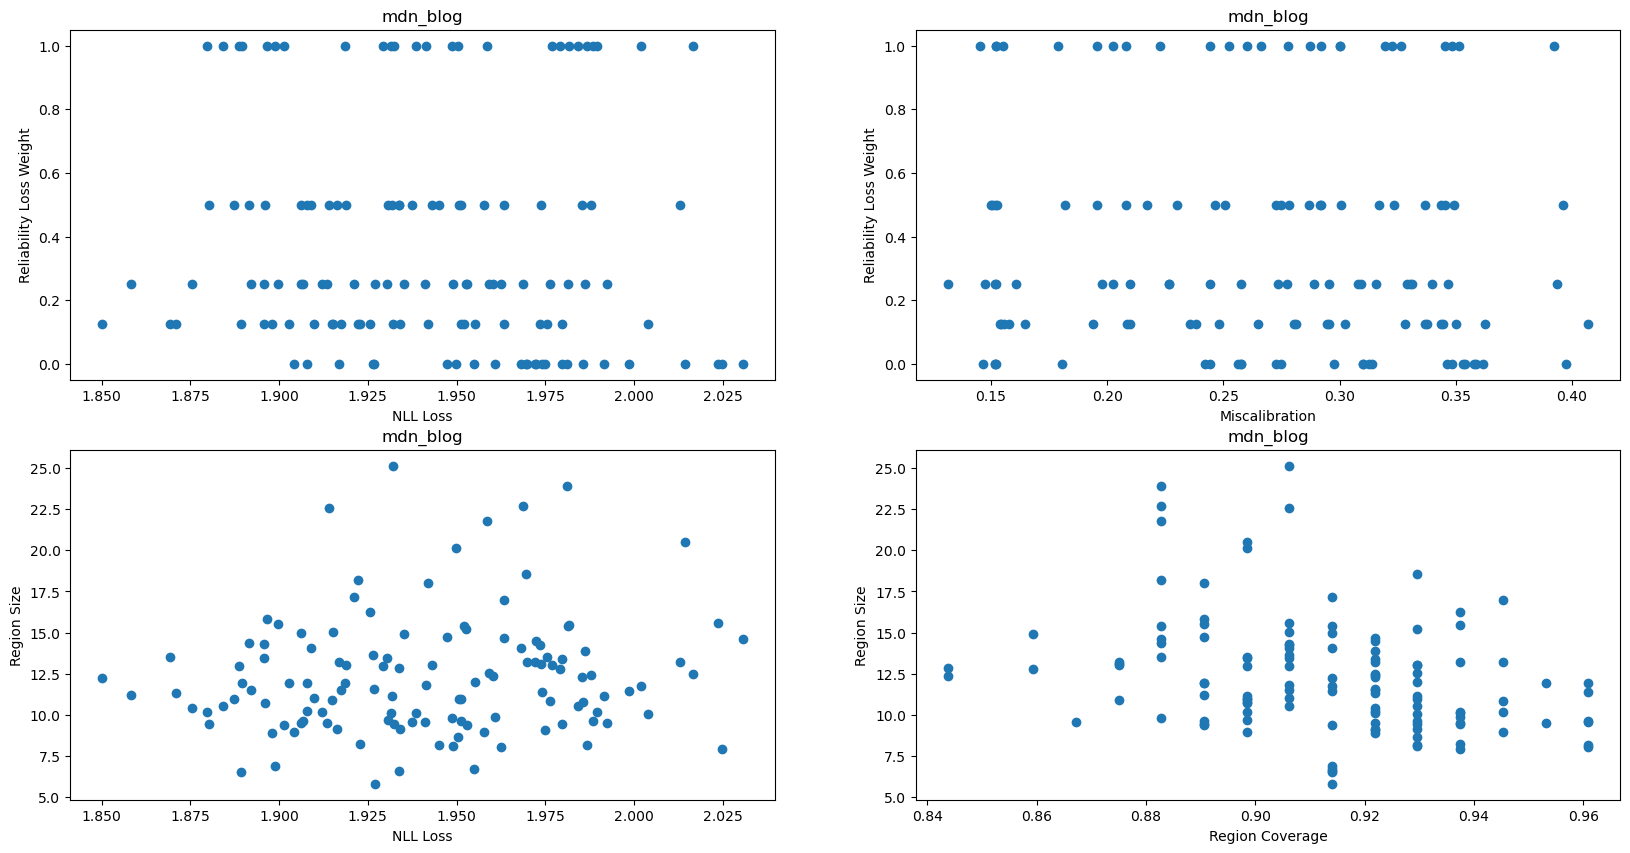

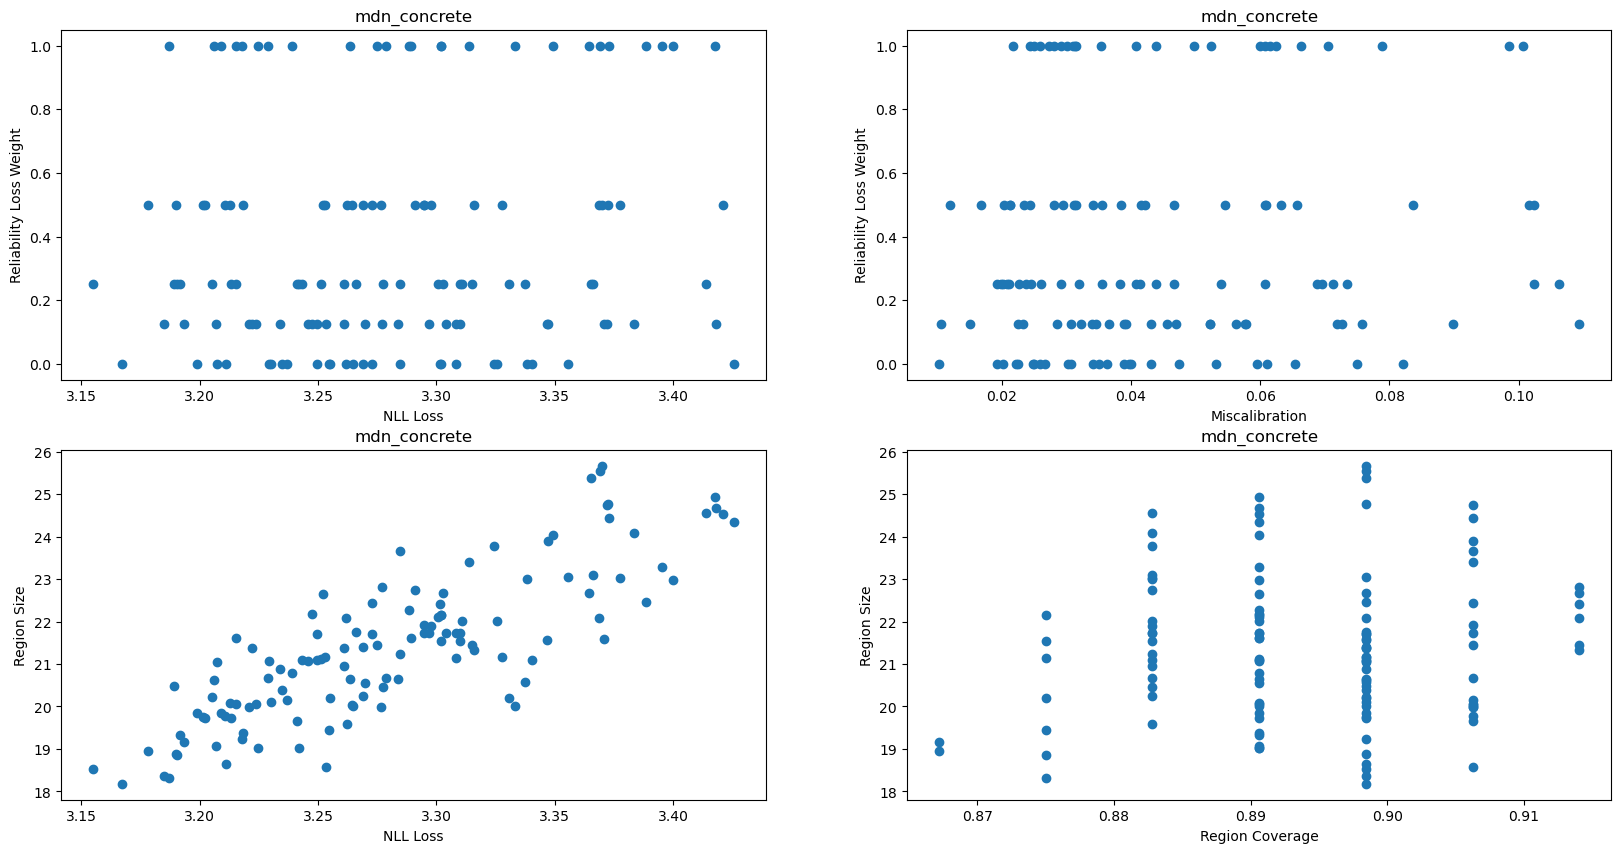

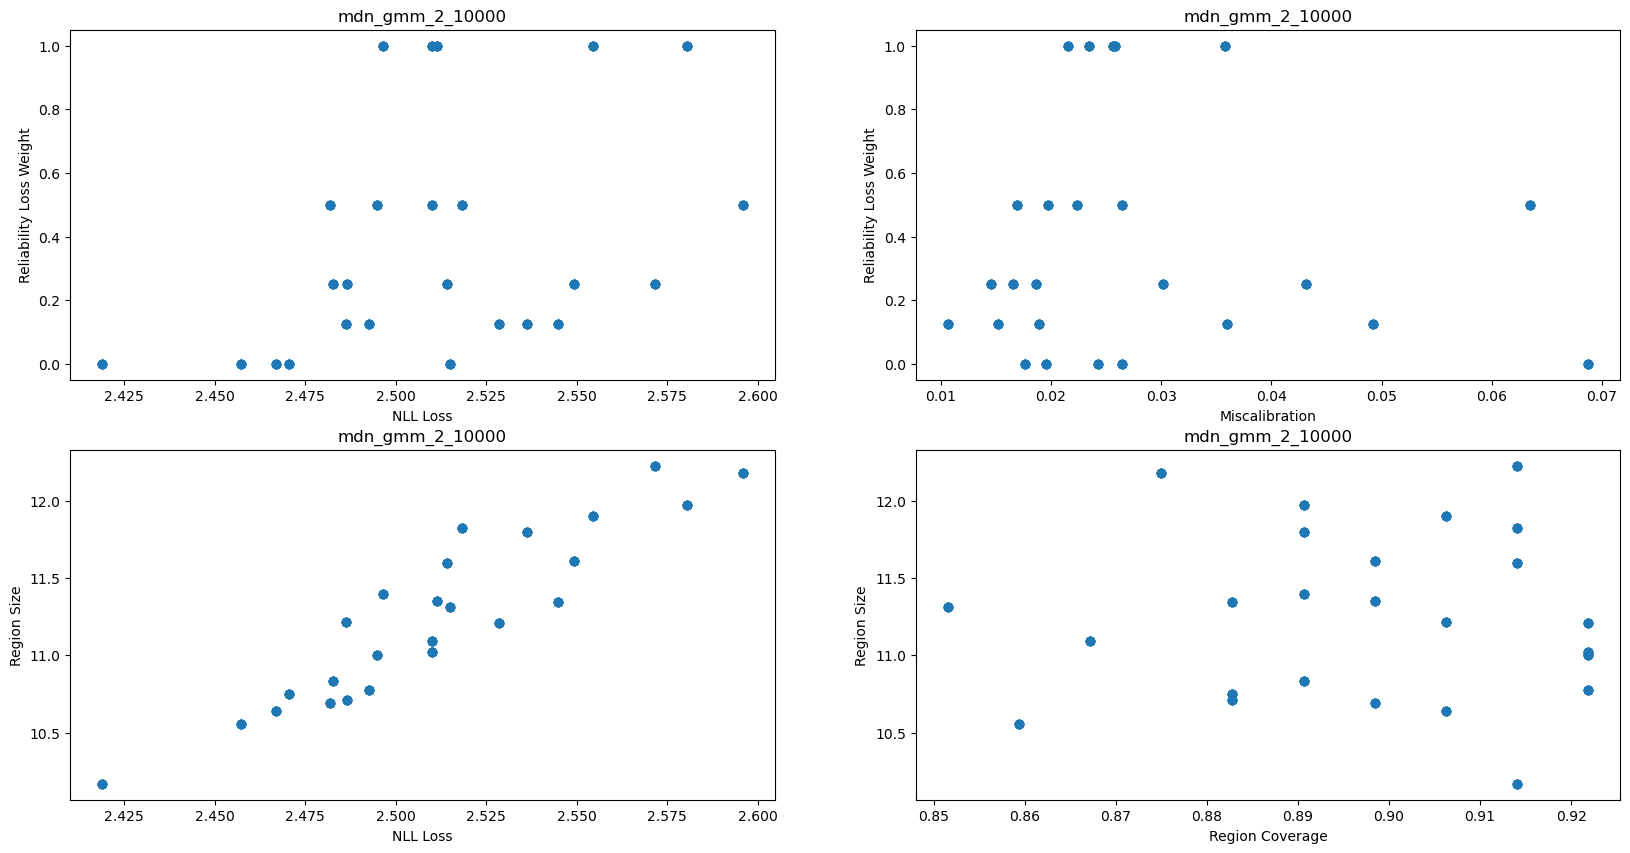

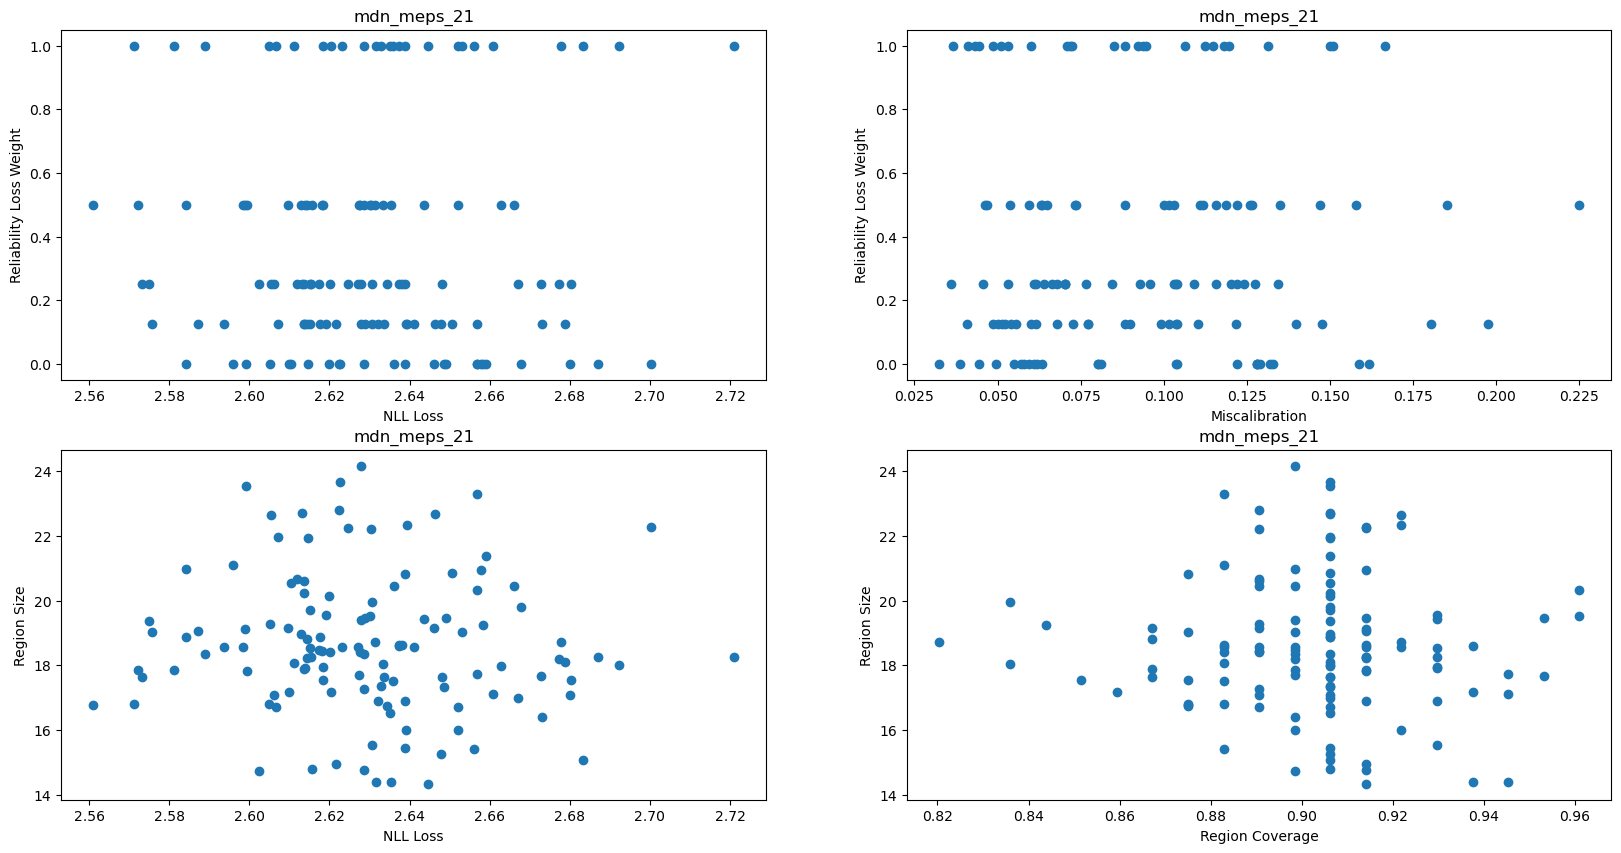

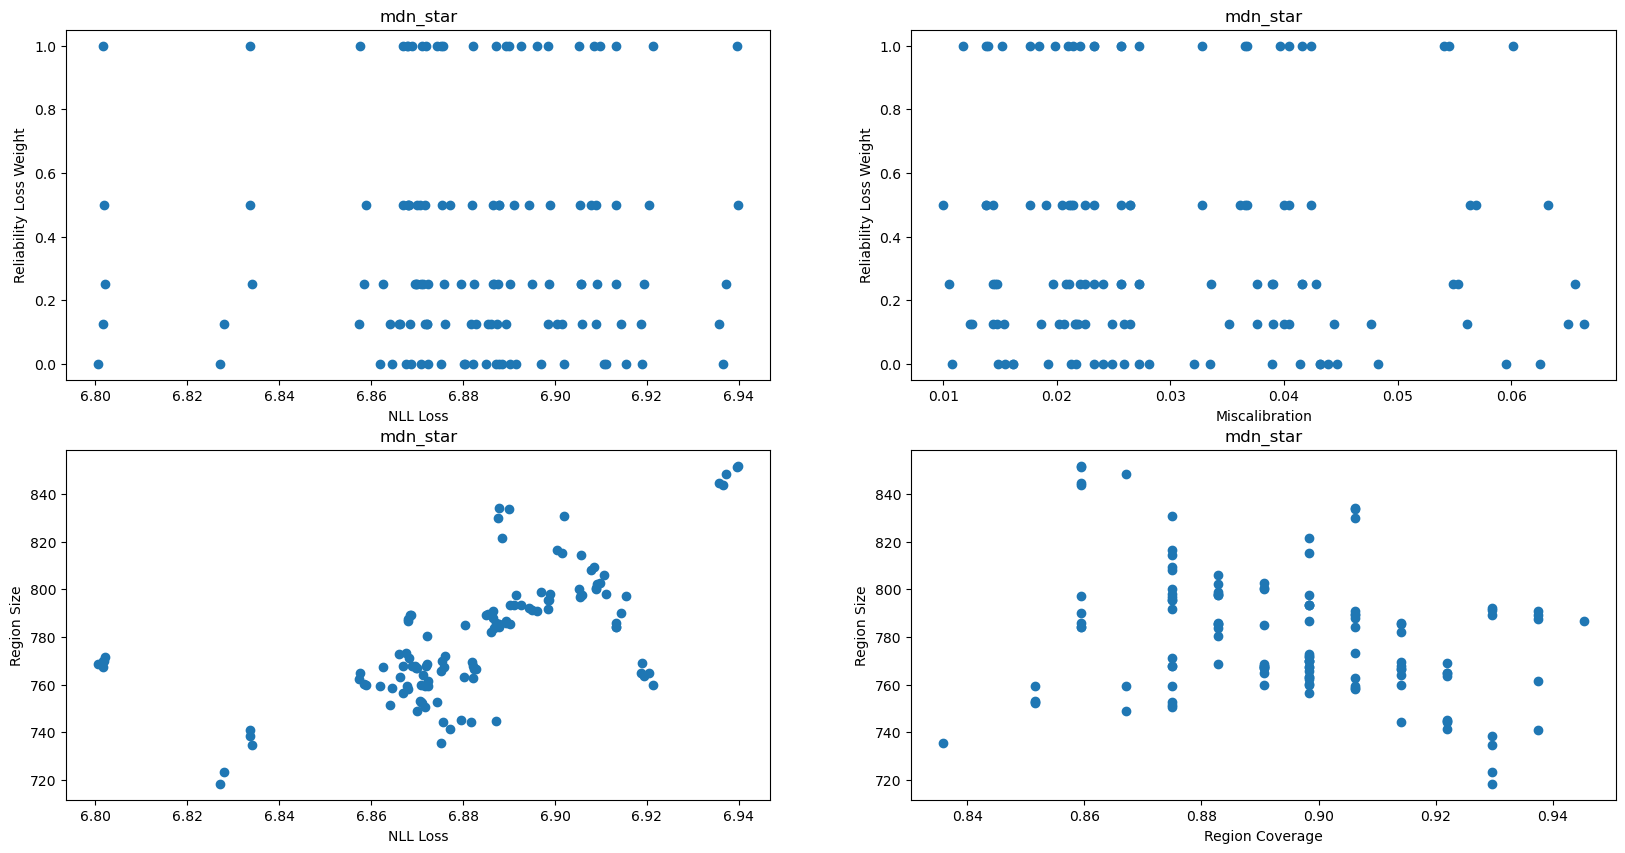

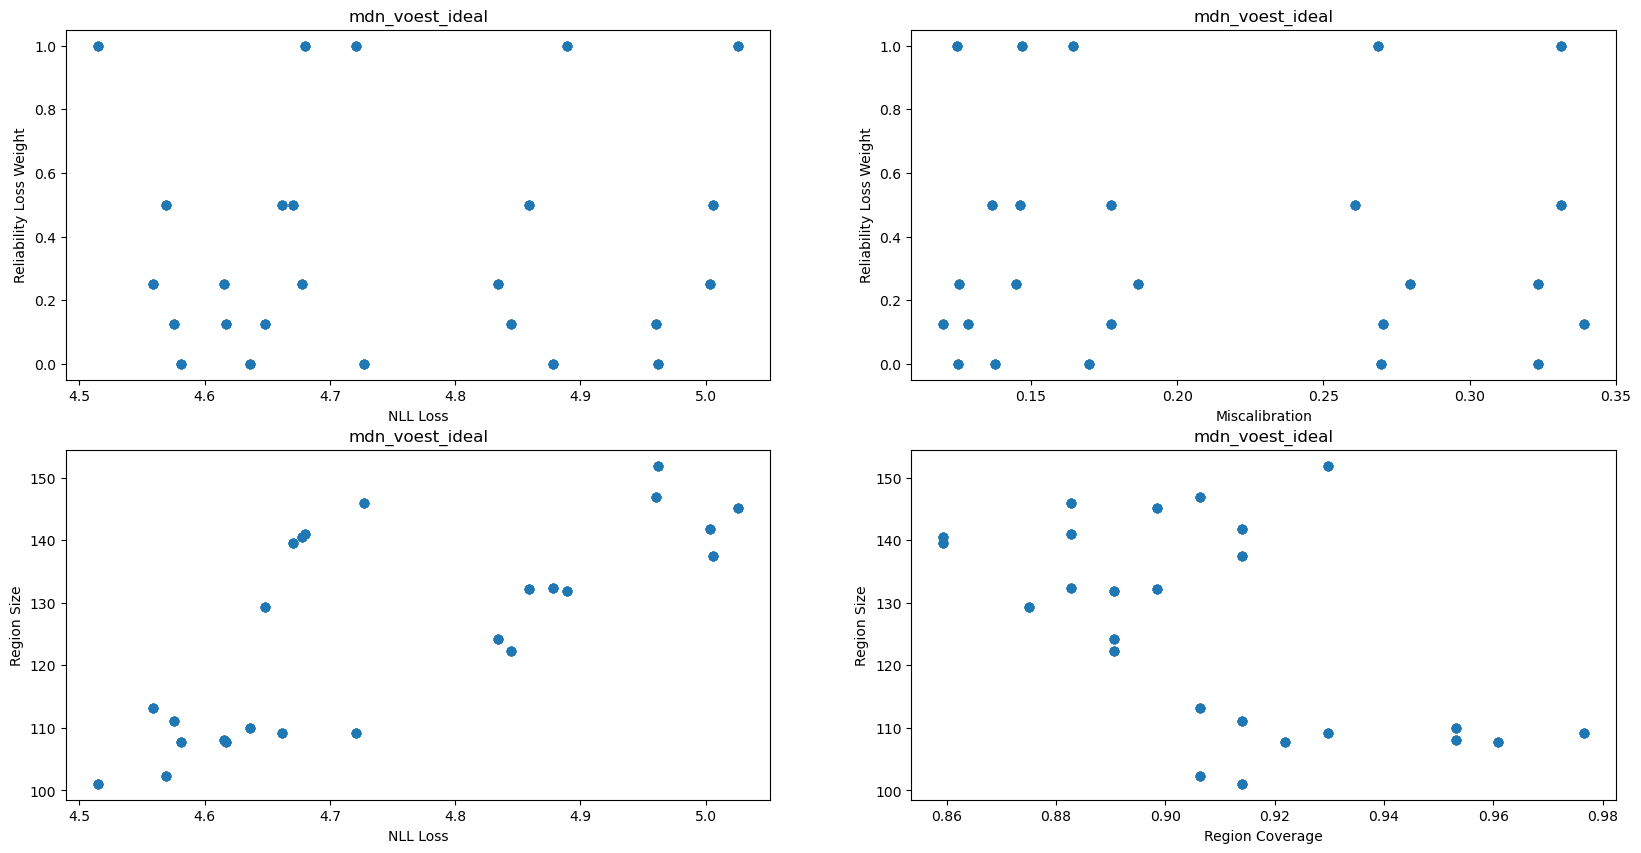

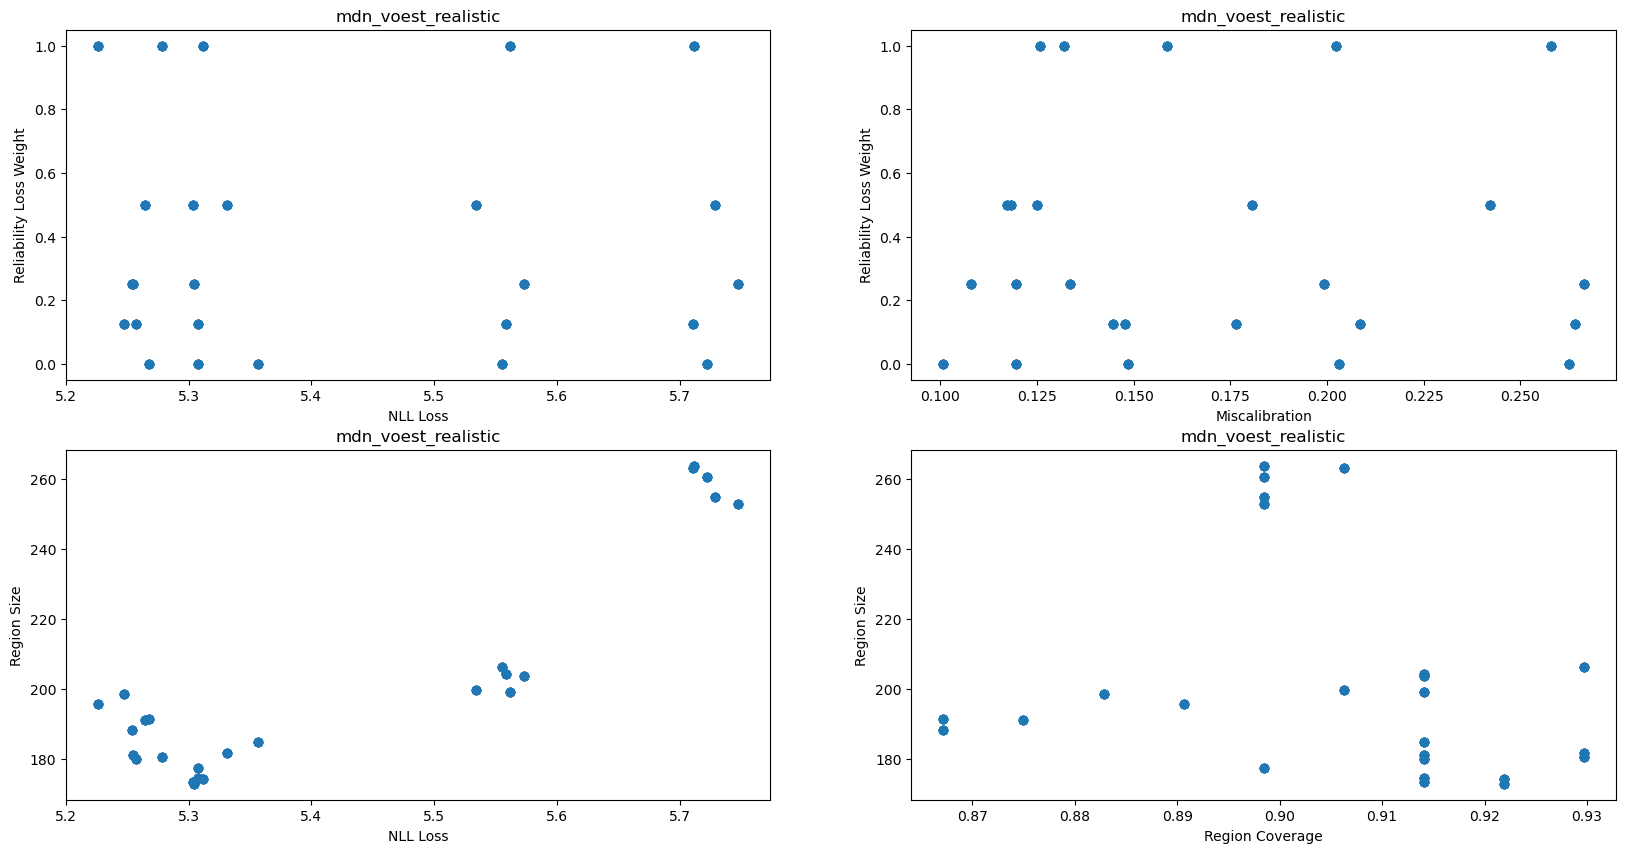

In [13]:
runs_hparam, runs_scals = extract_run_data("from_server/runs/cde_conformal_pred_specialized_weight_entropy")
concat_runs = concat(runs_hparam, runs_scals)
show_focus_plots(concat_runs,"training_hyperparameters/loss_hyperparameters/weights_entropy_loss_weight")